# ETL for Cost Dataset: Step One
I am manually doing this in order to assure accuracy. 

Once I am assurred that the code is correct and makes sense then I will condense it in a function as a data pipeline for future data. 

This file will only contain the cleaning of the column names in order to append 2015-2021 Datasets. Cleaning, outliers, NAs will be handled next.

AI is used to improve efficiency in creating the code, troubleshooting, and giving advice.

## Needed Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import cluster
import sklearn
import seaborn as sns
from sklearn import decomposition
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [92]:
# allow us to see all columns
pd.set_option('display.max_columns', None)

## LOAD DATASET

In [93]:
df_original = pd.read_csv("../Datasets_P1/2015_CostReport.csv")
df_original.sample(5)

C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\660363129.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("../Datasets_P1/2015_CostReport.csv")


,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment
6916,1142156,555781,DEL RIO CONVALESCENT HOSPITAL,7002 EAST GAGE AVENUE,BELL GARDENS,CA,90201,LOS ANGELES,31084.0,U,1/1/2015,12/31/2015,4,682119.0,702323.0,NaN,218848.0,-238134.0,5218675.0,155520.0,5218675.0,5398185.0,-120144.0,33411.0,-292371.0,-59366.0,5338819.0,99.0,111984.0,196869.0,2642411.0,9.0,34.0,10.0,53.0,624.28,686.23,65.75,3254.0,30194.0,263.0,33711.0,6.0,44.0,4.0,54.0,99.0,36135.0,432184.0,1245603.0,36135.0,222808.0,3254.0,30194.0,263.0,33711.0,6.0,44.0,4.0,54.0,4913885.0,1637.0,1245603.0,263.0,2755774.0,2755774.0,1045041.0,1483737.0,88578.0,-238134.0,1483737.0,111984.0,810605.0,376409.0
3759,1138355,225697,ELAINE CENTER AT HADLEY,20 N MAPLE STREET,HADLEY,MA,1035,HAMPSHIRE,44140.0,U,1/1/2015,12/31/2015,4,1672581.0,300119.0,NaN,24797.0,-1344629.0,19872656.0,3058142.0,19872656.0,12950164.0,7756047.0,965084.0,-833555.0,-833555.0,12116609.0,154.0,-5245063.0,257880.0,7783446.0,194.0,25.0,208.0,427.0,99.21,481.97,29.79,7237.0,31328.0,5780.0,44345.0,188.0,65.0,194.0,447.0,154.0,56210.0,180598.0,44344.0,56210.0,1902757.0,7237.0,31328.0,5780.0,44345.0,188.0,65.0,194.0,447.0,15953262.0,-833555.0,44344.0,5780.0,5166718.0,5166718.0,1505950.0,786284.0,3549094.0,-1344629.0,1388973.0,-5010700.0,828812.0,312467.0
15371,1251737,365687,ARBORS AT MARIETTA,400 SEVENTH ST,MARIETTA,OH,45750,WASHINGTON,37620,U,7/1/2015,12/31/2015,4,3778562.0,1007568.0,NaN,8430.0,-419448.0,8416275.0,1973386.0,8416275.0,6206494.0,2629229.0,NaN,-419448.0,-419448.0,5787046.0,150.0,-2653.0,192247.0,4314967.0,NaN,NaN,173.0,173.0,141.69,NaN,31.13,3097.0,15257.0,5167.0,23521.0,NaN,NaN,166.0,166.0,150.0,27600.0,199774.0,3793114.0,27600.0,1595992.0,3097.0,15257.0,5167.0,23521.0,NaN,NaN,166.0,166.0,5816002.0,-419448.0,3793114.0,5167.0,1891527.0,1891527.0,3731981.0,4345041.0,58857.0,-419448.0,4212562.0,2276.0,356337.0,38214.0
10418,1152668,35105,AVALON CARE CTR-SHADOW MOUNTAIN,11150 N 92ND STREET,SCOTTSDALE,AZ,85260,MARICOPA,38060,U,1/1/2015,10/31/2015,4,531829.0,NaN,NaN,NaN,-6280370.0,6347456.0,701148.0,6347456.0,5781619.0,1418725.0,NaN,-1022595.0,-852888.0,4928731.0,120.0,NaN,42080.0,3508455.0,157.0,26.0,53.0,236.0,87.18,432.69,30.98,3434.0,15577.0,1301.0,20312.0,155.0,36.0,42.0,233.0,120.0,36480.0,NaN,422992.0,36480.0,945048.0,3434.0,15577.0,1301.0,20312.0,155.0,36.0,42.0,233.0,4382714.0,-1022595.0,422992.0,1301.0,2273164.0,2273164.0,422992.0,6703362.0,NaN,-6280370.0,6703362.0,NaN,401628.0,NaN
12795,1175351,495277,AMER HC X LLC DBA HH NASSAWADOX,9468 HOSPITAL AVENUE,NASS

In [94]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15402 entries, 0 to 15401
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   rpt_rec_num                      15402 non-null  int64  
 1   Provider_CCN                     15402 non-null  int64  
 2   Facility_Name                    15402 non-null  object 
 3   Street_Address                   15399 non-null  object 
 4   City                             15402 non-null  object 
 5   State_Code                       15402 non-null  object 
 6   Zip_Code                         15402 non-null  object 
 7   County                           15402 non-null  object 
 8   Medicare_CBSA_Number             14914 non-null  object 
 9   Rural_versus_Urban               14927 non-null  object 
 10  Fiscal_Year_Begin_Date           14950 non-null  object 
 11  Fiscal_Year_End_Date             14950 non-null  object 
 12  Type_of_Control   

## Change target variable to Target. 

In [95]:
df_original1 = df_original

In [96]:
df_original1.rename(columns={'Net_Income': 'Target'}, inplace=True)

In [97]:
df_original1.isnull().sum()

rpt_rec_num                   0
Provider_CCN                  0
Facility_Name                 0
Street_Address                3
City                          0
                           ... 
Total_fund_balances         484
Total_liabilities           617
Total_other_Assets         4727
Wage_related_Costs_core     545
Fixed_equipment            8790
Length: 74, dtype: int64

## NAS OVERVIEW

### Look for feature that have large Percent Missing and close to 0 Percent difference and low correlation to Target.
This means that the feature is irrelevant and proabably shoud be taken out. 
### Difference and Percentage Difference
Large Differences: Missingness is informative; consider modeling missingness explicitly or imputing carefully.
Small Differences: Missingness is likely random; imputation is less critical to performance.

#### Rules to follow include 90% NA bias rule. Correlation +-0.1 or less. 

Text(0.5, 1.0, 'Missing Values Heatmap')

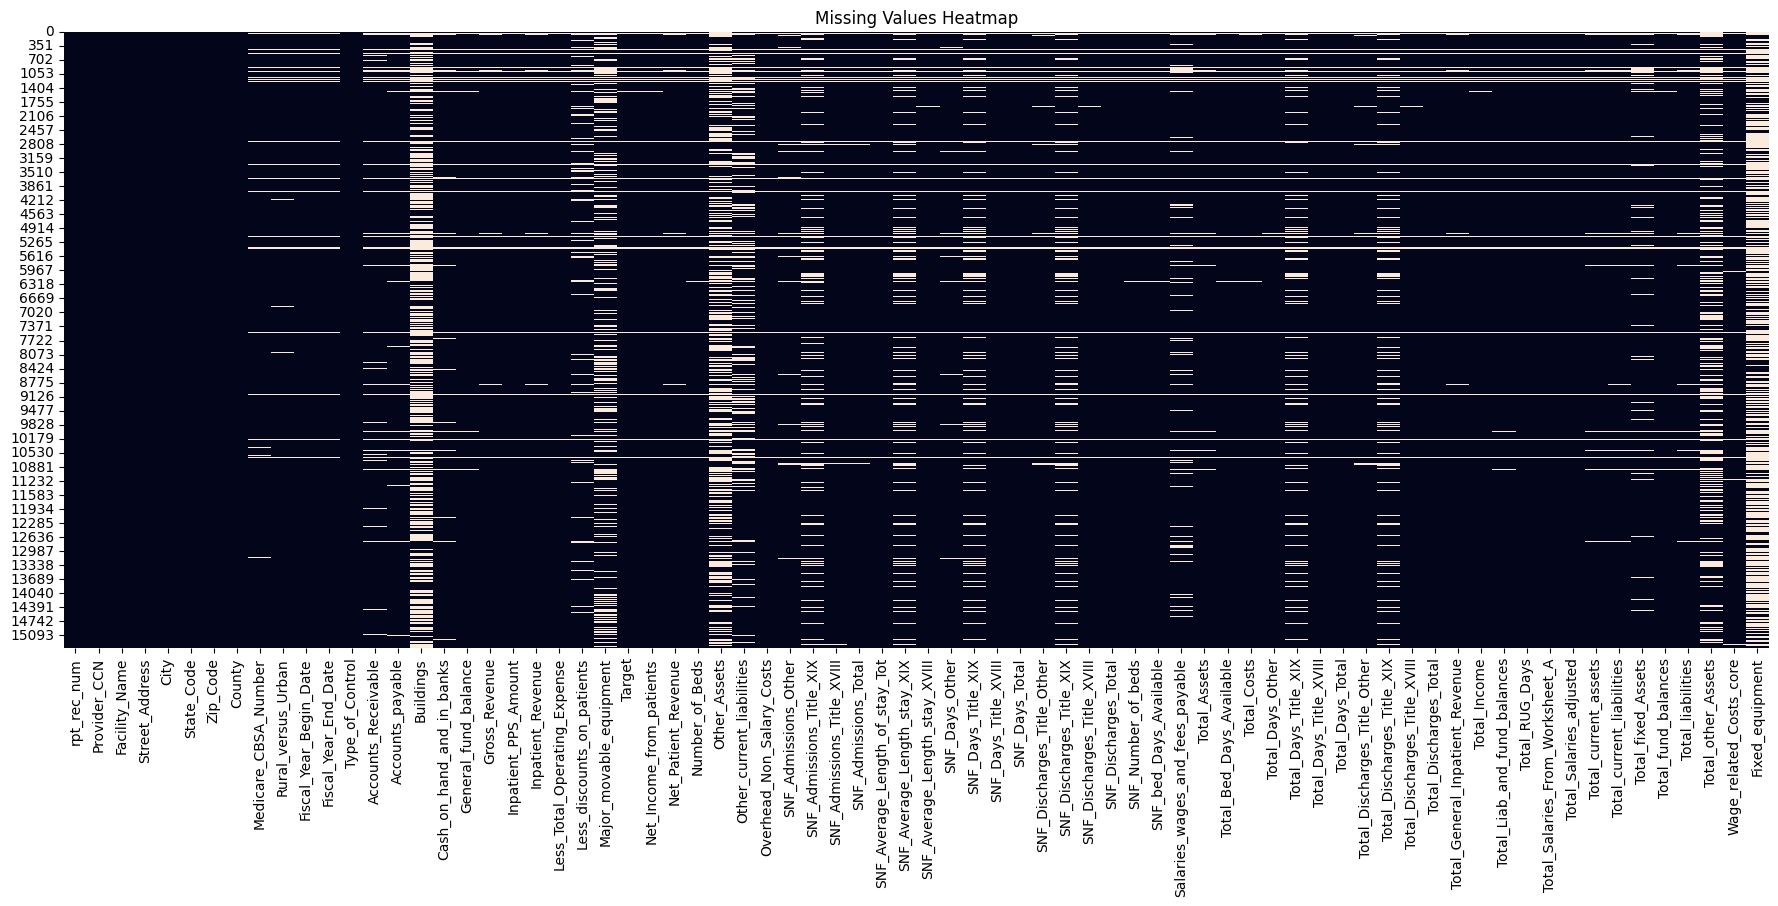

In [98]:

plt.figure(figsize=(22, 8))
sns.heatmap(df_original.isnull(), cbar=False)
plt.title("Missing Values Heatmap")


Look at this graph to see what variables you might want to see later and watch for multicollinearity or why theres NA's etc. 

# I want to Merge now and Make a Master Data Table for this Table with the years. 

Append the years together.

## First upload other Provider datasets

In [99]:
df15 = pd.read_csv("../Datasets_P1/2015_CostReport.csv")
df15.sample(5)

C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\2000465137.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df15 = pd.read_csv("../Datasets_P1/2015_CostReport.csv")


,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment
566,1121612,675058,HOMEPLACE MANOR,425 SW AVENUE F,HAMLIN,TX,79520-4615,JONES,10180.0,U,11/7/2014,12/31/2014,4,147836.0,8887.0,2039612.0,-37507.0,720165.0,215974.0,35624.0,214552.0,280873.0,10934.0,261606.0,-75804.0,-75833.0,205040.0,60.0,NaN,NaN,192322.0,1.0,NaN,1.0,2.0,190.67,360.00,NaN,164.0,360.0,48.0,572.0,2.0,1.0,NaN,3.0,60.0,3300.0,15947.0,744999.0,3300.0,35085.0,164.0,360.0,48.0,572.0,2.0,1.0,NaN,3.0,205764.0,-75804.0,744999.0,48.0,88551.0,88551.0,53795.0,24834.0,691204.0,720165.0,24834.0,NaN,15997.0,NaN
4261,1139007,35132,NORTH MOUNTAIN HEALTHCARE LLC,11411 N 19TH AVE,PHOENIX,AZ,85029-3699,MARICOPA,38060.0,U,1/1/2015,12/31/2015,4,1786729.0,245558.0,25052.0,20843.0,13927890.0,15184414.0,1242748.0,15184414.0,13677592.0,-382810.0,1063241.0,1911026.0,1889632.0,15567224.0,191.0,276402.0,847054.0,5779458.0,421.0,387.0,123.0,931.0,71.96,139.22,26.60,8352.0,54575.0,2633.0,65560.0,420.0,392.0,99.0,911.0,191.0,69715.0,20228571.0,37928576.0,69715.0,2474278.0,8352.0,54575.0,2633.0,65560.0,420.0,392.0,99.0,911.0,11633432.0,1911026.0,37928576.0,2633.0,7898134.0,7898134.0,2220241.0,21420867.0,1021556.0,13927890.0,24000686.0,34686779.0,1150199.0,364832.0
1941,1134794,45183,SALEM PLACE NURSING & REHAB CENTER,2401 CHRISTINA LANE,CONWAY,AR,72034,FAULKNER,30780.0,U,1/1/2015,12/31/2015,4,877797.0,396429.0,NaN,523191.0,1090601.0,11346728.0,4171755.0,11346728.0,9309653.0,996097.0,572448.0,1047174.0,1040978.0,10350631.0,121.0,NaN,NaN,5709975.0,108.0,80.0,384.0,572.0,71.84,252.84,25.71,9156.0,20733.0,8690.0,38579.0,117.0,82.0,338.0,537.0,121.0,44165.0,189831.0,1715055.0,44165.0,1893232.0,9156.0,20733.0,8690.0,38579.0,117.0,82.0,338.0,537.0,8164648.0,1047174.0,1715055.0,8690.0,3599678.0,3599678.0,1426835.0,586260.0,288220.0,1090601.0,624454.0,NaN,505755.0,NaN
7107,1142371,555442,CAPITAL TRANSITIONAL CARE,6821 24TH STREET,SACRAMENTO,CA,95822,SACRAMENTO,40900.0,U,1/1/2015,12/31/2015,4,2815645.0,-51487.0,NaN,2000.0,5581763.0,12875807.0,2376111.0,12875807.0,13019064.0,-588880.0,537346.0,457257.0,445623.0,13464687.0,121.0,189836.0,269868.0,6802447.0,234.0,145.0,94.0,473.0,76.02,107.39,43.92,8412.0,28565.0,2855.0,39832.0,193.0,266.0,65.0,524.0,121.0,44165.0,366730.0,4409945.0,44165.0,2765672.0,8412.0,28565.0,2855.0,39832.0,193.0,266.0,65.0,524.0,10002694.0,457257.0,4409945.0,2855.0,6216617.0,6216617.0,2681601.0,-1171818.0,1538508.0,5581763.0,-1171818.0,189836.0,1176100.0,72189.0
9643,1151506,455582,BAY VILLA HEALTH CARE CENTER,1800 13 TH STREET,BAY CITY,TX,7

In [100]:
df16 = pd.read_csv("../Datasets_P1/2016_CostReport.csv")
df16.sample(5)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment
15085,1274586,175180,LEISURE TERRACE,5211 W 103RD STREET,OVERLAND PARK,KS,66207,JOHNSON,28140.0,U,12/1/2015,12/31/2016,4,641069.0,564208.0,NaN,54171.0,-63213.0,7100261.0,803522.0,7100261.0,7631080.0,NaN,8500.0,-212013.0,-530819.0,7100261.0,110.0,NaN,530904.0,4157251.0,55.0,150.0,59.0,264.0,69.82,70.65,56.72,5790.0,26846.0,1645.0,34281.0,82.0,380.0,29.0,491.0,110.0,71242.0,82559.0,1479258.0,71242.0,442311.0,5790.0,26846.0,1645.0,34281.0,82.0,380.0,29.0,491.0,7100261.0,-212013.0,1479258.0,1645.0,3473829.0,3473829.0,1156365.0,1191987.0,153112.0,-63213.0,1542471.0,169781.0,579474.0,NaN
12373,1210941,245593,GOOD SAMARITAN SOCIETY PLEASANT VIEW,1000 S 2ND,ST JAMES,MN,56081-1899,WATONWAN,99924.0,R,5/1/2016,4/30/2017,4,384329.0,48281.0,11385874.0,36917.0,4139622.0,5566633.0,644578.0,5542763.0,5646994.0,206841.0,NaN,200280.0,-287202.0,5359792.0,77.0,240633.0,114821.0,3172376.0,59.0,28.0,43.0,130.0,129.25,264.18,64.05,6152.0,8982.0,1281.0,16415.0,83.0,34.0,20.0,127.0,53.0,28473.0,224088.0,7399126.0,28473.0,390027.0,14736.0,8982.0,1281.0,24999.0,83.0,34.0,20.0,137.0,4479625.0,215474.0,7399126.0,1281.0,2474618.0,2474618.0,470276.0,404538.0,6688217.0,4139622.0,3259504.0,240633.0,432857.0,1604400.0
8473,1178106,185478,FOREST SPRINGS HEALTH CAMPUS,4120 WOODED ACRE LANE,LOUISVILLE,KY,40245-2938,JEFFERSON,31140.0,U,1/1/2016,12/31/2016,4,639570.0,133822.0,8437.0,-4601316.0,-2777159.0,10529038.0,3237931.0,10529038.0,9458395.0,2500631.0,NaN,-1429988.0,-1429988.0,8028407.0,95.0,NaN,NaN,6275307.0,112.0,4.0,289.0,405.0,45.14,633.67,26.24,8993.0,1901.0,6665.0,17559.0,189.0,3.0,254.0,389.0,58.0,34770.0,167421.0,-854166.0,34770.0,1599597.0,17642.0,1901.0,6665.0,26208.0,189.0,3.0,254.0,446.0,7761407.0,-1429988.0,-854166.0,6665.0,3183088.0,3183088.0,-3572901.0,308587.0,2713735.0,-2777159.0,1922993.0,5000.0,650973.0,1512481.0
7491,1175283,245090,PLEASANT MANOR INC,27 BRANDT AVENUE,FAIRBULT,MN,55021,RICE,99924.0,R,1/1/2016,12/31/2016,4,853640.0,580765.0,5533294.0,762290.0,-80463.0,6682623.0,1672496.0,6382072.0,6980386.0,408691.0,NaN,585607.0,-706454.0,6273932.0,65.0,824970.0,10739.0,3897790.0,57.0,10.0,117.0,184.0,117.76,1164.40,28.59,6885.0,11644.0,3374.0,21903.0,58.0,10.0,118.0,186.0,65.0,23725.0,171922.0,5083439.0,23725.0,1012725.0,6885.0,11644.0,3374.0,21903.0,58.0,10.0,118.0,186.0,5120469.0,585607.0,5083439.0,3374.0,3082596.0,3082596.0,1371950.0,799824.0,2886519.0,-80463.0,5163902.0,824970.0,1245122.0,1267343.0
8748,1179574,265321,GARDEN VIEW CARE CENTER OFALL

In [101]:
df17 = pd.read_csv("../Datasets_P1/2017_CostReport.csv")
df17.sample(5)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment
13095,1243570,115363,ROME H&R CTR,1345 REDMOND ROAD,ROME,GA,30165,FLOYD,40660.0,U,7/1/2017,6/30/2018,4,NaN,1465407.0,12383841.0,45703.0,702604.0,26906904.0,4377690.0,26906904.0,9418852.0,17243717.0,NaN,251303.0,244335.0,9663187.0,100.0,NaN,644274.0,5899037.0,256.0,30.0,313.0,599.0,41.47,187.14,30.23,8582.0,15533.0,8646.0,32761.0,421.0,83.0,286.0,790.0,100.0,36500.0,119688.0,12761715.0,36500.0,2683848.0,8582.0,15533.0,8646.0,32761.0,421.0,83.0,286.0,790.0,23883373.0,251303.0,12761715.0,8646.0,3519815.0,3519815.0,1398168.0,2302164.0,10969533.0,702604.0,12059111.0,394014.0,507637.0,94423.0
6939,1209990,155579,MMM - HOPE,7440 N COUNTY ROAD 825 E,HOPE,IN,47246,BARTHOLOMEW,18020.0,U,1/1/2017,12/31/2017,4,35025478.0,-32067768.0,NaN,3921777.0,79077475.0,6215459.0,652121.0,6215459.0,5559103.0,408853.0,NaN,271425.0,247503.0,5806606.0,75.0,NaN,NaN,3331240.0,25.0,7.0,28.0,60.0,345.35,861.74,77.63,4142.0,16373.0,1242.0,21757.0,28.0,19.0,16.0,63.0,75.0,27375.0,NaN,47009707.0,27375.0,599812.0,4142.0,16373.0,1242.0,21757.0,28.0,19.0,16.0,63.0,5303412.0,271425.0,47009707.0,1242.0,2227863.0,2227863.0,47009707.0,-32067768.0,NaN,79077475.0,-32067768.0,NaN,511479.0,NaN
7530,1210688,235549,ROOSEVELT PARK NURSING AND REHABILIT,1300 W BROADWAY,MUSKEGON,MI,49441-3530,MUSKEGON,34740.0,U,1/1/2017,12/31/2017,4,303807.0,87509.0,NaN,1595.0,1453840.0,3678055.0,692372.0,3678055.0,3093390.0,488958.0,100160.0,444971.0,95707.0,3189097.0,39.0,38910.0,92964.0,1656642.0,15.0,11.0,28.0,54.0,190.42,416.04,45.00,1759.0,9985.0,1395.0,13139.0,14.0,24.0,31.0,69.0,39.0,14235.0,70417.0,1735988.0,14235.0,387225.0,1759.0,9985.0,1395.0,13139.0,14.0,24.0,31.0,69.0,3478672.0,457715.0,1735988.0,1395.0,1436748.0,1436748.0,1520896.0,282148.0,176182.0,1453840.0,282148.0,38910.0,278479.0,NaN
7274,1210375,555158,VALLEY CONVALESCENT HOSPITAL,1700 SOUTH IMPERIAL AVENUE,EL CENTRO,CA,92243,IMPERIAL,20940.0,U,1/1/2017,12/31/2017,4,1113631.0,1192677.0,NaN,444684.0,1279428.0,10119990.0,2045634.0,10119990.0,7698282.0,2439986.0,1882048.0,11368.0,-18278.0,7680004.0,123.0,718.0,NaN,5448793.0,NaN,80.0,126.0,206.0,195.61,355.75,48.96,NaN,30950.0,4651.0,35601.0,NaN,87.0,95.0,182.0,123.0,44895.0,65960.0,2766950.0,44895.0,1084894.0,NaN,30950.0,4651.0,35601.0,NaN,87.0,95.0,182.0,5867245.0,11368.0,2766950.0,4651.0,2249489.0,2249489.0,1551220.0,1487522.0,735995.0,1279428.0,1487522.0,479735.0,393133.0,NaN
12578,1238716,56203,TUNNELL SKILLED NURSING & REHAB CTR,1359 PINE STREET,SAN FRANCISCO,CA,94109,SAN FRANCIS

In [102]:
df18 = pd.read_csv("../Datasets_P1/2018_CostReport.csv")
df18.sample(5)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment
4365,1238816,265238,BKY OF MILAN INC,52435 INFIRMARY ROAD,MILAN,MO,63556,SULLIVAN,99926.0,R,1/1/2018,12/31/2018,4,593719.0,99092.0,NaN,48201.0,475967.0,5143705.0,260756.0,5143705.0,5358498.0,-396444.0,NaN,176806.0,181651.0,5540149.0,100.0,NaN,11319.0,3304433.0,47.0,NaN,13.0,60.0,522.29,NaN,NaN,33276.0,NaN,673.0,33949.0,65.0,NaN,NaN,65.0,100.0,36500.0,89337.0,699465.0,36500.0,395833.0,33276.0,NaN,673.0,33949.0,65.0,NaN,NaN,65.0,4726621.0,176806.0,699465.0,673.0,2054065.0,2054065.0,643253.0,223498.0,87037.0,475967.0,223498.0,-30825.0,212365.0,168947.0
5082,1239704,155836,CUMBERLAND TRACE HEALTH & LIVING COM,1925 REEVES ROAD,PLAINFIELD,IN,46168,HENDRICKS,26900.0,U,1/1/2018,12/31/2018,4,1054271.0,21389.0,NaN,343297.0,-15853.0,19143482.0,2923988.0,19143482.0,14724535.0,3992442.0,NaN,445948.0,426505.0,15151040.0,176.0,-290956.0,576516.0,8978845.0,180.0,1.0,192.0,373.0,102.66,14389.00,26.48,16356.0,14389.0,5084.0,35829.0,156.0,1.0,192.0,349.0,104.0,64240.0,253129.0,1237077.0,64240.0,2106542.0,43478.0,14389.0,5084.0,62951.0,156.0,1.0,192.0,349.0,10331412.0,445948.0,1237077.0,5084.0,5745690.0,5745690.0,1417847.0,851034.0,110186.0,-15853.0,1252930.0,-290956.0,810862.0,86356.0
9158,1247533,265841,ABERDEEN HEIGHTS,505 COUCH AVENUE,KIRKWOOD,MO,63122-5536,ST. LOUIS,41180.0,U,7/1/2018,6/30/2019,4,293148.0,1856923.0,122721086.0,2250314.0,-81937191.0,24303382.0,731471.0,24303382.0,24735888.0,4030537.0,NaN,-2403705.0,-4463043.0,20272845.0,38.0,91061.0,799728.0,18645070.0,54.0,NaN,51.0,105.0,133.28,NaN,19.07,11898.0,NaN,1297.0,13195.0,31.0,NaN,68.0,99.0,38.0,13870.0,427416.0,151507661.0,13870.0,802531.0,11898.0,NaN,1297.0,13195.0,31.0,NaN,68.0,99.0,5749135.0,-2403705.0,151507661.0,1297.0,6090818.0,6090818.0,29039201.0,3310416.0,113555557.0,-81937191.0,233444852.0,8912903.0,773725.0,3701201.0
1679,1227371,265451,BLOOMFIELD LIVING CENTER,606 W MISSOURI STREET,BLOOMFIELD,MO,63825,STODDARD,99926.0,R,1/1/2018,12/31/2018,4,134819.0,99639.0,NaN,-25213.0,-459856.0,2140072.0,396143.0,2140072.0,2048772.0,364372.0,NaN,-267669.0,-273072.0,1775700.0,60.0,NaN,12811.0,1335632.0,9.0,1.0,12.0,22.0,208.33,541.54,64.00,1503.0,7040.0,832.0,9375.0,19.0,13.0,13.0,45.0,60.0,21900.0,46123.0,233344.0,21900.0,327392.0,1503.0,7040.0,832.0,9375.0,19.0,13.0,13.0,45.0,1611611.0,-267669.0,233344.0,832.0,713140.0,713140.0,212383.0,693200.0,20961.0,-459856.0,693200.0,NaN,104020.0,NaN
13289,1269944,55153,MONTEBELLO CARE CENTER,1035 BEVERLY BLVD,MONTEBELLO,CA,90640,LOS ANGELES,31084.0,U,1

In [103]:
df19 = pd.read_csv("../Datasets_P1/2019_CostReport.csv")
df19.sample(5)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment
1961,1258771,175385,ASBURY PARK,200 SW 14TH STREET,NEWTON,KS,67114,HARVEY,48620.0,U,1/1/2019,12/31/2019,4,588879.0,865238.0,22165167.0,340476.0,-413867.0,12071613.0,835823.0,12071613.0,11190674.0,2016605.0,2820952.0,-796847.0,-1135666.0,10055008.0,101.0,NaN,1043381.0,5049308.0,51.0,23.0,79.0,153.0,238.28,595.00,29.55,10525.0,21420.0,1891.0,33836.0,42.0,36.0,64.0,142.0,101.0,36865.0,331782.0,18703061.0,36865.0,810216.0,10525.0,21420.0,1891.0,33836.0,42.0,36.0,64.0,142.0,9727436.0,-796847.0,18703061.0,1495.0,6141366.0,6141366.0,1945977.0,2930501.0,16734672.0,-413867.0,19116928.0,22412.0,939727.0,NaN
986,1254048,155191,WESTMINSTER HEALTH CARE CENTER,2200 GREENTREE NORTH,CLARKSVILLE,IN,47129,CLARK,31140.0,U,10/1/2018,9/30/2019,4,755099.0,639482.0,NaN,134804.0,-5775504.0,10510760.0,2128272.0,10510760.0,15280852.0,1414967.0,3284242.0,-2120518.0,-6185059.0,9095793.0,244.0,3850835.0,556959.0,9629142.0,14.0,14.0,121.0,149.0,190.50,1366.42,45.86,6343.0,16397.0,4311.0,27051.0,36.0,12.0,94.0,142.0,94.0,89060.0,411667.0,11893010.0,89060.0,1562588.0,36578.0,16397.0,4311.0,57286.0,36.0,12.0,94.0,142.0,7272317.0,-2120518.0,11893010.0,4311.0,5651710.0,5651710.0,1067678.0,1608108.0,6974497.0,-5775504.0,17668514.0,3850835.0,1528729.0,NaN
5594,1272408,675687,HOLIDAY HILL INC.,245 STATE HWY 153,COLEMAN,TX,76834,COLEMAN,99945.0,R,1/1/2019,12/31/2019,4,535213.0,300661.0,NaN,177003.0,964028.0,5156368.0,982609.0,5156368.0,4877816.0,540992.0,NaN,-156752.0,-262440.0,4615376.0,108.0,379460.0,214423.0,1973628.0,14.0,9.0,31.0,54.0,411.71,1911.50,46.39,9938.0,15292.0,1531.0,26761.0,24.0,8.0,33.0,65.0,108.0,39420.0,92822.0,3230191.0,39420.0,585090.0,9938.0,15292.0,1531.0,26761.0,24.0,8.0,33.0,65.0,4816579.0,-156752.0,3230191.0,1531.0,2830981.0,2830981.0,478014.0,636572.0,2372717.0,964028.0,2266163.0,379460.0,220319.0,896883.0
11334,1286354,365772,EASTGATE HEALTH CARE CENTER,4400 GLENESTE WITHAMSVILLE RD,CINCINNATI,OH,45245,CLERMONT,17140.0,U,1/1/2019,12/31/2019,4,1985142.0,157536.0,NaN,12039.0,2090975.0,23706059.0,2354927.0,23706059.0,17021600.0,6456065.0,NaN,522398.0,228394.0,17249994.0,189.0,NaN,NaN,9610902.0,378.0,89.0,150.0,617.0,93.10,119.02,33.80,40770.0,15472.0,4090.0,60332.0,397.0,130.0,121.0,648.0,189.0,68985.0,373065.0,2402242.0,68985.0,2390950.0,40770.0,15472.0,4090.0,60332.0,397.0,130.0,121.0,648.0,18958082.0,522398.0,2402242.0,3264.0,7410698.0,7410698.0,1494439.0,666986.0,837886.0,2090975.0,311267.0,69917.0,1417617.0,1182247.0
14664,1313524,195554,HILLVI

In [104]:
df20 = pd.read_csv("../Datasets_P1/2020_CostReport.csv")
df20.sample(5)

,rpt_rec_num,Provider CCN,Facility Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural versus Urban,Fiscal Year Begin Date,Fiscal Year End Date,Type of Control,Total Days Title V,Total Days Title XVIII,Total Days Title XIX,Total Days Other,Total Days Total,Number of Beds,Total Bed Days Available,Total Discharges Title V,Total Discharges Title XVIII,Total Discharges Title XIX,Total Discharges Title Other,Total Discharges Total,SNF Average Length of Stay Title V,SNF Average Length of Stay Title XVIII,SNF Average Length of Stay Title XIX,SNF Average Length of Stay Total,SNF Admissions Title V,SNF Admissions Title XVIII,SNF Admissions Title XIX,SNF Admissions Other,SNF Admissions Total,SNF Days Title V,SNF Days Title XVIII,SNF Days Title XIX,SNF Days Other,SNF Days Total,SNF Number of Beds,SNF Bed Days Available,SNF Discharges Title V,SNF Discharges Title XVIII,SNF Discharges Title XIX,SNF Discharges Title Other,SNF Discharges Total,NF Number of Beds,NF Bed Days Available,NF Days Title V,NF Days Title XIX,NF Days Other,NF Days Total,NF Discharges Title V,NF Discharges Title XIX,NF Discharges Title Other,NF Discharges Total,NF Average Length of Stay Title V,NF Average Length of Stay Title XIX,NF Average Length of Stay Total,NF Admissions Title V,NF Admissions Title XIX,NF Admissions Other,NF Admissions Total,Total RUG Days,Total Salaries From Worksheet A,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Contract Labor,Cash on hand and in banks,Temporary Investments,Notes Receivable,Accounts Receivable,Less: Allowances for uncollectible notes and accounts receivable,Inventory,Prepaid expenses,Other current assets,Total Current Assets,Land,Land improvements,Buildings,Leasehold improvements,Fixed equipment,Major movable equipment,Minor equipment depreciable,Total fixed Assets,Investments,Other Assets,Total other Assets,Total Assets,Accounts payable,"Salaries, wages, and fees payable",Payroll taxes payable,Notes and Loans Payable (short term),Deferred income,Other current liabilities,Total current liabilities,Mortgage payable,Notes Payable,Unsecured Loans,Other long term liabilities,Total long term liabilities,Total liabilities,General fund balance,Total fund balances,Total Liabilities and fund balances,Total General Inpatient Care Services Revenue,Inpatient Revenue,Outpatient Revenue,Gross Revenue,Less Contractual Allowance and discounts on patients' accounts,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Other Income,Total Income,Net Income,Inpatient PPS Amount,Nursing and Allied Health Education Activities,Allowable Bad Debts
2910,1299429,345254,MONROE REHABILITATION CENTER,1212 SUNSET DRIVE,MONROE,NC,28112,UNION,16740.0,U,01/01/2020,12/31/2020,4.0,NaN,2556.0,29232.0,5430.0,37218.0,147.0,53802.0,NaN,63.0,110.0,95.0,268.0,NaN,40.57,265.75,138.87,NaN,91.0,70.0,85.0,246.0,NaN,2556.0,29232.0,5430.0,37218.0,147.0,53802.0,NaN,63.0,110.0,95.0,268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4724904.0,5177264.0,2500722.0,1288567.0,1066862.0,4724904.0,NaN,3000.0,NaN,NaN,1569259.0,93804.0,NaN,63382.0,NaN,3629013.0,NaN,NaN,NaN,329967.0,150437.0,NaN,NaN,314553.0,NaN,308146.0,308146.0,4251712.0,174269.0,239994.0,NaN,NaN,NaN,1114148.0,1528411.0,NaN,NaN,NaN,381229.0,381229.0,1909640.0,2342072.0,2342072.0,4251712.0,10489936.0,13300188.0,NaN,13300188.0,1339802.0,11960386.0,9902168.0,2058218.0,71620.0,2129838.0,2129838.0,1462965.0,NaN,125395.0
9888,1315600,265672,DUTCHTOWN CARE CENTER,3421 GASCONADE,ST. LOUIS,MO,63118,ST. LOUIS,41180.0,U,01/01/2020,12/31/2020,4.0,NaN,2206.0,22427.0,1665.0,26298.0,120.0,43920.0,NaN,42.0,120.0,43.0,205.0,NaN,52.52,186.89,128.28,NaN,56.0,93.0,37.0,186.0,NaN,2206.0,22427.0,1665.0,26298.0,120.0,43920.0,NaN,42.0,120.0,43.0,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2358286.0,3242570.0,1880172.0,1122279.0,265192.0,2358286.0,741073.0,32455

In [105]:
df21 = pd.read_csv("../Datasets_P1/2021_CostReport.csv")
df21.sample(5)

,rpt_rec_num,Provider CCN,Facility Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural versus Urban,Fiscal Year Begin Date,Fiscal Year End Date,Type of Control,Total Days Title V,Total Days Title XVIII,Total Days Title XIX,Total Days Other,Total Days Total,Number of Beds,Total Bed Days Available,Total Discharges Title V,Total Discharges Title XVIII,Total Discharges Title XIX,Total Discharges Title Other,Total Discharges Total,SNF Average Length of Stay Title V,SNF Average Length of Stay Title XVIII,SNF Average Length of Stay Title XIX,SNF Average Length of Stay Total,SNF Admissions Title V,SNF Admissions Title XVIII,SNF Admissions Title XIX,SNF Admissions Other,SNF Admissions Total,SNF Days Title V,SNF Days Title XVIII,SNF Days Title XIX,SNF Days Other,SNF Days Total,SNF Number of Beds,SNF Bed Days Available,SNF Discharges Title V,SNF Discharges Title XVIII,SNF Discharges Title XIX,SNF Discharges Title Other,SNF Discharges Total,NF Number of Beds,NF Bed Days Available,NF Days Title V,NF Days Title XIX,NF Days Other,NF Days Total,NF Discharges Title V,NF Discharges Title XIX,NF Discharges Title Other,NF Discharges Total,NF Average Length of Stay Title V,NF Average Length of Stay Title XIX,NF Average Length of Stay Total,NF Admissions Title V,NF Admissions Title XIX,NF Admissions Other,NF Admissions Total,Total RUG Days,Total Salaries From Worksheet A,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Contract Labor,Cash on hand and in banks,Temporary Investments,Notes Receivable,Accounts Receivable,Less: Allowances for uncollectible notes and accounts receivable,Inventory,Prepaid expenses,Other current assets,Total Current Assets,Land,Land improvements,Buildings,Leasehold improvements,Fixed equipment,Major movable equipment,Minor equipment depreciable,Total fixed Assets,Investments,Other Assets,Total other Assets,Total Assets,Accounts payable,"Salaries, wages, and fees payable",Payroll taxes payable,Notes and Loans Payable (short term),Deferred income,Other current liabilities,Total current liabilities,Mortgage payable,Notes Payable,Unsecured Loans,Other long term liabilities,Total long term liabilities,Total liabilities,General fund balance,Total fund balances,Total Liabilities and fund balances,Total General Inpatient Care Services Revenue,Inpatient Revenue,Outpatient Revenue,Gross Revenue,Less Contractual Allowance and discounts on patients' accounts,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Other Income,Total Income,Net Income,Inpatient PPS Amount,Nursing and Allied Health Education Activities,Allowable Bad Debts
11725,1341500,55955,CALIFORNIA HOME FOR THE AGED,6720 E. KINGS CANYON ROAD,FRESNO,CA,93727,FRESNO,23420.0,U,06/01/2021,05/31/2022,2.0,NaN,7961.0,17421.0,70885.0,96267.0,304.0,110960.0,NaN,132.0,97.0,34.0,263.0,NaN,60.31,179.60,106.20,NaN,165.0,15.0,27.0,207.0,NaN,7961.0,17421.0,2442.0,27824.0,120.0,43800.0,NaN,132.0,97.0,33.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11088885.0,14314138.0,1978788.0,1723401.0,560650.0,11088885.0,NaN,2058682.0,NaN,NaN,5630726.0,190003.0,182603.0,142687.0,NaN,7824695.0,44701.0,6901733.0,47281371.0,NaN,NaN,5184343.0,NaN,48924344.0,7389875.0,NaN,12409427.0,69158466.0,1820759.0,800329.0,147598.0,NaN,NaN,26180906.0,28949592.0,NaN,NaN,NaN,2890739.0,2890739.0,31840331.0,37318135.0,37318135.0,69158466.0,8821101.0,21168003.0,NaN,21168003.0,745391.0,20422612.0,25403023.0,-4980411.0,5601400.0,620989.0,620989.0,4550419.0,NaN,NaN
11402,1340498,146195,IGNITE MEDICAL RESORT MCHENRY,550 RIDGEVIEW DRIVE,MCHENRY,IL,60050,MC HENRY,16984.0,U,12/23/2020,12/31/2021,6.0,NaN,15509.0,2556.0,4760.0,22825.0,84.0,31416.0,NaN,458.0,15.0,125.0,598.0,NaN,33.86,170.40,38.17,NaN,542.0,11.0,120.0,673.0,NaN,15509.0,2556.0,4760.0,22825.0,84.0,31416.0,NaN,458.0,15.0,125.0,598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687492.0

## Second check the type of data and number of variables and names match in each dataset

In [106]:
# CHANGE THE spaces to _ 
df20.columns = df20.columns.str.replace(' ', '_')
df21.columns = df21.columns.str.replace(' ', '_')

In [107]:
df20.sample(2)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_V,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_V,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_V,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_V,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_V,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_V,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,NF_Number_of_Beds,NF_Bed_Days_Available,NF_Days_Title_V,NF_Days_Title_XIX,NF_Days_Other,NF_Days_Total,NF_Discharges_Title_V,NF_Discharges_Title_XIX,NF_Discharges_Title_Other,NF_Discharges_Total,NF_Average_Length_of_Stay_Title_V,NF_Average_Length_of_Stay_Title_XIX,NF_Average_Length_of_Stay_Total,NF_Admissions_Title_V,NF_Admissions_Title_XIX,NF_Admissions_Other,NF_Admissions_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Temporary_Investments,Notes_Receivable,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Minor_equipment_depreciable,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Deferred_income,Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Unsecured_Loans,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Outpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Nursing_and_Allied_Health_Education_Activities,Allowable_Bad_Debts
7953,1309387,95034,CARROLL MANOR NURSING & REHAB CTR,1150 VARNUM STREET NE,WASHINGTON,DC,20017,DC,47894.0,U,07/01/2020,06/30/2021,1.0,NaN,7203.0,NaN,54474.0,61677.0,240.0,87600.0,NaN,220.0,NaN,242.0,462.0,NaN,32.74,NaN,133.50,NaN,294.0,NaN,126.0,420.0,NaN,7203.0,NaN,54474.0,61677.0,240.0,87600.0,NaN,220.0,NaN,242.0,462.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10409033.0,16249938.0,6178386.0,2821056.0,2096690.0,10409033.0,1935658.0,284986.0,NaN,NaN,3261519.0,NaN,NaN,NaN,112943.0,3659448.0,1318585.0,317754.0,18199673.0,NaN,NaN,4615729.0,NaN,8300061.0,NaN,NaN,110021.0,12069530.0,504369.0,381930.0,NaN,NaN,NaN,513487.0,1399786.0,NaN,NaN,NaN,NaN,13913207.0,15312993.0,-3243463.0,-3243463.0,12069530.0,25895209.0,32073595.0,NaN,32073595.0,1983224.0,30090371.0,26658971.0,3431400.0,60667.0,3492067.0,3492067.0,4464275.0,NaN,NaN
2925,1299553,106034,JACKSON PLAZA NURSING & REHAB,1861 NW 8TH AVENUE,MIAMI,FL,33136,MIAMI-DADE,33124.0,U,01/01/2020,12/31/2020,2.0,NaN,8040.0,20987.0,7114.0,36141.0,120.0,43920.0,NaN,125.0,20.0,NaN,145.0,NaN,64.32,1049.35,249.25,NaN,80.0,44.0,46.0,170.0,NaN,8040.0,20987.0,7114.0,36141.0,120.0,43920.0,NaN,125.0,20.0,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5773445.0,7300791.0,1259648.0,1216260.0,1286673.0

In [108]:
df21.sample(2)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_V,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_V,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_V,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_V,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_V,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_V,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,NF_Number_of_Beds,NF_Bed_Days_Available,NF_Days_Title_V,NF_Days_Title_XIX,NF_Days_Other,NF_Days_Total,NF_Discharges_Title_V,NF_Discharges_Title_XIX,NF_Discharges_Title_Other,NF_Discharges_Total,NF_Average_Length_of_Stay_Title_V,NF_Average_Length_of_Stay_Title_XIX,NF_Average_Length_of_Stay_Total,NF_Admissions_Title_V,NF_Admissions_Title_XIX,NF_Admissions_Other,NF_Admissions_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Temporary_Investments,Notes_Receivable,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Minor_equipment_depreciable,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Deferred_income,Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Unsecured_Loans,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Outpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Nursing_and_Allied_Health_Education_Activities,Allowable_Bad_Debts
6320,1331719,525710,LADYSMITH LIVING CENTER INC.,1001 E 11TH ST N,LADYSMITH,WI,54848-1455,RUSK,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12568,1345115,445512,NASHVILLE CENTER FOR REHABILITATION,832 WEDGEWOOD AVENUE,NASHVILLE,TN,37203,DAVIDSON,34980.0,U,01/01/2021,12/31/2021,5.0,NaN,9371.0,22462.0,8191.0,40024.0,119.0,43435.0,NaN,162.0,90.0,72.0,324.0,NaN,57.85,249.58,123.53,NaN,158.0,90.0,72.0,320.0,NaN,9371.0,22462.0,8191.0,40024.0,119.0,43435.0,NaN,162.0,90.0,72.0,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6002220.0,10448102.0,2258283.0,2143767.0,1015402.0,6002220.0,1364586.0,519966.0,NaN,NaN,2090868.0,89800.0,NaN,82727.0,NaN,2603761.0,NaN,NaN,NaN,245642.0,1630175.0,NaN,NaN,1167659.0,NaN,1856735.0,1856735.0,5628155.0,7439109.0,142909.0,132424.0,1002468.0,NaN,NaN,8716910.0,NaN,NaN,NaN,NaN,459545.0,9176455.0,-3548300.0,-3548300.0,5628155.0,18010800

## Drop Columns because they are entirely NULL.
I know this by looking at:
plt.figure(figsize=(28, 8))
sns.heatmap(df20.isnull(), cbar=False)
plt.title("Missing Values Heatmap")

Text(0.5, 1.0, 'Missing Values Heatmap')

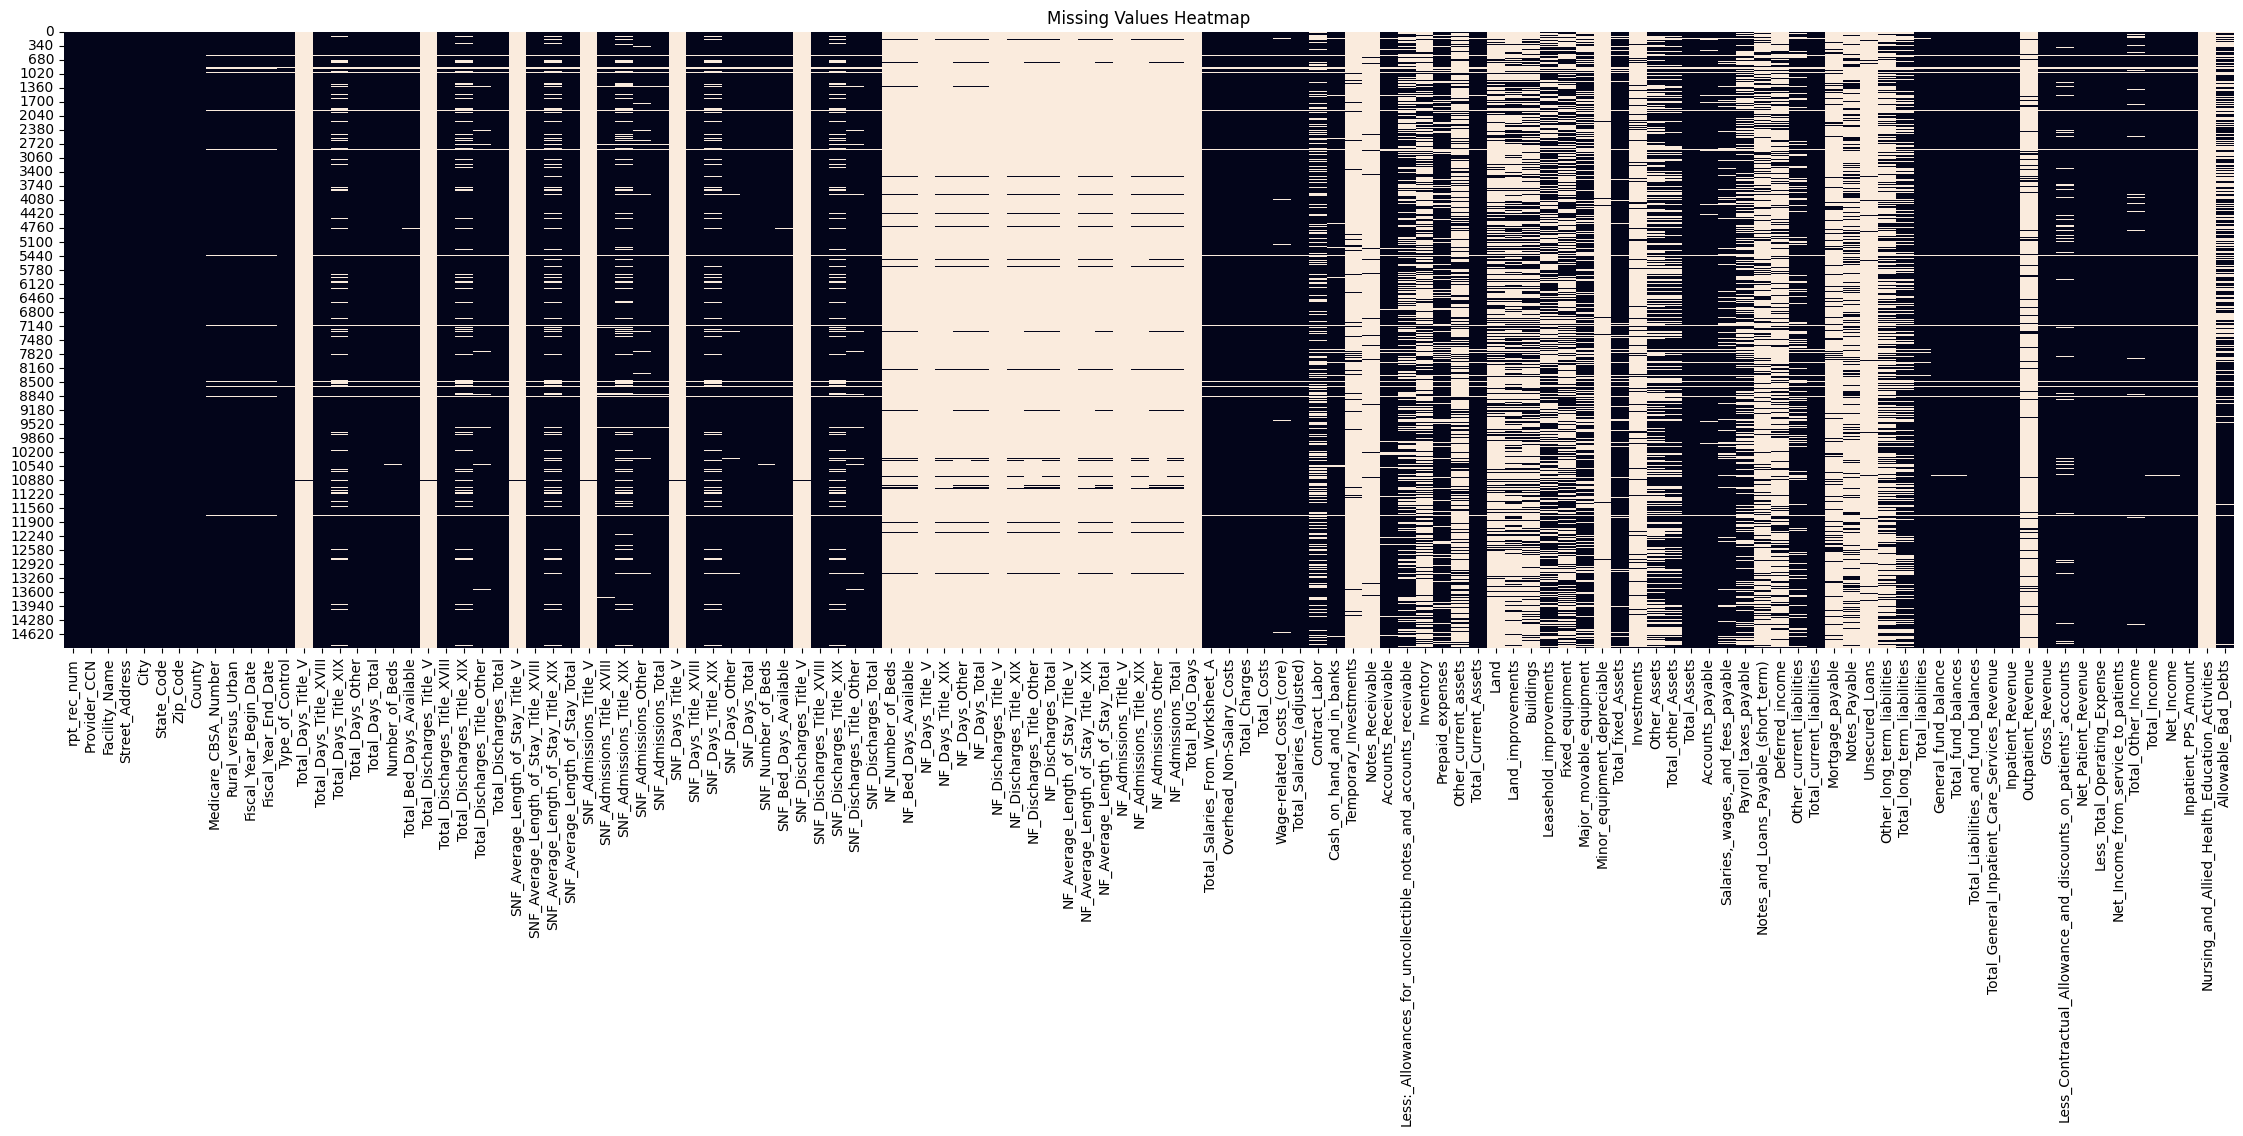

In [109]:
plt.figure(figsize=(28, 8))
sns.heatmap(df20.isnull(), cbar=False)   # and do df21
plt.title("Missing Values Heatmap")

I am dropping these columns because they are not in df15-19 and they have less than 10 values in df20-21.

In [110]:
# List of columns to extract
columns_to_drop = [
    "rpt_rec_num", "Total_Days_Title_V", "Total_Discharges_Title_V", "NF_Number_of_Beds",
    "NF_Bed_Days_Available", "NF_Days_Title_V", "NF_Days_Title_XIX", "NF_Days_Other", "NF_Days_Total",
    "NF_Discharges_Title_V", "NF_Discharges_Title_XIX", "NF_Discharges_Title_Other", "NF_Discharges_Total",
    "NF_Average_Length_of_Stay_Title_V", "NF_Average_Length_of_Stay_Title_XIX", "NF_Average_Length_of_Stay_Total",
    "NF_Admissions_Title_V", "NF_Admissions_Title_XIX", "NF_Admissions_Other", "NF_Admissions_Total",
    "Temporary_Investments", "Notes_Receivable", "Minor_equipment_depreciable", "Deferred_income", "Unsecured_Loans", 
    "Outpatient_Revenue", "Nursing_and_Allied_Health_Education_Activities", "SNF_Average_Length_of_Stay_Title_V", "SNF_Admissions_Title_V", "SNF_Days_Title_V", "SNF_Discharges_Title_V"

]

# Drop the specified columns
df21_cleaned = df21.drop(columns=columns_to_drop)

# Display the cleaned dataframe
df21_cleaned.sort_values(by="Provider_CCN")

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts
10978,15009,BURNS NURSING HOME,701 MONROE STREET NW,RUSSELLVILLE,AL,35653,MARION,99901.0,R,07/01/2021,06/30/2022,4.0,1659.0,15606.0,1525.0,18790.0,57.0,20805.0,38.0,25.0,27.0,90.0,43.66,624.24,208.78,58.0,8.0,19.0,85.0,1659.0,15606.0,1525.0,18790.0,57.0,20805.0,38.0,25.0,27.0,90.0,NaN,2627603.0,2751774.0,936407.0,677737.0,487866.0,2627603.0,NaN,819608.0,1054496.0,365969.0,NaN,NaN,-3614.0,1504521.0,733898.0,163092.0,1150722.0,NaN,137676.0,455342.0,1390813.0,63000.0,NaN,188374.0,3083708.0,65645.0,NaN,2792.0,NaN,183358.0,251795.0,NaN,NaN,NaN,NaN,251795.0,2831913.0,2831913.0,3083708.0,4866591.0,5800011.0,5800011.0,434046.0,5365965.0,5379377.0,-13412.0,1051607.0,1038195.0,814664.0,777652.0,NaN
10094,15010,COOSA VALLEY HEALTHCARE CENTER LLC,260 W. WALNUT STREET,SYLACAUGA,AL,35150,TALLADEGA,99901.0,R,07/01/2021,06/30/2022,6.0,1392.0,21852.0,5299.0,28543.0,85.0,31025.0,84.0,56.0,108.0,248.0,16.57,390.21,115.09,101.0,43.0,104.0,248.0,1392.0,21852.0,5299.0,28543.0,85.0,31025.0,84.0,56.0,108.0,248.0,NaN,3491704.0,4111195.0,472228.0,817768.0,537711.0,3491704.0,348446.0,-96466.0,618518.0,7301.0,NaN,15022.0,NaN,529773.0,NaN,NaN,NaN,24085.0,308771.0,NaN,198582.0,NaN,1000.0,635914.0,1364269.0,249155.0,100024.0,15693.0,NaN,913206.0,1278078.0,NaN,NaN,NaN,2.0,1278080.0,86189.0,86189.0,1364269.0,6295798.0,6768026.0,6768026.0,-752815.0,7520841.0,7602899.0,-82058.0,170280.0,88222.0,-26995.0,667546.0,NaN
10784,15014,EASTVIEW REHAB & HEALTHCARE CTR,7755 4TH AVENUE SOUTH,BIRMINGHAM,AL,35206,JEFFERSON,13820.0,U,07/01/2021,06/30/2022,6.0,2525.0,20777.0,2575.0,25877.0,90.0,32850.0,30.0,35.0,23.0,88.0,84.17,593.63,294.06,13.0,8.0,29.0,50.0,2525.0,20777.0,2575.0,25877.0,90.0,32850.0,30.0,35.0,23.0,88.0,NaN,3712128.0,4833041.0,1163639.0,952960.0,734481.0,3712128.0,515640.0,149360.0,1030815.0,77601.0,NaN,NaN,11033.0,1113607.0,NaN,69090.0,356131.0,664953.0,977332.0,335632.0,632491.0,NaN,-5400.0,-1951127.0,-205029.0,658805.0,161499.0,2.0,NaN,267764.0,1088070.0,NaN,368746.0,NaN,368748.0,1456818.0,-1661847.0,-1

In [111]:
import pandas as pd

# List of columns to extract
columns_to_drop = [
    "rpt_rec_num", "Total_Days_Title_V", "Total_Discharges_Title_V", "NF_Number_of_Beds",
    "NF_Bed_Days_Available", "NF_Days_Title_V", "NF_Days_Title_XIX", "NF_Days_Other", "NF_Days_Total",
    "NF_Discharges_Title_V", "NF_Discharges_Title_XIX", "NF_Discharges_Title_Other", "NF_Discharges_Total",
    "NF_Average_Length_of_Stay_Title_V", "NF_Average_Length_of_Stay_Title_XIX", "NF_Average_Length_of_Stay_Total",
    "NF_Admissions_Title_V", "NF_Admissions_Title_XIX", "NF_Admissions_Other", "NF_Admissions_Total",
    "Temporary_Investments", "Notes_Receivable", "Minor_equipment_depreciable", "Deferred_income", "Unsecured_Loans", 
    "Outpatient_Revenue", "Nursing_and_Allied_Health_Education_Activities","SNF_Average_Length_of_Stay_Title_V", "SNF_Admissions_Title_V", "SNF_Days_Title_V", "SNF_Discharges_Title_V"

]

# Drop the specified columns
df20_cleaned = df20.drop(columns=columns_to_drop)

# Display the cleaned dataframe
df20_cleaned.sort_values(by="Provider_CCN")

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts
7834,15009,BURNS NURSING HOME,701 MONROE STREET,RUSSELVILLE,AL,35653,FRANKLIN,99901.0,R,07/01/2020,06/30/2021,4.0,1651.0,13119.0,4231.0,19001.0,57.0,20805.0,36.0,13.0,44.0,93.0,45.86,1009.15,204.31,57.0,8.0,35.0,100.0,1651.0,13119.0,4231.0,19001.0,57.0,20805.0,36.0,13.0,44.0,93.0,NaN,2535925.0,2562692.0,922882.0,622552.0,469560.0,2514719.0,NaN,1008456.0,907855.0,142446.0,NaN,300.0,NaN,1876472.0,733898.0,163092.0,1121975.0,NaN,135774.0,434867.0,1432659.0,63000.0,NaN,63000.0,3372131.0,119729.0,25789.0,2.0,521425.0,-9958.0,1364134.0,NaN,NaN,NaN,NaN,1364134.0,2007997.0,2007997.0,3372131.0,4615682.0,5538564.0,5538564.0,320626.0,5217938.0,5098617.0,119321.0,73103.0,192424.0,192424.0,782082.0,NaN
7374,15010,COOSA VALLEY HEALTHCARE CENTER LLC,260 W. WALNUT STREET,SYLACAUGA,AL,35150,TALLADEGA,99901.0,R,07/01/2020,06/30/2021,6.0,1351.0,20655.0,3796.0,25802.0,85.0,31025.0,57.0,71.0,84.0,212.0,23.70,290.92,121.71,75.0,56.0,84.0,215.0,1351.0,20655.0,3796.0,25802.0,85.0,31025.0,57.0,71.0,84.0,212.0,NaN,3271047.0,3761505.0,400058.0,617520.0,583480.0,3271047.0,283587.0,7026.0,647835.0,67156.0,NaN,15953.0,NaN,604738.0,NaN,NaN,NaN,8000.0,233157.0,NaN,162655.0,NaN,1000.0,415865.0,1183258.0,278211.0,108215.0,25755.0,NaN,657893.0,1070074.0,NaN,NaN,NaN,NaN,1070074.0,113184.0,113184.0,1183258.0,5582320.0,5982378.0,5982378.0,-750003.0,6732381.0,7032552.0,-300171.0,1259859.0,959688.0,573936.0,603001.0,NaN
7341,15014,EASTVIEW REHAB & HEALTHCARE CTR,7755 4TH AVENUE SOUTH,BIRMINGHAM,AL,35206,JEFFERSON,13820.0,U,07/01/2020,06/30/2021,6.0,1623.0,21724.0,2015.0,25362.0,90.0,32850.0,7.0,50.0,20.0,77.0,231.86,434.48,329.38,20.0,23.0,27.0,70.0,1623.0,21724.0,2015.0,25362.0,90.0,32850.0,7.0,50.0,20.0,77.0,NaN,3629744.0,4789901.0,1164786.0,913112.0,881156.0,3629744.0,498957.0,236862.0,925770.0,361328.0,NaN,NaN,11033.0,812337.0,NaN,69090.0,356131.0,626280.0,946790.0,335632.0,707670.0,NaN,NaN,NaN,1520007.0,650310.0,150588.0,3271.0,NaN,257508.0,1061677.0,NaN,612036.0,NaN,1997764.0,3059441.0,-1539434.0,-1539434.0,1

In [112]:
# Find columns in df1 but not in df2
cols_in_df1_not_df2 = list(set(df20_cleaned.columns) - set(df19.columns))

# Find columns in df2 but not in df1
cols_in_df2_not_df1 = list(set(df19.columns) - set(df20_cleaned.columns))

# Print results
print("Columns in df1 but not in df2:", cols_in_df1_not_df2)
print("Columns in df2 but not in df1:", cols_in_df2_not_df1)


Columns in df1 but not in df2: ['SNF_Bed_Days_Available', 'Overhead_Non-Salary_Costs', 'SNF_Average_Length_of_Stay_Total', 'Notes_and_Loans_Payable_(short_term)', 'Other_current_assets', 'SNF_Number_of_Beds', 'Notes_Payable', 'SNF_Average_Length_of_Stay_Title_XIX', 'Payroll_taxes_payable', 'Less:_Allowances_for_uncollectible_notes_and_accounts_receivable', 'Inventory', 'Total_long_term_liabilities', 'Contract_Labor', 'Allowable_Bad_Debts', 'Total_Salaries_(adjusted)', 'Salaries,_wages,_and_fees_payable', 'Total_Current_Assets', 'Land_improvements', 'Total_Other_Income', "Less_Contractual_Allowance_and_discounts_on_patients'_accounts", 'Net_Income_from_service_to_patients', 'Leasehold_improvements', 'Prepaid_expenses', 'Total_General_Inpatient_Care_Services_Revenue', 'Investments', 'Mortgage_payable', 'Total_Liabilities_and_fund_balances', 'Wage-related_Costs_(core)', 'Total_Charges', 'Land', 'SNF_Average_Length_of_Stay_Title_XVIII', 'Other_long_term_liabilities']
Columns in df2 but not

Columns in df1 but not in df2: ['Total_Charges', 'Total_long_term_liabilities', 'Other_long_term_liabilities', 'SNF_Average_Length_of_Stay_Total', 'Notes_and_Loans_Payable_(short_term)', 'Total_Current_Assets', 'Land', 'Total_Salaries_(adjusted)', 'Leasehold_improvements', 'Overhead_Non-Salary_Costs', 'Contract_Labor', 'Total_Other_Income', 'Allowable_Bad_Debts', 'Salaries,_wages,_and_fees_payable', 'SNF_Average_Length_of_Stay_Title_XIX', 'Investments', 'SNF_Bed_Days_Available', 'Net_Income_from_service_to_patients', 'Total_Liabilities_and_fund_balances', 'Total_General_Inpatient_Care_Services_Revenue', 'Mortgage_payable', 'Notes_Payable', 'Less:_Allowances_for_uncollectible_notes_and_accounts_receivable', 'Inventory', 'Land_improvements', 'SNF_Average_Length_of_Stay_Title_XVIII', "Less_Contractual_Allowance_and_discounts_on_patients'_accounts", 'Other_current_assets', 'Payroll_taxes_payable', 'SNF_Number_of_Beds', 'Wage-related_Costs_(core)', 'Prepaid_expenses']


Columns in df2 but not in df1: ['Net_Income_from_patients', 'Wage_related_Costs_core', 'SNF_Number_of_beds', 'Total_current_assets', 'Total_Liab_and_fund_balances', 'Salaries_wages_and_fees_payable', 'Total_General_Inpatient_Revenue', 'Less_discounts_on_patients', 'Total_Salaries_adjusted', 'SNF_Average_Length_of_stay_Tot', 'Overhead_Non_Salary_Costs', 'SNF_Average_Length_stay_XVIII', 'rpt_rec_num', 'SNF_Average_Length_stay_XIX', 'SNF_bed_Days_Available']

## Missing variable analysis
We have identified 27 columns that are in df20 and df21 but not in df15-19. 

We need to determine what to do for each one. 

The options are: 

See if calculatable from another column and do it in 2015-2019.

See if correlated and maybe drop if not at all. 

See if there is a statistical significance from the target varaible(s).

Possibly make another dataset with the (on the edge) columns.

Determine if the varaible is "universal" and can appy to every year.

### TOTAL_CHARGES
We are analysing what to do with total_charges

In [113]:
import pandas as pd

# List of columns to keep
columns_to_keep = [
    "Total_Charges", "Total_Costs","Inpatient_Revenue", "Gross_Revenue", 
    "Total_General_Inpatient_Care_Services_Revenue", "Net_Patient_Revenue", 
    "Less_Contractual_Allowance_and_discounts_on_patients'_accounts",  
    "Less_Total_Operating_Expense", "Net_Income_from_service_to_patients",  
    "Total_Other_Income", "Total_Income", "Net_Income"
]

# Select only these columns
df_selected = df20_cleaned[columns_to_keep]

# Display the first few rows
df_selected.head()


,Total_Charges,Total_Costs,Inpatient_Revenue,Gross_Revenue,Total_General_Inpatient_Care_Services_Revenue,Net_Patient_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income
0,299558.0,195203.0,1795483.0,1795483.0,1490851.0,1083396.0,712087.0,1023062.0,60334.0,50.0,60384.0,60384.0
1,254234.0,210445.0,1286852.0,1286852.0,1032618.0,814204.0,472648.0,1076191.0,-261987.0,806.0,-261181.0,-261181.0
2,791188.0,492172.0,1906805.0,1907688.0,1116500.0,1543399.0,364289.0,1735321.0,-191922.0,120.0,-191802.0,-191802.0
3,34477.0,42549.0,1060866.0,1060866.0,1026389.0,877453.0,183413.0,914701.0,-37248.0,349.0,-36899.0,-36899.0
4,137122.0,222656.0,2038599.0,2038599.0,1901478.0,2038599.0,NaN,1880948.0,157651.0,20.0,157671.0,157671.0


### Total Charges is not in 15-19
These other variables other than Total_Charges are present in all datasets.
I tried all the combos I could to get to Total charges by calculating it from other varaibles. There is no way. 

In [114]:

# Remove rows with any NaN values
df_selected_cleaned = df_selected.dropna()

# Assuming df_selected is your dataset
# Define features and target variable
features = ['Inpatient_Revenue', 'Gross_Revenue', 'Total_General_Inpatient_Care_Services_Revenue', 'Net_Patient_Revenue']
target = 'Total_Charges'

# Prepare the data for training
X = df_selected_cleaned[features]
y = df_selected_cleaned[target]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression ---
# Initialize the linear regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lin_reg = lin_reg.predict(X_test)

# Calculate performance metrics for Linear Regression
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

# --- Model 2: Random Forest Regressor ---
# Initialize the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_reg = rf_reg.predict(X_test)

# Calculate performance metrics for Random Forest
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

# Results
print(f"Linear Regression Model:")
print(f"Mean Squared Error: {mse_lin_reg}")
print(f"R-squared: {r2_lin_reg}\n")

print(f"Random Forest Regressor Model:")
print(f"Mean Squared Error: {mse_rf_reg}")
print(f"R-squared: {r2_rf_reg}")


Linear Regression Model:
Mean Squared Error: 2221854718799.4473
R-squared: 0.31279200793742357

Random Forest Regressor Model:
Mean Squared Error: 579483406567.4524
R-squared: 0.8207688266512866


In [115]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned[['Total_Charges']]  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Total_Charges: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Total_Charges is not significant in predicting Net_Income.")


Coefficient (Slope) for Total_Charges: 0.035781499506833014
T-statistic: 391.34042012488203
P-value: 0.0
Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.


In conclusion, total_charges cannot be directly calculated. It has about a 1% correlation with Net_Income. and it is not in datasets 2015-2019. It can be calculated using a randomforest formula based on the other columns but it has 80% accuracy. the previous years could also be calculated using the difference from 20 and 21 and linearly estimate what the previous years were, but it will not be accurate at all. Hypothesis testing for significance resulted in it being significant, but not by a lot. 

We will try adding it to the master data so it atleast is present. During cleaning and simplification, we will probably drop it especially because it has high multicollinearity with some other variables.

I will have to make the variable Total_Charges in df15 - df19.


In [116]:
# adding an empty Total_Charges to df15 df16 df17 df18 df19
df15['Total_Charges'] = np.nan
df16['Total_Charges'] = np.nan
df17['Total_Charges'] = np.nan
df18['Total_Charges'] = np.nan
df19['Total_Charges'] = np.nan


In [117]:
df19.sample(4)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment,Total_Charges
560,1252351,366039,POINT PLACE CENTER,6101 NORTH SUMMIT,TOLEDO,OH,42611,LUCAS,45780.0,U,1/1/2019,7/31/2019,4,823125.0,366066.0,NaN,4151.0,-7588897.0,5273093.0,563051.0,5273093.0,3994113.0,1935855.0,22385.0,-653117.0,-656875.0,3337238.0,98.0,-6418007.0,131894.0,2661119.0,92.0,29.0,53.0,174.0,76.73,83.74,24.64,8920.0,3936.0,1109.0,13965.0,90.0,47.0,45.0,182.0,98.0,20776.0,122312.0,-6112346.0,20776.0,579611.0,8920.0,3936.0,1109.0,13965.0,90.0,47.0,45.0,182.0,4374102.0,-653117.0,-6112346.0,1109.0,1332994.0,1332994.0,305661.0,689299.0,NaN,-7588897.0,1476551.0,-6418007.0,223442.0,NaN,NaN
8702,1279439,115325,PRUITTHEALTH - WASHINGTON LLC,112 HOSPITAL DRIVE,WASHINGTON,GA,30673,WILKES,99911.0,R,7/1/2019,6/30/2020,4,181570.0,392292.0,NaN,14904.0,-3918432.0,4106252.0,286450.0,4106252.0,3712119.0,996095.0,174403.0,-561552.0,-601962.0,3110157.0,47.0,NaN,58954.0,2418262.0,14.0,16.0,12.0,42.0,319.00,616.63,63.50,1685.0,11716.0,635.0,14036.0,15.0,19.0,10.0,44.0,47.0,17202.0,131733.0,-3334926.0,17202.0,554939.0,1685.0,11716.0,635.0,14036.0,15.0,19.0,10.0,44.0,3401447.0,-561552.0,-3334926.0,290.0,1293857.0,1293857.0,-3509946.0,583506.0,175020.0,-3918432.0,583506.0,NaN,231886.0,210511.0,NaN
9333,1280441,555083,ESKATON CARE CENTER MANZANITA,5318 MANZANITA AVENUE,CARMICHAEL,CA,95608,SACRAMENTO,40900.0,U,1/1/2019,12/31/2019,4,1697277.0,295368.0,1422214.0,718.0,1776213.0,14855281.0,919742.0,14855281.0,14814094.0,1791030.0,1888032.0,-1652200.0,-1749843.0,13064251.0,99.0,11.0,22519.0,7671895.0,636.0,45.0,93.0,774.0,35.58,195.43,15.56,11223.0,15439.0,1307.0,27969.0,623.0,79.0,84.0,786.0,99.0,36135.0,NaN,3015568.0,36135.0,2780741.0,11223.0,15439.0,1307.0,27969.0,623.0,79.0,84.0,786.0,11293651.0,-1652200.0,3015568.0,970.0,7142199.0,7142199.0,1702754.0,608679.0,1312803.0,1776213.0,1239355.0,11.0,2440737.0,NaN,NaN
5257,1271617,225584,PARK AVENUE HEALTH CENTER,146 PARK AVENUE,ARLINGTON,MA,2174,MIDDLESEX,15764.0,U,1/1/2019,12/31/2019,4,1136083.0,839395.0,NaN,NaN,-329839.0,8596360.0,1289047.0,8596360.0,8198373.0,691175.0,73397.0,-293110.0,-293188.0,7905185.0,89.0,717200.0,292426.0,4324774.0,61.0,56.0,78.0,195.0,147.42,379.95,30.58,4184.0,22037.0,2232.0,28453.0,62.0,58.0,73.0,193.0,89.0,32485.0,151955.0,1876034.0,32485.0,1012154.0,4184.0,22037.0,2232.0,28453.0,62.0,58.0,73.0,193.0,7308766.0,-293110.0,1876034.0,1539.0,3873599.0,3873599.0,1071356.0,1283776.0,87478.0,-329839.0,2205873.0,717200.0,502372.0,NaN,NaN


### Contract Labor 
It is in df20 and df21 but not the others.

In [118]:
df20_cleaned

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts
0,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,10/01/2019,10/31/2019,6.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,30.63,206.00,51.25,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,NaN,371857.0,651205.0,299558.0,195203.0,79053.0,371857.0,136024.0,15647.0,1223466.0,135613.0,65289.0,24359.0,NaN,1284327.0,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0,NaN,13080009.0,13080009.0,14400312.0,493549.0,259658.0,NaN,566616.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,4696379.0,4696379.0,14400312.0,1490851.0,1795483.0,1795483.0,712087.0,1083396.0,1023062.0,60334.0,50.0,60384.0,60384.0,476754.0,4814.0
1,495268,MARY WASHINGTON HEALTH CENTER,2400 MCKINNEY BLVD,COLONIAL BEACH,VA,22443,WESTMORELAND,99949.0,R,11/01/2019,12/29/2019,4.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,31.00,32.50,130.92,16.0,9.0,4.0,29.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,NaN,369008.0,707183.0,254234.0,210445.0,60217.0,369008.0,156009.0,-15807.0,55469.0,NaN,NaN,-318469.0,NaN,-278807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.0,257.0,-278550.0,73933.0,NaN,-337340.0,NaN,5427.0,-257980.0,NaN,NaN,257.0,259.0,-257721.0,-20829.0,-20829.0,-278550.0,1032618.0,1286852.0,1286852.0,472648.0,814204.0,1076191.0,-261987.0,806.0,-261181.0,-261181.0,101663.0,NaN
2,295107,ADVANCED HEALTH CARE OF PARADISE,3455 PECOS-MCLEOD INTERCONNECT,LAS VEGAS,NV,89121,CLARK,29820.0,U,10/04/2019,12/31/2019,4.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,29.38,NaN,43.67,133.0,NaN,5.0,138.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,NaN,713984.0,1021337.0,791188.0,492172.0,83667.0,713984.0,17352.0,-20979.0,1533839.0,4500.0,NaN,50238.0,NaN,1433191.0,NaN,NaN,NaN,NaN,NaN,79549.0,99168.0,NaN,1285094.0,1285094.0,2817453.0,90834.0,142619.0,NaN,NaN,11931.0,245384.0,NaN,515503.0,NaN,3287601.0,3532985.0,-715532.0,-715532.0,2817453.0,1116500.0,1906805.0,1907688.0,364289.0,1543399.0,1735321.0,-191922.0,120.0,-191802.0,-19180

In [119]:
# Define the most relevant 20 variables related to Contract_Labor
labor_related_columns = [
    "Contract_Labor",
    "Total_Salaries_From_Worksheet_A",
    "Total_Salaries_(adjusted)",
    "Wage-related_Costs_(core)",
    "Overhead_Non-Salary_Costs",
    "Total_Costs",
    "Total_Charges",
    "Net_Income",
    "Total_Income",
    "Net_Patient_Revenue",
    "Total_Days_Total",
    "Total_Discharges_Total",
    "SNF_Days_Total",
    "SNF_Admissions_Total",
    "SNF_Discharges_Total",
    "SNF_Number_of_Beds",
    "Total_Bed_Days_Available",
    "Total_fixed_Assets",
    "Total_Assets",
    "Payroll_taxes_payable"
]

# Create a new DataFrame with the selected columns
df_labor_vars = df20_cleaned[labor_related_columns]

# Display the first few rows to verify
df_labor_vars.head()


,Contract_Labor,Total_Salaries_From_Worksheet_A,Total_Salaries_(adjusted),Wage-related_Costs_(core),Overhead_Non-Salary_Costs,Total_Costs,Total_Charges,Net_Income,Total_Income,Net_Patient_Revenue,Total_Days_Total,Total_Discharges_Total,SNF_Days_Total,SNF_Admissions_Total,SNF_Discharges_Total,SNF_Number_of_Beds,Total_Bed_Days_Available,Total_fixed_Assets,Total_Assets,Payroll_taxes_payable
0,136024.0,371857.0,371857.0,79053.0,651205.0,195203.0,299558.0,60384.0,60384.0,1083396.0,2921.0,57.0,2921.0,58.0,57.0,100.0,3100.0,35976.0,14400312.0,NaN
1,156009.0,369008.0,369008.0,60217.0,707183.0,210445.0,254234.0,-261181.0,-261181.0,814204.0,3404.0,26.0,3404.0,29.0,26.0,66.0,3894.0,NaN,-278550.0,-337340.0
2,17352.0,713984.0,713984.0,83667.0,1021337.0,492172.0,791188.0,-191802.0,-191802.0,1543399.0,2227.0,51.0,2227.0,138.0,51.0,38.0,3382.0,99168.0,2817453.0,NaN
3,NaN,324450.0,324450.0,33821.0,590251.0,42549.0,34477.0,-36899.0,-36899.0,877453.0,5425.0,18.0,5425.0,10.0,18.0,123.0,7749.0,484549.0,3176256.0,26575.0
4,NaN,844993.0,844993.0,103797.0,1035955.0,222656.0,137122.0,157671.0,157671.0,2038599.0,5874.0,30.0,5874.0,26.0,30.0,118.0,7198.0,334401.0,16961403.0,-177.0


I cannot find a way to calculate it or a trend. 

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Remove rows with any NaN values
df_selected_cleaned = df_labor_vars.dropna()

# Assuming df_selected is your dataset
# Define features and target variable
target = 'Contract_Labor'
labor_columns = [
    "Total_Salaries_From_Worksheet_A",
    "Total_Salaries_(adjusted)",
    "Wage-related_Costs_(core)",
    "Overhead_Non-Salary_Costs",
    "Total_Costs",
    "Net_Income",
    "Total_Charges",
    "Net_Patient_Revenue",
    "Total_Days_Total",
    "Total_Discharges_Total",
    "SNF_Days_Total",
    "SNF_Admissions_Total",
    "SNF_Discharges_Total",
    "SNF_Number_of_Beds",
    "Total_Bed_Days_Available",
    "Total_fixed_Assets",
    "Total_Assets",
    "Payroll_taxes_payable"
]

# Prepare the data for training
X = df_selected_cleaned[labor_columns]
y = df_selected_cleaned[target]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression ---
# Initialize the linear regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lin_reg = lin_reg.predict(X_test)

# Calculate performance metrics for Linear Regression
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

# --- Model 2: Random Forest Regressor ---
# Initialize the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_reg = rf_reg.predict(X_test)

# Calculate performance metrics for Random Forest
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

# Results
print(f"Linear Regression Model:")
print(f"Mean Squared Error: {mse_lin_reg}")
print(f"R-squared: {r2_lin_reg}\n")

print(f"Random Forest Regressor Model:")
print(f"Mean Squared Error: {mse_rf_reg}")
print(f"R-squared: {r2_rf_reg}")


Linear Regression Model:
Mean Squared Error: 324482208067.026
R-squared: 0.5757153184767569

Random Forest Regressor Model:
Mean Squared Error: 226795028648.15125
R-squared: 0.7034485894488274


In [121]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Contract_Labor']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Total_Charges: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Total_Charges is not significant in predicting Net_Income.")


Coefficient (Slope) for Total_Charges: 0.19870491294125217
T-statistic: 531.0734456139027
P-value: 0.0
Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.


In [122]:
df_labor_vars

,Contract_Labor,Total_Salaries_From_Worksheet_A,Total_Salaries_(adjusted),Wage-related_Costs_(core),Overhead_Non-Salary_Costs,Total_Costs,Total_Charges,Net_Income,Total_Income,Net_Patient_Revenue,Total_Days_Total,Total_Discharges_Total,SNF_Days_Total,SNF_Admissions_Total,SNF_Discharges_Total,SNF_Number_of_Beds,Total_Bed_Days_Available,Total_fixed_Assets,Total_Assets,Payroll_taxes_payable
0,136024.0,371857.0,371857.0,79053.0,651205.0,195203.0,299558.0,60384.0,60384.0,1083396.0,2921.0,57.0,2921.0,58.0,57.0,100.0,3100.0,35976.0,14400312.0,NaN
1,156009.0,369008.0,369008.0,60217.0,707183.0,210445.0,254234.0,-261181.0,-261181.0,814204.0,3404.0,26.0,3404.0,29.0,26.0,66.0,3894.0,NaN,-278550.0,-337340.0
2,17352.0,713984.0,713984.0,83667.0,1021337.0,492172.0,791188.0,-191802.0,-191802.0,1543399.0,2227.0,51.0,2227.0,138.0,51.0,38.0,3382.0,99168.0,2817453.0,NaN
3,NaN,324450.0,324450.0,33821.0,590251.0,42549.0,34477.0,-36899.0,-36899.0,877453.0,5425.0,18.0,5425.0,10.0,18.0,123.0,7749.0,484549.0,3176256.0,26575.0
4,NaN,844993.0,844993.0,103797.0,1035955.0,222656.0,137122.0,157671.0,157671.0,2038599.0,5874.0,30.0,5874.0,26.0,30.0,118.0,7198.0,334401.0,16961403.0,-177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14944,28405.0,4620444.0,4620444.0,680814.0,7267864.0,1585761.0,1454089.0,545241.0,545241.0,11533335.0,32898.0,397.0,32898.0,295.0,397.0,107.0,39162.0,461305.0,2519888.0,NaN
14945,956956.0,6897345.0,6897345.0,1110438.0,10205508.0,1322483.0,3325030.0,-433682.0,-433682.0,16610849.0,67098.0,369.0,67098.0,360.0,369.0,240.0,87840.0,417885.0,6382624.0,NaN
14946,NaN,1217063.0,1217063.0,372070.0,935345.0,16221.0,19670.0,-511877.0,-511877.0,1640531.0,6103.0,39.0,6103.0,37.0,39.0,NaN,NaN,2000.0,256712.0,NaN
14947,255632.0,1408295.0,1408295.0,218453.0,2134249.0,363700.0,453329.0,-541814.0,-541814.0,2999135.0,10223.0,80.0,10223.0,89.0,80.0,120.0,22080.0,145033.0,1476332.0,74483.0


C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\2026169166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labor_vars["Contract_Labor_Group"] = df_labor_vars["Contract_Labor"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

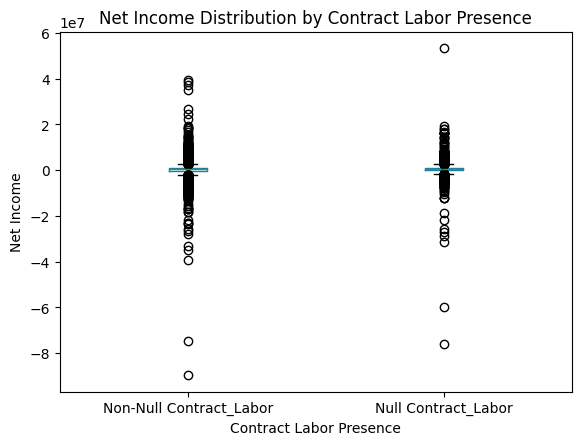

       Non-Null Contract_Labor  Null Contract_Labor
count             1.011500e+04         4.590000e+03
mean              2.412548e+05         3.723099e+05
std               2.512138e+06         2.583888e+06
min              -8.971656e+07        -7.619267e+07
25%              -3.191710e+05        -1.677922e+05
50%               2.488180e+05         3.415350e+05
75%               8.800960e+05         9.505118e+05
max               3.918180e+07         5.337325e+07
T-Test p-value: 0.0036757032018827976
Mann-Whitney U Test p-value: nan


In [123]:
import matplotlib.pyplot as plt

# Create a new column for grouping
df_labor_vars["Contract_Labor_Group"] = df_labor_vars["Contract_Labor"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_labor_vars.boxplot(column="Net_Income", by="Contract_Labor_Group", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Contract Labor Presence")
plt.suptitle("")
plt.xlabel("Contract Labor Presence")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Contract_Labor", "Null Contract_Labor"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df_labor_vars[df_labor_vars["Contract_Labor"].notnull()]
df_null = df_labor_vars[df_labor_vars["Contract_Labor"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null Contract_Labor": df_non_null["Net_Income"].describe(),
    "Null Contract_Labor": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

Contract_Labor is significant so we should keep it.

There is an important difference between the null and the non null Contract_Labor in terms of Net_Income. 
I think it will be okay to make the contract labor NULL = 0 because that means they didn't contract labor quite simply. 

So I will put contract labor files into the df15-df19. 

In [124]:
# adding an empty Total_Charges to df15 df16 df17 df18 df19
df15['Contract_Labor'] = np.nan
df16['Contract_Labor'] = np.nan
df17['Contract_Labor'] = np.nan
df18['Contract_Labor'] = np.nan
df19['Contract_Labor'] = np.nan

### Number_of_beds
in df19 it is called SNF_Number_of_beds

In [125]:
df20_cleaned.sample(4)

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts
11487,245544,VICTORY HEALTH & REHABILITATION CENT,512 49TH AVE N,MINNEAPOLIS,MN,55430,HENNEPI,33460.0,U,01/01/2020,12/31/2020,6.0,1698.0,16740.0,2679.0,21117.0,87.0,31842.0,33.0,86.0,30.0,149.0,51.45,194.65,141.72,34.0,78.0,29.0,141.0,1698.0,16740.0,2679.0,21117.0,87.0,31842.0,33.0,86.0,30.0,149.0,NaN,3416839.0,3557576.0,278598.0,714373.0,402236.0,3416839.0,NaN,1011082.0,1323901.0,NaN,NaN,237303.0,36088.0,2608374.0,NaN,NaN,NaN,64835.0,NaN,854820.0,781998.0,NaN,122233.0,122233.0,3512605.0,2050334.0,416854.0,NaN,NaN,NaN,2467188.0,NaN,498743.0,NaN,1546768.0,4013956.0,-501351.0,-501351.0,3512605.0,6678765.0,6678765.0,6678765.0,NaN,6678765.0,6974415.0,-295650.0,NaN,-295650.0,-295650.0,1083518.0,149618.0
3850,146192,THRIVE OF LISLE,2850 OGDEN AVENUE,LISLE,IL,60532,DUPAGE,16974.0,U,07/13/2020,12/31/2020,5.0,2046.0,15.0,1123.0,3184.0,68.0,11696.0,111.0,1.0,65.0,177.0,18.43,15.00,17.99,130.0,1.0,65.0,196.0,2046.0,15.0,1123.0,3184.0,68.0,11696.0,111.0,1.0,65.0,177.0,NaN,2151638.0,2594318.0,1622511.0,1371891.0,543702.0,2151638.0,NaN,264849.0,667915.0,7927.0,NaN,34275.0,NaN,959112.0,NaN,NaN,NaN,NaN,NaN,104403.0,83403.0,NaN,NaN,6240.0,1048755.0,545151.0,132687.0,NaN,NaN,7243.0,3788868.0,NaN,NaN,NaN,NaN,3788868.0,-2740113.0,-2740113.0,1048755.0,2004013.0,3596113.0,3596113.0,1592081.0,2004032.0,4745956.0,-2741924.0,237.0,-2741687.0,-2741687.0,1366853.0,NaN
11823,495045,MC STRATFORD HALL OF RICHMOND VA LLC,2125 HILLIARD RD,RICHMOND,VA,23228,RICHMOND,99949.0,U,06/01/2020,05/31/2021,2.0,2807.0,42318.0,9415.0,54540.0,264.0,96360.0,78.0,242.0,114.0,434.0,35.99,174.87,115.71,99.0,140.0,117.0,356.0,2807.0,42318.0,4167.0,49292.0,194.0,70810.0,78.0,242.0,106.0,426.0,NaN,7575524.0,7289860.0,3172190.0,1860690.0,1491181.0,7575524.0,533273.0,486.0,1238062.0,273541.0,NaN,9638.0,NaN,974645.0,NaN,NaN,NaN,416724.0,NaN,792093.0,778656.0,NaN,-502247.0,-502247.0,1251054.0,196626.0,752192.0,17469.0,NaN,156742.0,1123029.0,NaN,NaN,NaN,NaN,1123029.0,128025.0,128025.0,1251054.0,13931545.0,17103735.0,17103735.0,3268

In [126]:
df20_cleaned[df20_cleaned["Provider_CCN"] == 285085]

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts
8831,285085,IMMANUEL - FONTENELLE,6901 NORTH 72ND STREET,OMAHA,NE,68122-1799,DOUGLAS,36540.0,U,07/01/2020,06/30/2021,2.0,2926.0,18853.0,9342.0,31121.0,165.0,60225.0,63.0,42.0,80.0,185.0,46.44,448.88,168.22,72.0,7.0,95.0,174.0,2926.0,18853.0,9342.0,31121.0,165.0,60225.0,63.0,42.0,80.0,185.0,NaN,6993481.0,7326626.0,2566479.0,1531982.0,2027780.0,6993481.0,1950799.0,693293.0,804426.0,78300.0,NaN,NaN,NaN,1419419.0,NaN,468658.0,886651.0,NaN,403785.0,1170883.0,13835958.0,NaN,1984250.0,1984250.0,17239627.0,4120017.0,640591.0,NaN,NaN,NaN,4760608.0,NaN,NaN,27267407.0,27267407.0,32028015.0,-14788388.0,-14788388.0,17239627.0,9359615.0,9359615.0,11926094.0,1619861.0,10306233.0,14320107.0,-4013874.0,1098553.0,-2915321.0,-2915321.0,1705789.0,68642.0


In [127]:
df19[df19["Provider_CCN"] == 285085]

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment,Total_Charges,Contract_Labor
8896,1279698,285085,IMMANUEL - FONTENELLE,6901 NORTH 72ND STREET,OMAHA,NE,68122-1799,DOUGLAS,36540.0,U,7/1/2019,6/30/2020,4,970406.0,766442.0,886651.0,967558.0,-11873067.0,14046378.0,2050985.0,11451268.0,13450768.0,2406435.0,1110995.0,-1398259.0,-1810825.0,11639943.0,165.0,1984250.0,493619.0,6621812.0,78.0,4.0,112.0,194.0,189.17,716.41,39.64,12995.0,22925.0,3805.0,39725.0,82.0,32.0,96.0,210.0,165.0,60225.0,598374.0,5418424.0,60225.0,1505811.0,12995.0,22925.0,3805.0,39725.0,82.0,32.0,96.0,210.0,11451268.0,-1398259.0,5418424.0,1127.0,6828956.0,6828956.0,1588314.0,1858435.0,1845860.0,-11873067.0,17291491.0,1984250.0,1814900.0,403785.0,NaN,NaN


there are two columns in df20_cleaned for Number of beds. I need to see if they are the same or not.

In [128]:
import pandas as pd

# Compare Number_of_Beds with SNF_Number_of_Beds
df20_cleaned["Beds_Match"] = df20_cleaned["Number_of_Beds"] == df20_cleaned["SNF_Number_of_Beds"]

# Count matches and mismatches
match_count = df20_cleaned["Beds_Match"].sum()
mismatch_count = len(df20_cleaned) - match_count

# Print results
print(f"Matching rows: {match_count}")
print(f"Non-matching rows: {mismatch_count}")

# Get mismatched rows
mismatched_rows = df20_cleaned[~df20_cleaned["Beds_Match"]]

# Calculate the average difference for mismatched rows
average_difference = (mismatched_rows["Number_of_Beds"] - mismatched_rows["SNF_Number_of_Beds"]).abs().mean()

# Print results
print(f"Average difference in mismatched rows: {average_difference}")



Matching rows: 13040
Non-matching rows: 1909
Average difference in mismatched rows: 120.8294434470377


They are not the same 13040 are the same but 11671 arent. 

I want to compare both these columns now to the df19 one.

In [129]:
import pandas as pd

# Rename datasets for clarity
df20_cleaned1 = df20_cleaned.drop_duplicates().dropna(subset=["Provider_CCN", "Number_of_Beds"])
df19_cleaned1 = df19.drop_duplicates().dropna(subset=["Provider_CCN", "Number_of_Beds"])

# Merge on Provider_CCN to align data
merged_df = df20_cleaned1.merge(df19_cleaned1, on="Provider_CCN", suffixes=("_20", "_19"))

# Compare Number_of_Beds
merged_df["Number_of_Beds_Match"] = merged_df["Number_of_Beds_20"] == merged_df["Number_of_Beds_19"]

# Count matches and mismatches
number_beds_match_count = merged_df["Number_of_Beds_Match"].sum()
number_beds_mismatch_count = len(merged_df) - number_beds_match_count

# Print results
print(f"Matching 'Number_of_Beds': {number_beds_match_count}")
print(f"Non-matching 'Number_of_Beds': {number_beds_mismatch_count}")

# Optional: Display mismatched rows
mismatched_rows = merged_df[~merged_df["Number_of_Beds_Match"]]
print(mismatched_rows)


Matching 'Number_of_Beds': 14158
Non-matching 'Number_of_Beds': 1033
       Provider_CCN                      Facility_Name_20  \
21           265701                         ST. JOE MANOR   
39           235290                  METRON OF GREENVILLE   
90           165233   REGENCY PARK NRSG & REHAB-JEFFERSON   
116          185295                           DOVER MANOR   
125          366000  SYCAMORESPRING HEALTH CARE AND REHAB   
...             ...                                   ...   
15068        465188        POINTE MEADOW HEALTHCARE  INC.   
15082        465101                 ZION HEALTHCARE  INC.   
15103         45195                  THE SPRINGS BROADWAY   
15133        676093     ROCKDALE ESTATES & REHABILITATION   
15176        675424            GREEN OAKS REHAB & NURSING   

              Street_Address_20       City_20 State_Code_20 Zip_Code_20  \
21                10 LAKE DRIVE   BONNE TERRE            MO       63628   
39            828 E. WASHINGTON    GREENVILLE   

In [130]:
import pandas as pd

# Rename datasets for clarity
df20_cleaned1 = df20_cleaned.drop_duplicates().dropna(subset=["Provider_CCN", "SNF_Number_of_Beds"])
df19_cleaned1 = df19.drop_duplicates().dropna(subset=["Provider_CCN", "Number_of_Beds"])

# Merge on Provider_CCN to align data
merged_df = df20_cleaned1.merge(df19_cleaned1, on="Provider_CCN", suffixes=("_20", "_19"))

# Compare Number_of_Beds
merged_df["Number_of_Beds_Match"] = merged_df["Number_of_Beds_20"] == merged_df["Number_of_Beds_19"]

# Count matches and mismatches
number_beds_match_count = merged_df["Number_of_Beds_Match"].sum()
number_beds_mismatch_count = len(merged_df) - number_beds_match_count

# Print results
print(f"Matching 'Number_of_Beds': {number_beds_match_count}")
print(f"Non-matching 'Number_of_Beds': {number_beds_mismatch_count}")

# Optional: Display mismatched rows
mismatched_rows = merged_df[~merged_df["Number_of_Beds_Match"]]
print(mismatched_rows)


Matching 'Number_of_Beds': 14157
Non-matching 'Number_of_Beds': 1033
       Provider_CCN                      Facility_Name_20  \
21           265701                         ST. JOE MANOR   
39           235290                  METRON OF GREENVILLE   
90           165233   REGENCY PARK NRSG & REHAB-JEFFERSON   
116          185295                           DOVER MANOR   
125          366000  SYCAMORESPRING HEALTH CARE AND REHAB   
...             ...                                   ...   
15067        465188        POINTE MEADOW HEALTHCARE  INC.   
15081        465101                 ZION HEALTHCARE  INC.   
15102         45195                  THE SPRINGS BROADWAY   
15132        676093     ROCKDALE ESTATES & REHABILITATION   
15175        675424            GREEN OAKS REHAB & NURSING   

              Street_Address_20       City_20 State_Code_20 Zip_Code_20  \
21                10 LAKE DRIVE   BONNE TERRE            MO       63628   
39            828 E. WASHINGTON    GREENVILLE   

both of the df20 Number of Beds have the same matched with df19 Number of beds which is weird. Maybe the SNF accounts for new Homes added from 19 to 20. 

in the data dict both df20 have the same definitions which doesnt help. 

I will be keeping Number_of_Beds untouched and matching. But I will add SNF_Number_of_Beds to df15-19. 

In [131]:
df15["SNF_Number_of_beds"]

0        120.0
1        114.0
2         60.0
3        141.0
4        172.0
         ...  
15397      NaN
15398    120.0
15399     99.0
15400    140.0
15401    103.0
Name: SNF_Number_of_beds, Length: 15402, dtype: float64

In [132]:
df15['SNF_Number_of_Beds'] = df15["SNF_Number_of_beds"]
df16['SNF_Number_of_Beds'] = df16["SNF_Number_of_beds"]
df17['SNF_Number_of_Beds'] = df17["SNF_Number_of_beds"]
df18['SNF_Number_of_Beds'] = df18["SNF_Number_of_beds"]
df19['SNF_Number_of_Beds'] = df19["SNF_Number_of_beds"]

In [133]:
df15 = df15.drop(columns=["SNF_Number_of_beds"])
df16 = df16.drop(columns=["SNF_Number_of_beds"])
df17 = df17.drop(columns=["SNF_Number_of_beds"])
df18 = df18.drop(columns=["SNF_Number_of_beds"])
df19 = df19.drop(columns=["SNF_Number_of_beds"])

In [ ]:
df20_cleaned = df20_cleaned.drop(columns=["Estimated_Allowances_for_Uncollectible1"])

I will have to address this in the cleaning. 

# Less:_Allowances_for_uncollectible_notes_and_accounts_receivable

In [134]:
df20_cleaned

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Beds_Match
0,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,10/01/2019,10/31/2019,6.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,30.63,206.00,51.25,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,NaN,371857.0,651205.0,299558.0,195203.0,79053.0,371857.0,136024.0,15647.0,1223466.0,135613.0,65289.0,24359.0,NaN,1284327.0,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0,NaN,13080009.0,13080009.0,14400312.0,493549.0,259658.0,NaN,566616.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,4696379.0,4696379.0,14400312.0,1490851.0,1795483.0,1795483.0,712087.0,1083396.0,1023062.0,60334.0,50.0,60384.0,60384.0,476754.0,4814.0,True
1,495268,MARY WASHINGTON HEALTH CENTER,2400 MCKINNEY BLVD,COLONIAL BEACH,VA,22443,WESTMORELAND,99949.0,R,11/01/2019,12/29/2019,4.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,31.00,32.50,130.92,16.0,9.0,4.0,29.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,NaN,369008.0,707183.0,254234.0,210445.0,60217.0,369008.0,156009.0,-15807.0,55469.0,NaN,NaN,-318469.0,NaN,-278807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.0,257.0,-278550.0,73933.0,NaN,-337340.0,NaN,5427.0,-257980.0,NaN,NaN,257.0,259.0,-257721.0,-20829.0,-20829.0,-278550.0,1032618.0,1286852.0,1286852.0,472648.0,814204.0,1076191.0,-261987.0,806.0,-261181.0,-261181.0,101663.0,NaN,True
2,295107,ADVANCED HEALTH CARE OF PARADISE,3455 PECOS-MCLEOD INTERCONNECT,LAS VEGAS,NV,89121,CLARK,29820.0,U,10/04/2019,12/31/2019,4.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,29.38,NaN,43.67,133.0,NaN,5.0,138.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,NaN,713984.0,1021337.0,791188.0,492172.0,83667.0,713984.0,17352.0,-20979.0,1533839.0,4500.0,NaN,50238.0,NaN,1433191.0,NaN,NaN,NaN,NaN,NaN,79549.0,99168.0,NaN,1285094.0,1285094.0,2817453.0,90834.0,142619.0,NaN,NaN,11931.0,245384.0,NaN,515503.0,NaN,3287601.0,3532985.0,-715532.0,-715532.0,2817453.0,1116500.0,1906805.0,1907688.0,364289.0,1543399.0,1735321.0,-191922.0,1

In [135]:
selected_columns = [
    "Accounts_Receivable",
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable",
    "Total_Charges",
    "Total_Costs",
    "Prepaid_expenses",
    "Net_Patient_Revenue",
    "Inventory",
    "Gross_Revenue",
    "Less_Contractual_Allowance_and_discounts_on_patients'_accounts",
    "Allowable_Bad_Debts",
    "Cash_on_hand_and_in_banks",
    "Other_current_assets",
    "Total_Current_Assets",
    "Total_Assets",
    "Total_fixed_Assets",
    "Total_liabilities",
    "Total_Income",
    "Net_Income",
    "Leasehold_improvements"
]

df_selected = df20_cleaned[selected_columns]

df_labor_vars = df_selected

In [136]:
df_selected.sample(4)

,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Total_Charges,Total_Costs,Prepaid_expenses,Net_Patient_Revenue,Inventory,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Allowable_Bad_Debts,Cash_on_hand_and_in_banks,Other_current_assets,Total_Current_Assets,Total_Assets,Total_fixed_Assets,Total_liabilities,Total_Income,Net_Income,Leasehold_improvements
3135,809792.0,106280.0,863514.0,329164.0,NaN,5157097.0,7451.0,5235803.0,78706.0,40640.0,72439.0,NaN,783402.0,2304916.0,238822.0,1224803.0,1247583.0,1247583.0,171240.0
11189,1303943.0,292798.0,2582510.0,1870448.0,10464.0,10000439.0,NaN,11747451.0,1747012.0,59931.0,590921.0,NaN,1960628.0,2952634.0,472250.0,16903970.0,-272493.0,-272493.0,283637.0
886,253194.0,56520.0,310315.0,206060.0,49689.0,3953051.0,42436.0,4633794.0,680743.0,NaN,869706.0,2196.0,1127704.0,1469485.0,341781.0,6255737.0,-13654.0,-13660.0,NaN
9624,1000120.0,NaN,918220.0,729794.0,47270.0,6887620.0,NaN,7361246.0,473626.0,239757.0,81993.0,NaN,1131376.0,1396068.0,257828.0,2101203.0,1073786.0,1073786.0,191202.0


In [137]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Remove rows with any NaN values
df_selected_cleaned = df_selected.dropna()

# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Less:_Allowances_for_uncollectible_notes_and_accounts_receivable: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Less:_Allowances_for_uncollectible_notes_and_accounts_receivable is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Less:_Allowances_for_uncollectible_notes_and_accounts_receivable is not significant in predicting Net_Income.")

Coefficient (Slope) for Less:_Allowances_for_uncollectible_notes_and_accounts_receivable: 0.7796521839345408
T-statistic: 84.99851583770136
P-value: 0.0
Reject the null hypothesis: Less:_Allowances_for_uncollectible_notes_and_accounts_receivable is significant in predicting Net_Income.


C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\3499186438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labor_vars["Contract_Labor_Group"] = df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

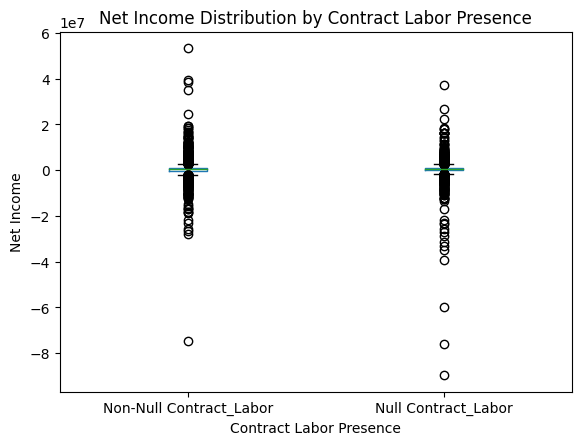

       Non-Null Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
count                                       1.001700e+04                           
mean                                        3.016720e+05                           
std                                         2.231667e+06                           
min                                        -7.481245e+07                           
25%                                        -3.132080e+05                           
50%                                         2.811280e+05                           
75%                                         9.251260e+05                           
max                                         5.337325e+07                           

       Null Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  
count                                       4.688000e+03                      
mean                                        2.404749e+05                      
std   

In [138]:
import matplotlib.pyplot as plt

# Create a new column for grouping
df_labor_vars["Contract_Labor_Group"] = df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_labor_vars.boxplot(column="Net_Income", by="Contract_Labor_Group", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Contract Labor Presence")
plt.suptitle("")
plt.xlabel("Contract Labor Presence")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Contract_Labor", "Null Contract_Labor"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df_labor_vars[df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].notnull()]
df_null = df_labor_vars[df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null Less:_Allowances_for_uncollectible_notes_and_accounts_receivable": df_non_null["Net_Income"].describe(),
    "Null Less:_Allowances_for_uncollectible_notes_and_accounts_receivable": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

It is not significant!

I will try to calculate it. 

In [139]:
import pandas as pd

# Load dataset (assuming df20_cleaned is already loaded)

# Define required columns
required_columns = [
    "Cash_on_hand_and_in_banks",
    "Accounts_Receivable",
    "Inventory",
    "Prepaid_expenses",
    "Other_current_assets",
    "Total_Current_Assets",
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"
]

# Ensure required columns exist
available_columns = [col for col in required_columns if col in df20_cleaned.columns]

# Compute Estimated Allowances
df20_cleaned["Estimated_Allowances_for_Uncollectible1"] = (
    df20_cleaned["Cash_on_hand_and_in_banks"].fillna(0) +
    df20_cleaned["Accounts_Receivable"].fillna(0) +
    df20_cleaned["Inventory"].fillna(0) +
    df20_cleaned["Prepaid_expenses"].fillna(0) +
    df20_cleaned["Other_current_assets"].fillna(0) -
    df20_cleaned["Total_Current_Assets"].fillna(0)
)

# Display results with the variables used
result_df = df20_cleaned[["Estimated_Allowances_for_Uncollectible1"] + available_columns]
result_df.head(40) # Show first few rows


,Estimated_Allowances_for_Uncollectible1,Cash_on_hand_and_in_banks,Accounts_Receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable
0,44434.0,15647.0,1223466.0,65289.0,24359.0,NaN,1284327.0,135613.0
1,0.0,-15807.0,55469.0,NaN,-318469.0,NaN,-278807.0,NaN
2,129907.0,-20979.0,1533839.0,NaN,50238.0,NaN,1433191.0,4500.0
3,82318.0,700.0,2372254.0,15035.0,35995.0,NaN,2341666.0,82713.0
4,0.0,281625.0,1923803.0,NaN,111574.0,NaN,2317002.0,NaN
5,29646.0,700.0,482793.0,7083.0,15568.0,NaN,476498.0,31155.0
6,0.0,53031.0,871765.0,NaN,NaN,NaN,924796.0,NaN
7,0.0,-5942.0,362850.0,NaN,432.0,-134753.0,222587.0,NaN
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By doing a calculation I get the Estimated_Allowances_for_Uncollectible not very accurately at all. I cannot do this in the df19 bc of missing variables inventory and some others. 

It is common practice to take a % from previous years and use it to calculate the estimates Allowances. I will attempt to do this for filled in values in df20 and df21 to put into df15-19.
For the NA ones I wil have to use the average.
I will do all this in the cleaning part of this. 

For now I will just make the columns in df15-19. The difference between the NAs and non NAs is not important in terms of Net_Income. But the overall significance of the variable is important in predicting Net_Income

In [140]:
df15['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan
df16['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan
df17['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan
df18['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan
df19['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan

In [221]:
df20_cleaned = df20_cleaned.drop(columns=["Beds_Match"])


# Salaries_wages_and_fees_payable

In df20 it is Salaries,_wages,_and_fees_payable and in df19 it is without hte commas. I will remove hte commas so it matches. 

In [142]:
df20_cleaned["Salaries_wages_and_fees_payable"] = df20_cleaned["Salaries,_wages,_and_fees_payable"]

In [143]:
df21_cleaned["Salaries_wages_and_fees_payable"] = df21_cleaned["Salaries,_wages,_and_fees_payable"]

In [144]:
df20_cleaned = df20_cleaned.drop(columns=["Salaries,_wages,_and_fees_payable"])
df21_cleaned = df21_cleaned.drop(columns=["Salaries,_wages,_and_fees_payable"])

## Leasehold_improvements

In [145]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Leasehold_improvements']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.05668566045155302
T-statistic: 111.88490659982084
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\2614836396.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Leasehold_improvements"] = df_selected["Leasehold_improvements"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

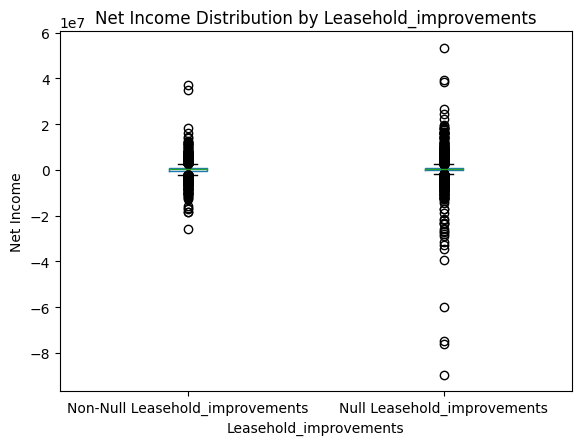

       Non-Null Leasehold_improvements  Null: Leasehold_improvements
count                     8.830000e+03                  5.875000e+03
mean                      3.205562e+05                  2.244568e+05
std                       1.698871e+06                  3.427490e+06
min                      -2.572346e+07                 -8.971656e+07
25%                      -2.843000e+05                 -2.596410e+05
50%                       3.203900e+05                  2.268440e+05
75%                       9.431370e+05                  8.266270e+05
max                       3.709429e+07                  5.337325e+07
T-Test p-value: 0.0243634813049533
Mann-Whitney U Test p-value: nan


In [146]:
selected_columns = [
    "Leasehold_improvements",
    "Total_current_liabilities", 
    "Total_Assets", 
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]


# Create a new column for grouping
df_selected["Leasehold_improvements"] = df_selected["Leasehold_improvements"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Leasehold_improvements", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Leasehold_improvements", "Null Leasehold_improvements"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Leasehold_improvements"].notnull()]
df_null = df20_cleaned[df20_cleaned["Leasehold_improvements"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null Leasehold_improvements": df_non_null["Net_Income"].describe(),
    "Null: Leasehold_improvements": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

There are no varaibles in df15-19 that are close to this variable. This variable wouldnt apply universally to the other years because this is imporvements made this year. 

The Variable is important according to Hypothesis testing. The Null will be handled later in cleaning. THe nulls are significant compared to the non Nulls when analyzing Net_Income. 

# Overhead_Non-Salary_Costs

I jsut need to change the name to match 

In [147]:
df20_cleaned['Overhead_Non_Salary_Costs'] = df20_cleaned["Overhead_Non-Salary_Costs"]
df21_cleaned['Overhead_Non_Salary_Costs'] = df21_cleaned["Overhead_Non-Salary_Costs"]

df20_cleaned = df20_cleaned.drop(columns=["Overhead_Non-Salary_Costs"])
df21_cleaned = df21_cleaned.drop(columns=["Overhead_Non-Salary_Costs"])


# Total_long_term_liabilities

We can calculate this.

In [148]:
liabilities_columns = [col for col in df20_cleaned.columns if "liabilities" in col.lower()]
df_liabilities = df20_cleaned[liabilities_columns]
df_liabilities

,Other_current_liabilities,Total_current_liabilities,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,Total_Liabilities_and_fund_balances
0,146013.0,1509159.0,NaN,8194774.0,9703933.0,14400312.0
1,5427.0,-257980.0,257.0,259.0,-257721.0,-278550.0
2,11931.0,245384.0,NaN,3287601.0,3532985.0,2817453.0
3,354342.0,937284.0,NaN,6423181.0,7360465.0,3176256.0
4,15092370.0,16471912.0,NaN,NaN,16471912.0,16961403.0
...,...,...,...,...,...,...
14944,69940.0,1695956.0,18820.0,18820.0,1714776.0,2519888.0
14945,3910631.0,4765995.0,4946666.0,4946666.0,9712661.0,6382624.0
14946,-150.0,116946.0,NaN,NaN,116946.0,256712.0
14947,348187.0,1224546.0,NaN,793600.0,2018146.0,1476332.0


It seems that we can do Total_long_term_liabilities =  Total_Liabiltieas - Total_current_liabilties

In [149]:
liabilities_columns = [col for col in df19.columns if "liabilities" in col.lower()]
df_liabilities = df19[liabilities_columns]
df_liabilities

,Other_current_liabilities,Total_current_liabilities,Total_liabilities
0,NaN,NaN,NaN
1,26837.0,94275.0,94275.0
2,-3353.0,237612.0,237612.0
3,NaN,NaN,NaN
4,101118.0,489058.0,4885852.0
...,...,...,...
15177,55205.0,1655963.0,3333399.0
15178,773118.0,6598103.0,8172906.0
15179,NaN,3460167.0,3460167.0
15180,-34927.0,415426.0,415426.0


In [150]:
df19["Total_long_term_liabilities"] = df19["Total_liabilities"] - df19["Total_current_liabilities"]


In [151]:
liabilities_columns = [col for col in df19.columns if "liabilities" in col.lower()]
df_liabilities = df19[liabilities_columns]
df_liabilities

,Other_current_liabilities,Total_current_liabilities,Total_liabilities,Total_long_term_liabilities
0,NaN,NaN,NaN,NaN
1,26837.0,94275.0,94275.0,0.0
2,-3353.0,237612.0,237612.0,0.0
3,NaN,NaN,NaN,NaN
4,101118.0,489058.0,4885852.0,4396794.0
...,...,...,...,...
15177,55205.0,1655963.0,3333399.0,1677436.0
15178,773118.0,6598103.0,8172906.0,1574803.0
15179,NaN,3460167.0,3460167.0,0.0
15180,-34927.0,415426.0,415426.0,0.0


Seems good. 

In [152]:
df18["Total_long_term_liabilities"] = df18["Total_liabilities"] - df18["Total_current_liabilities"]
df17["Total_long_term_liabilities"] = df17["Total_liabilities"] - df17["Total_current_liabilities"]
df16["Total_long_term_liabilities"] = df16["Total_liabilities"] - df16["Total_current_liabilities"]
df15["Total_long_term_liabilities"] = df15["Total_liabilities"] - df15["Total_current_liabilities"]


##  Investments

In [153]:
df15['Investments'] = np.nan
df16['Investments'] = np.nan
df17['Investments'] = np.nan
df18['Investments'] = np.nan
df19['Investments'] = np.nan

# Net_Income_from_service_to_patients

In [154]:
df15['Net_Income_from_service_to_patients'] = df15["Net_Income_from_patients"]
df16['Net_Income_from_service_to_patients'] = df16["Net_Income_from_patients"]
df17['Net_Income_from_service_to_patients'] = df17["Net_Income_from_patients"]
df18['Net_Income_from_service_to_patients'] = df18["Net_Income_from_patients"]
df19['Net_Income_from_service_to_patients'] = df19["Net_Income_from_patients"]

df15 = df15.drop(columns=["Net_Income_from_patients"])
df16 = df16.drop(columns=["Net_Income_from_patients"])
df17 = df17.drop(columns=["Net_Income_from_patients"])
df18 = df18.drop(columns=["Net_Income_from_patients"])
df19 = df19.drop(columns=["Net_Income_from_patients"])

# Wage-related_Costs_(core)

In [155]:
df15['Wage-related_Costs_(core)'] = df15["Wage_related_Costs_core"]
df16['Wage-related_Costs_(core)'] = df16["Wage_related_Costs_core"]
df17['Wage-related_Costs_(core)'] = df17["Wage_related_Costs_core"]
df18['Wage-related_Costs_(core)'] = df18["Wage_related_Costs_core"]
df19['Wage-related_Costs_(core)'] = df19["Wage_related_Costs_core"]

df15 = df15.drop(columns=["Wage_related_Costs_core"])
df16 = df16.drop(columns=["Wage_related_Costs_core"])
df17 = df17.drop(columns=["Wage_related_Costs_core"])
df18 = df18.drop(columns=["Wage_related_Costs_core"])
df19 = df19.drop(columns=["Wage_related_Costs_core"])

# Total_Salaries_(adjusted)

In [156]:
df15['Total_Salaries_(adjusted)'] = df15["Total_Salaries_adjusted"]
df16['Total_Salaries_(adjusted)'] = df16["Total_Salaries_adjusted"]
df17['Total_Salaries_(adjusted)'] = df17["Total_Salaries_adjusted"]
df18['Total_Salaries_(adjusted)'] = df18["Total_Salaries_adjusted"]
df19['Total_Salaries_(adjusted)'] = df19["Total_Salaries_adjusted"]

df15 = df15.drop(columns=["Total_Salaries_adjusted"])
df16 = df16.drop(columns=["Total_Salaries_adjusted"])
df17 = df17.drop(columns=["Total_Salaries_adjusted"])
df18 = df18.drop(columns=["Total_Salaries_adjusted"])
df19 = df19.drop(columns=["Total_Salaries_adjusted"])

# SNF_Average_Length_of_Stay_Total

In [157]:
df15['SNF_Average_Length_of_Stay_Total'] = df15["SNF_Average_Length_of_stay_Tot"]
df16['SNF_Average_Length_of_Stay_Total'] = df16["SNF_Average_Length_of_stay_Tot"]
df17['SNF_Average_Length_of_Stay_Total'] = df17["SNF_Average_Length_of_stay_Tot"]
df18['SNF_Average_Length_of_Stay_Total'] = df18["SNF_Average_Length_of_stay_Tot"]
df19['SNF_Average_Length_of_Stay_Total'] = df19["SNF_Average_Length_of_stay_Tot"]

df15 = df15.drop(columns=["SNF_Average_Length_of_stay_Tot"])
df16 = df16.drop(columns=["SNF_Average_Length_of_stay_Tot"])
df17 = df17.drop(columns=["SNF_Average_Length_of_stay_Tot"])
df18 = df18.drop(columns=["SNF_Average_Length_of_stay_Tot"])
df19 = df19.drop(columns=["SNF_Average_Length_of_stay_Tot"])

# Notes_Payable
this doesnt exist in df19. There is Accounts Payable in both. Notes payable is similar but typically larger and longer payable values

In [158]:
selected_columns = [
    "Notes_Payable",
    "Notes_and_Loans_Payable_(short_term)", 
    "Mortgage_payable", 
    "Other_long_term_liabilities", 
    "Total_long_term_liabilities", 
    "Total_liabilities", 
    "Accounts_payable", 
    "Payroll_taxes_payable", 
    "Total_current_liabilities", 
    "Total_Assets", 
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]
df_selected.sample(10)

,Notes_Payable,Notes_and_Loans_Payable_(short_term),Mortgage_payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,Accounts_payable,Payroll_taxes_payable,Total_current_liabilities,Total_Assets,Net_Income,Total_Income
10534,NaN,37301.0,NaN,-14114816.0,-14114816.0,-11251285.0,-944.0,351242.0,2863531.0,3295784.0,-276329.0,-276329.0
5369,NaN,NaN,212232.0,NaN,212232.0,2232367.0,857714.0,10610.0,2020135.0,14550143.0,713680.0,713680.0
9748,NaN,NaN,NaN,204490532.0,204490532.0,265399413.0,6261718.0,NaN,60908881.0,582712465.0,-882318.0,-882318.0
12624,NaN,NaN,NaN,NaN,NaN,2106620.0,1664563.0,NaN,2106620.0,620046.0,173132.0,173132.0
13845,NaN,NaN,NaN,NaN,NaN,374667.0,267236.0,NaN,374667.0,2391371.0,26890.0,29831.0
4134,1465586.0,NaN,NaN,NaN,1465586.0,2485264.0,702274.0,NaN,1019678.0,11516932.0,-370860.0,-294324.0
3282,NaN,NaN,NaN,NaN,NaN,598084.0,231279.0,105986.0,598084.0,11022012.0,853938.0,888163.0
557,NaN,NaN,NaN,NaN,NaN,1005539.0,434774.0,NaN,1005539.0,8870343.0,263247.0,402247.0
10039,NaN,NaN,NaN,NaN,NaN,222738.0,27214.0,NaN,222738.0,-3124049.0,170055.0,188783.0
2222,NaN,NaN,NaN,NaN,NaN,901568.0,-27447.0,40413.0,901568.0,4392282.0,1103988.0,1230129.0


Giving this to chat, I am able to derive this formula for getting Notes Payable. 
Notes Payable=Total Long-Term Liabilities−(Mortgage Payable+Other Long-Term Liabilities)

The only issue is mortgage payable is not in df19 either. 

I will do a deep dive into Notes payable real quick

In [159]:
df19_filtered = df19[df19["Provider_CCN"] == 415071]
df19_filtered
# scroll to Total_current_liabilities and Total Liabilities

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Fixed_equipment,Total_Charges,Contract_Labor,SNF_Number_of_Beds,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Total_long_term_liabilities,Investments,Net_Income_from_service_to_patients,Wage-related_Costs_(core),Total_Salaries_(adjusted),SNF_Average_Length_of_Stay_Total
1882,1258378,415071,SOUTH COUNTY NURSING AND REHABILITAT,740 OAK HILL ROAD,NORTH KINGSTON,RI,2852,WASHINGTON,39300.0,U,1/1/2019,12/31/2019,4,875274.0,446232.0,4389001.0,7450.0,-715063.0,15278023.0,1250700.0,15278023.0,9685202.0,5113022.0,980543.0,503692.0,10165001.0,120.0,-4854981.0,1295905.0,5698092.0,161.0,30.0,92.0,283.0,367.06,33.32,7009.0,26428.0,2266.0,35703.0,140.0,72.0,68.0,280.0,43800.0,205771.0,1251929.0,43800.0,1265013.0,7009.0,26428.0,2266.0,35703.0,140.0,72.0,68.0,280.0,12772605.0,503692.0,1251929.0,1560.0,3987110.0,1684662.0,1957631.0,4422248.0,-715063.0,1966992.0,-4854981.0,NaN,NaN,NaN,120.0,NaN,9361.0,NaN,479799.0,763846.0,3987110.0,127.51


In [160]:
df20_cleaned_filtered = df20_cleaned[df20_cleaned["Provider_CCN"] == 415071]
df20_cleaned_filtered


,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Beds_Match,Salaries_wages_and_fees_payable,Overhead_Non_Salary_Costs
9657,415071,SOUTH COUNTY NURSING AND REHABILITAT,740 OAK HILL ROAD,NORTH KINGSTON,RI,02852,WASHINGTON,39300.0,U,01/01/2020,06/30/2020,6.0,1018.0,11408.0,2301.0,14727.0,120.0,21840.0,26.0,102.0,54.0,182.0,39.15,111.84,80.92,26.0,15.0,49.0,90.0,1018.0,11408.0,2301.0,14727.0,120.0,21840.0,26.0,102.0,54.0,182.0,NaN,1948153.0,804581.0,511050.0,341271.0,1948153.0,1602704.0,4250.0,991129.0,674984.0,NaN,NaN,NaN,856895.0,700000.0,271877.0,4389001.0,73171.0,NaN,987712.0,4357434.0,NaN,-5253150.0,-5251982.0,-37653.0,378648.0,NaN,NaN,1164953.0,1750576.0,NaN,NaN,9361.0,9361.0,1759937.0,-1797590.0,-1797590.0,-37653.0,5408046.0,6775520.0,6775520.0,1864528.0,4910992.0,5997983.0,-1086991.0,4449.0,-1082542.0,-1082542.0,607079.0,3410.0,True,191388.0,4049830.0
14947,415071,SOUTH COUNTY NURSING & REHAB CENTER,740 OAK HILL ROAD,NORTH KINGSTOWN,RI,02852,WASHINGTON,39300.0,U,07/01/2020,12/31/2020,6.0,576.0,6957.0,2690.0,10223.0,120.0,22080.0,14.0,27.0,39.0,80.0,41.14,257.67,127.79,26.0,9.0,54.0,89.0,576.0,6957.0,2690.0,10223.0,120.0,22080.0,14.0,27.0,39.0,80.0,NaN,1408295.0,453329.0,363700.0,218453.0,1408295.0,255632.0,154802.0,766098.0,45011.0,NaN,416772.0,NaN,1331299.0,NaN,NaN,NaN,107517.0,42745.0,NaN,145033.0,NaN,NaN,NaN,1476332.0,95290.0,74483.0,500000.0,348187.0,1224546.0,NaN,793600.0,NaN,793600.0,2018146.0,-541814.0,-541814.0,1476332.0,3556151.0,4009480.0,4009480.0,1010345.0,2999135.0,3542544.0,-543409.0,1595.0,-541814.0,-541814.0,351597.0,NaN,True,206586.0,2134249.0


In [161]:
df21_cleaned_filtered = df21_cleaned[df21_cleaned["Provider_CCN"] == 415071]
df21_cleaned_filtered

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Salaries_wages_and_fees_payable,Overhead_Non_Salary_Costs
8427,415071,SOUTH COUNTY NURSING & REHAB CENTER,740 OAK HILL RD,NORTH KINGSTOWN,RI,02852,WASHINGTON,39300.0,U,01/01/2021,12/31/2021,6.0,2642.0,14641.0,7961.0,25244.0,120.0,43800.0,94.0,72.0,203.0,369.0,28.11,203.35,68.41,135.0,50.0,211.0,396.0,2642.0,14641.0,7961.0,25244.0,120.0,43800.0,94.0,72.0,203.0,369.0,NaN,3346879.0,1349411.0,1071082.0,496564.0,3346879.0,789611.0,189942.0,1281508.0,190408.0,NaN,154826.0,NaN,1910797.0,NaN,NaN,NaN,21690.0,87077.0,NaN,190359.0,NaN,NaN,NaN,2101156.0,433079.0,74483.0,430749.0,518838.0,1647471.0,NaN,NaN,14014.0,14014.0,1661485.0,439671.0,439671.0,2101156.0,9227389.0,10576800.0,10576800.0,2197547.0,8379253.0,8739238.0,-359985.0,1312100.0,952115.0,952115.0,1589223.0,1099.0,190322.0,5392359.0


I found an explanation that is valid.

356,661 difference from total liabilities 2020(2nd one) and 2021
422,925 difference from current liabilities 

So it seem that they paid off around 356,661 of the debt and then the most of the rest went to Total_current_liabilities and the rest from that went to Other_longterm_liabilities. 

This makes sense. 

So the company took out a long term loan then the next year they sold most of it off and the rest went to current liabilities and some stayed in other long term liabilities. 

Because.... Total_long_term_liabilties = other_long_term_liabilities + Notes_payable.... I think I will quickly look at the significance/correlation and drop the column.

In [162]:

df_selected_cleaned = df_selected
df_selected_cleaned.fillna(0, inplace=True)
df_selected_cleaned

C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\1596943463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_cleaned.fillna(0, inplace=True)


,Notes_Payable,Notes_and_Loans_Payable_(short_term),Mortgage_payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,Accounts_payable,Payroll_taxes_payable,Total_current_liabilities,Total_Assets,Net_Income,Total_Income
0,0.0,566616.0,8194774.0,0.0,8194774.0,9703933.0,493549.0,0.0,1509159.0,14400312.0,60384.0,60384.0
1,0.0,0.0,0.0,257.0,259.0,-257721.0,73933.0,-337340.0,-257980.0,-278550.0,-261181.0,-261181.0
2,515503.0,0.0,0.0,0.0,3287601.0,3532985.0,90834.0,0.0,245384.0,2817453.0,-191802.0,-191802.0
3,500000.0,0.0,5923181.0,0.0,6423181.0,7360465.0,463420.0,26575.0,937284.0,3176256.0,-36899.0,-36899.0
4,0.0,0.0,0.0,0.0,0.0,16471912.0,958326.0,-177.0,16471912.0,16961403.0,157671.0,157671.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14944,0.0,1118578.0,0.0,18820.0,18820.0,1714776.0,500847.0,0.0,1695956.0,2519888.0,545241.0,545241.0
14945,0.0,0.0,0.0,4946666.0,4946666.0,9712661.0,371095.0,0.0,4765995.0,6382624.0,-433682.0,-433682.0
14946,0.0,0.0,0.0,0.0,0.0,116946.0,117096.0,0.0,116946.0,256712.0,-511877.0,-511877.0
14947,793600.0,500000.0,0.0,0.0,793600.0,2018146.0,95290.0,74483.0,1224546.0,1476332.0,-541814.0,-541814.0


In [163]:


# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Notes_Payable']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Notes_Payable is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Notes_Payable is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: -0.010207837790998148
T-statistic: -634.8593675757543
P-value: 0.0
Reject the null hypothesis: Notes_Payable is significant in predicting Net_Income.


I took out Nulls and made them zero and still it is significant.

In [164]:
df_selected_cleaned.corr()

,Notes_Payable,Notes_and_Loans_Payable_(short_term),Mortgage_payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,Accounts_payable,Payroll_taxes_payable,Total_current_liabilities,Total_Assets,Net_Income,Total_Income
Notes_Payable,1.000000,0.034766,-0.012213,0.179070,0.455946,0.461962,0.017844,0.018875,0.277498,0.326186,-0.042432,0.014609
Notes_and_Loans_Payable_(short_term),0.034766,1.000000,0.051548,0.043520,0.063642,0.152751,0.019480,0.028767,0.221602,0.112130,-0.019952,0.098700
Mortgage_payable,-0.012213,0.051548,1.000000,0.179572,0.446746,0.484229,0.092071,0.247671,0.337341,0.393909,-0.076194,0.259356
Other_long_term_liabilities,0.179070,0.043520,0.179572,1.000000,0.870868,0.744284,0.102027,0.008261,0.243977,0.757104,-0.107061,0.200548
Total_long_term_liabilities,0.455946,0.063642,0.446746,0.870868,1.000000,0.892784,0.070265,0.088238,0.359164,0.825517,-0.132932,0.230683
Total_liabilities,0.461962,0.152751,0.484229,0.744284,0.892784,1.000000,0.265536,0.284245,0.741081,0.864453,-0.097533,0.233836
Accounts_payable,0.017844,0.019480,0.092071,0.102027,0.070265,0.265536,1.000000,0.018596,0.445390,0.100356,0.094348,0.146315
Payroll_taxes_payable,0.018875,0.028767,0.247671,0.008261,0.088238,0.284245,0.018596,1.000000,0.457361,0.149824,0.013226,0.001792
Total_current_liabilities,0.277498,0.221602,0.337341,0.243977,0.359164,0.741081,0.445390,0.457361,1.000000,0.560525,-0.003935,0.140625
Total_Assets,0.326186,0.112130,0.393909,0.757104,0.825517,0.864453,0.100356,0.149824,0.560525,1.000000,-0.025309,0.174072


In [165]:
df20_cleaned

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Beds_Match,Salaries_wages_and_fees_payable,Overhead_Non_Salary_Costs
0,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,10/01/2019,10/31/2019,6.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,30.63,206.00,51.25,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,NaN,371857.0,299558.0,195203.0,79053.0,371857.0,136024.0,15647.0,1223466.0,135613.0,65289.0,24359.0,NaN,1284327.0,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0,NaN,13080009.0,13080009.0,14400312.0,493549.0,NaN,566616.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,4696379.0,4696379.0,14400312.0,1490851.0,1795483.0,1795483.0,712087.0,1083396.0,1023062.0,60334.0,50.0,60384.0,60384.0,476754.0,4814.0,True,259658.0,651205.0
1,495268,MARY WASHINGTON HEALTH CENTER,2400 MCKINNEY BLVD,COLONIAL BEACH,VA,22443,WESTMORELAND,99949.0,R,11/01/2019,12/29/2019,4.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,31.00,32.50,130.92,16.0,9.0,4.0,29.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,NaN,369008.0,254234.0,210445.0,60217.0,369008.0,156009.0,-15807.0,55469.0,NaN,NaN,-318469.0,NaN,-278807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.0,257.0,-278550.0,73933.0,-337340.0,NaN,5427.0,-257980.0,NaN,NaN,257.0,259.0,-257721.0,-20829.0,-20829.0,-278550.0,1032618.0,1286852.0,1286852.0,472648.0,814204.0,1076191.0,-261987.0,806.0,-261181.0,-261181.0,101663.0,NaN,True,NaN,707183.0
2,295107,ADVANCED HEALTH CARE OF PARADISE,3455 PECOS-MCLEOD INTERCONNECT,LAS VEGAS,NV,89121,CLARK,29820.0,U,10/04/2019,12/31/2019,4.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,29.38,NaN,43.67,133.0,NaN,5.0,138.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,NaN,713984.0,791188.0,492172.0,83667.0,713984.0,17352.0,-20979.0,1533839.0,4500.0,NaN,50238.0,NaN,1433191.0,NaN,NaN,NaN,NaN,NaN,79549.0,99168.0,NaN,1285094.0,1285094.0,2817453.0,90834.0,NaN,NaN,11931.0,245384.0,NaN,515503.0,NaN,3287601.0,3532985.0,-715532.0,-715532.0,2817453.0,1116500.0,1906805.0,1907688.0,364289.0,1543399.0,1735321.0,-191922.0,120.0,-191802.0,-191802.

C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\1336549254.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Notes_Payable"] = df_selected["Notes_Payable"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

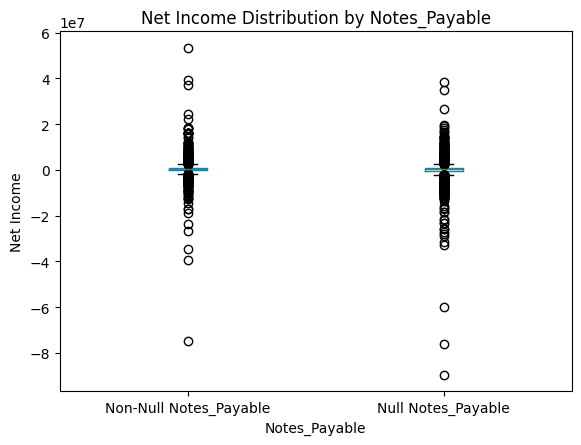

       Non-Null Notes_Payable  Null: Notes_Payable
count            4.201000e+03         1.050400e+04
mean             3.769733e+05         2.442432e+05
std              2.824273e+06         2.409283e+06
min             -7.481245e+07        -8.971656e+07
25%             -2.334440e+05        -2.947408e+05
50%              3.136950e+05         2.647455e+05
75%              9.209210e+05         8.986892e+05
max              5.337325e+07         3.846258e+07
T-Test p-value: 0.004130310155521638
Mann-Whitney U Test p-value: nan


In [166]:
selected_columns = [
    "Notes_Payable",
    "Total_current_liabilities", 
    "Total_Assets", 
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]

# Create a new column for grouping
df_selected["Notes_Payable"] = df_selected["Notes_Payable"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Notes_Payable", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Notes_Payable")
plt.suptitle("")
plt.xlabel("Notes_Payable")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Notes_Payable", "Null Notes_Payable"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Notes_Payable"].notnull()]
df_null = df20_cleaned[df20_cleaned["Notes_Payable"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null Notes_Payable": df_non_null["Net_Income"].describe(),
    "Null: Notes_Payable": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

It is significant as a whole to Net_Income. the null to not null aparently doesnt matter. But the variable is very similar to Total_Liabilities and Total_liabilities has better correlation with the target. 

I will keep Notes_Payable in the code for the append but will probably take it out later as I cant necessarily calculate it accurately and Total_Liabilties takes it place. 

In [167]:
df15['Notes_Payable'] = np.nan
df16['Notes_Payable'] = np.nan
df17['Notes_Payable'] = np.nan
df18['Notes_Payable'] = np.nan
df19['Notes_Payable'] = np.nan

# 'Other_long_term_liabilities' 
This is the same story as Notes_Payable

In [168]:
df15['Other_long_term_liabilities'] = np.nan
df16['Other_long_term_liabilities'] = np.nan
df17['Other_long_term_liabilities'] = np.nan
df18['Other_long_term_liabilities'] = np.nan
df19['Other_long_term_liabilities'] = np.nan

## Payroll_taxes_payable

It is not in df19 and it will be part of total_liabiltities. 

In [169]:


# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Payroll_taxes_payable']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.043924077945947444
T-statistic: 197.72155576727206
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


In [170]:
df20_cleaned

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Beds_Match,Salaries_wages_and_fees_payable,Overhead_Non_Salary_Costs
0,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,10/01/2019,10/31/2019,6.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,30.63,206.00,51.25,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,NaN,371857.0,299558.0,195203.0,79053.0,371857.0,136024.0,15647.0,1223466.0,135613.0,65289.0,24359.0,NaN,1284327.0,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0,NaN,13080009.0,13080009.0,14400312.0,493549.0,NaN,566616.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,4696379.0,4696379.0,14400312.0,1490851.0,1795483.0,1795483.0,712087.0,1083396.0,1023062.0,60334.0,50.0,60384.0,60384.0,476754.0,4814.0,True,259658.0,651205.0
1,495268,MARY WASHINGTON HEALTH CENTER,2400 MCKINNEY BLVD,COLONIAL BEACH,VA,22443,WESTMORELAND,99949.0,R,11/01/2019,12/29/2019,4.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,31.00,32.50,130.92,16.0,9.0,4.0,29.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,NaN,369008.0,254234.0,210445.0,60217.0,369008.0,156009.0,-15807.0,55469.0,NaN,NaN,-318469.0,NaN,-278807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.0,257.0,-278550.0,73933.0,-337340.0,NaN,5427.0,-257980.0,NaN,NaN,257.0,259.0,-257721.0,-20829.0,-20829.0,-278550.0,1032618.0,1286852.0,1286852.0,472648.0,814204.0,1076191.0,-261987.0,806.0,-261181.0,-261181.0,101663.0,NaN,True,NaN,707183.0
2,295107,ADVANCED HEALTH CARE OF PARADISE,3455 PECOS-MCLEOD INTERCONNECT,LAS VEGAS,NV,89121,CLARK,29820.0,U,10/04/2019,12/31/2019,4.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,29.38,NaN,43.67,133.0,NaN,5.0,138.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,NaN,713984.0,791188.0,492172.0,83667.0,713984.0,17352.0,-20979.0,1533839.0,4500.0,NaN,50238.0,NaN,1433191.0,NaN,NaN,NaN,NaN,NaN,79549.0,99168.0,NaN,1285094.0,1285094.0,2817453.0,90834.0,NaN,NaN,11931.0,245384.0,NaN,515503.0,NaN,3287601.0,3532985.0,-715532.0,-715532.0,2817453.0,1116500.0,1906805.0,1907688.0,364289.0,1543399.0,1735321.0,-191922.0,120.0,-191802.0,-191802.

In [171]:
df_selected_cleaned.corr()

,Notes_Payable,Notes_and_Loans_Payable_(short_term),Mortgage_payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,Accounts_payable,Payroll_taxes_payable,Total_current_liabilities,Total_Assets,Net_Income,Total_Income
Notes_Payable,1.000000,0.034766,-0.012213,0.179070,0.455946,0.461962,0.017844,0.018875,0.277498,0.326186,-0.042432,0.014609
Notes_and_Loans_Payable_(short_term),0.034766,1.000000,0.051548,0.043520,0.063642,0.152751,0.019480,0.028767,0.221602,0.112130,-0.019952,0.098700
Mortgage_payable,-0.012213,0.051548,1.000000,0.179572,0.446746,0.484229,0.092071,0.247671,0.337341,0.393909,-0.076194,0.259356
Other_long_term_liabilities,0.179070,0.043520,0.179572,1.000000,0.870868,0.744284,0.102027,0.008261,0.243977,0.757104,-0.107061,0.200548
Total_long_term_liabilities,0.455946,0.063642,0.446746,0.870868,1.000000,0.892784,0.070265,0.088238,0.359164,0.825517,-0.132932,0.230683
Total_liabilities,0.461962,0.152751,0.484229,0.744284,0.892784,1.000000,0.265536,0.284245,0.741081,0.864453,-0.097533,0.233836
Accounts_payable,0.017844,0.019480,0.092071,0.102027,0.070265,0.265536,1.000000,0.018596,0.445390,0.100356,0.094348,0.146315
Payroll_taxes_payable,0.018875,0.028767,0.247671,0.008261,0.088238,0.284245,0.018596,1.000000,0.457361,0.149824,0.013226,0.001792
Total_current_liabilities,0.277498,0.221602,0.337341,0.243977,0.359164,0.741081,0.445390,0.457361,1.000000,0.560525,-0.003935,0.140625
Total_Assets,0.326186,0.112130,0.393909,0.757104,0.825517,0.864453,0.100356,0.149824,0.560525,1.000000,-0.025309,0.174072


Total Liabilities has better correlation with Net_Income then Payroll_taxes_payable does with Net_Income. 

I will include it in the merge then probably take out. 

In [172]:
df15['Payroll_taxes_payable'] = np.nan
df16['Payroll_taxes_payable'] = np.nan
df17['Payroll_taxes_payable'] = np.nan
df18['Payroll_taxes_payable'] = np.nan
df19['Payroll_taxes_payable'] = np.nan

# Land_improvements

There are no columns like this in df19

In [173]:
selected_columns = [
    "Land_improvements",
    "Total_current_liabilities", 
    "Total_Assets", 
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]
df_selected.sample(10)

,Land_improvements,Total_current_liabilities,Total_Assets,Net_Income,Total_Income
7364,NaN,931450.0,2878056.0,67032.0,67032.0
7298,10088.0,2212884.0,3379343.0,-634721.0,-634721.0
12546,NaN,3109727.0,1308717.0,-1684305.0,-1641633.0
1957,NaN,651260.0,755283.0,30910.0,30903.0
10122,NaN,1359172.0,2060446.0,701274.0,701274.0
7229,58590.0,307392.0,3435161.0,560544.0,560544.0
10286,NaN,5254013.0,6107145.0,357036.0,357036.0
7360,657117.0,2901217.0,17059730.0,1610811.0,1610811.0
3493,NaN,1065933.0,1820563.0,768584.0,768584.0
11002,522557.0,1657899.0,2713281.0,1016470.0,1044354.0


In [174]:
df_selected = df_selected.dropna()

In [175]:


# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['Land_improvements']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.015304662253540047
T-statistic: 66.97274503112008
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


both null are signficant 

C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\3256580522.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Land_improvements"] = df_selected["Land_improvements"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

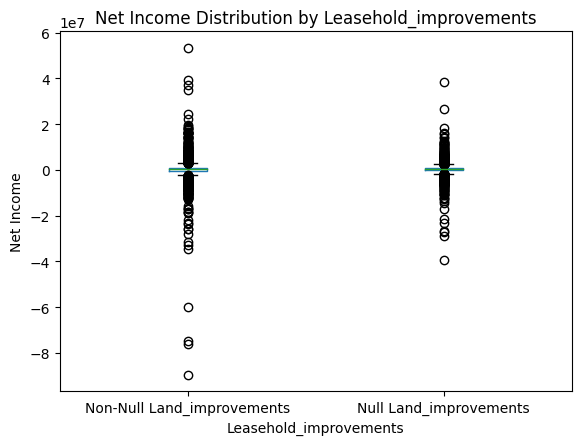

       Non-Null: Land_improvements  Null: Land_improvements
count                 4.887000e+03             9.818000e+03
mean                  2.015102e+05             3.223075e+05
std                   3.693627e+06             1.683216e+06
min                  -8.971656e+07            -3.936368e+07
25%                  -4.163905e+05            -2.163722e+05
50%                   2.260500e+05             2.964695e+05
75%                   9.336630e+05             8.945398e+05
max                   5.337325e+07             3.846258e+07
T-Test p-value: 0.006494148040144279
Mann-Whitney U Test p-value: nan


In [176]:
selected_columns = [
    "Land_improvements",
    "Total_current_liabilities", 
    "Total_Assets", 
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]
# Create a new column for grouping
df_selected["Land_improvements"] = df_selected["Land_improvements"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Land_improvements", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Land_improvements", "Null Land_improvements"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Land_improvements"].notnull()]
df_null = df20_cleaned[df20_cleaned["Land_improvements"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null: Land_improvements": df_non_null["Net_Income"].describe(),
    "Null: Land_improvements": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

In [177]:
df15['Land_improvements'] = np.nan
df16['Land_improvements'] = np.nan
df17['Land_improvements'] = np.nan
df18['Land_improvements'] = np.nan
df19['Land_improvements'] = np.nan

# Allowable_Bad_Debts

In [178]:
df20_cleaned

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Beds_Match,Salaries_wages_and_fees_payable,Overhead_Non_Salary_Costs
0,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,10/01/2019,10/31/2019,6.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,30.63,206.00,51.25,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,NaN,371857.0,299558.0,195203.0,79053.0,371857.0,136024.0,15647.0,1223466.0,135613.0,65289.0,24359.0,NaN,1284327.0,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0,NaN,13080009.0,13080009.0,14400312.0,493549.0,NaN,566616.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,4696379.0,4696379.0,14400312.0,1490851.0,1795483.0,1795483.0,712087.0,1083396.0,1023062.0,60334.0,50.0,60384.0,60384.0,476754.0,4814.0,True,259658.0,651205.0
1,495268,MARY WASHINGTON HEALTH CENTER,2400 MCKINNEY BLVD,COLONIAL BEACH,VA,22443,WESTMORELAND,99949.0,R,11/01/2019,12/29/2019,4.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,31.00,32.50,130.92,16.0,9.0,4.0,29.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,NaN,369008.0,254234.0,210445.0,60217.0,369008.0,156009.0,-15807.0,55469.0,NaN,NaN,-318469.0,NaN,-278807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.0,257.0,-278550.0,73933.0,-337340.0,NaN,5427.0,-257980.0,NaN,NaN,257.0,259.0,-257721.0,-20829.0,-20829.0,-278550.0,1032618.0,1286852.0,1286852.0,472648.0,814204.0,1076191.0,-261987.0,806.0,-261181.0,-261181.0,101663.0,NaN,True,NaN,707183.0
2,295107,ADVANCED HEALTH CARE OF PARADISE,3455 PECOS-MCLEOD INTERCONNECT,LAS VEGAS,NV,89121,CLARK,29820.0,U,10/04/2019,12/31/2019,4.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,29.38,NaN,43.67,133.0,NaN,5.0,138.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,NaN,713984.0,791188.0,492172.0,83667.0,713984.0,17352.0,-20979.0,1533839.0,4500.0,NaN,50238.0,NaN,1433191.0,NaN,NaN,NaN,NaN,NaN,79549.0,99168.0,NaN,1285094.0,1285094.0,2817453.0,90834.0,NaN,NaN,11931.0,245384.0,NaN,515503.0,NaN,3287601.0,3532985.0,-715532.0,-715532.0,2817453.0,1116500.0,1906805.0,1907688.0,364289.0,1543399.0,1735321.0,-191922.0,120.0,-191802.0,-191802.

In [179]:
selected_columns = [
    "Provider_CCN",
    "Allowable_Bad_Debts", 
    "Net_Patient_Revenue", 
    "Less_Contractual_Allowance_and_discounts_on_patients'_accounts",
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable",
    "Accounts_Receivable",
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]
df_selected.sample(10)

,Provider_CCN,Allowable_Bad_Debts,Net_Patient_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Accounts_Receivable,Net_Income,Total_Income
8417,365638,198448.0,8799986.0,1225868.0,63156.0,967650.0,823210.0,823210.0
290,375461,NaN,2741642.0,142297.0,NaN,661872.0,294261.0,294261.0
11828,105428,595959.0,9689213.0,1063469.0,410000.0,1187968.0,-2032844.0,-2032844.0
2399,175154,44519.0,7808922.0,2304784.0,NaN,547179.0,445868.0,445868.0
2199,295102,17996.0,9483634.0,2646171.0,65811.0,1117060.0,474693.0,474693.0
1016,675975,4604.0,6117559.0,-447863.0,166105.0,527131.0,95044.0,95044.0
11510,245516,50806.0,6636150.0,198764.0,56173.0,615846.0,550500.0,550500.0
364,45470,NaN,801440.0,56721.0,11654.0,277918.0,-94663.0,-94663.0
7465,455538,4361.0,6433638.0,820461.0,551344.0,1374109.0,588301.0,588302.0
9494,555479,12202.0,10922923.0,-1253411.0,NaN,2391781.0,2188992.0,2188992.0


In [180]:
selected_columns = [
    "Provider_CCN",
    "Allowable_Bad_Debts", 
    "Net_Patient_Revenue", 
    "Less_Contractual_Allowance_and_discounts_on_patients'_accounts",
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable",
    "Accounts_Receivable",
    "Net_Income", 
    "Total_Income"
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)

,Provider_CCN,Allowable_Bad_Debts,Net_Patient_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Accounts_Receivable,Net_Income,Total_Income
10768,265439,260421.0,12868618.0,7741433.0,535533.0,1976053.0,-1701825.0,-1701825.0
12593,185384,147670.0,6345824.0,338036.0,16382.0,2119746.0,1551417.0,1551417.0
7868,555658,7044.0,8269495.0,-1623865.0,133833.0,1023942.0,-827288.0,-749518.0
7936,145839,229893.0,4238585.0,NaN,NaN,739830.0,993920.0,993920.0
796,35231,NaN,10238694.0,2690954.0,132434.0,820551.0,-1611517.0,-1611517.0
11959,355090,NaN,10511661.0,966813.0,56369.0,976629.0,975578.0,989291.0
11765,205129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5513,555780,14669.0,7179684.0,297792.0,NaN,1399063.0,413387.0,413387.0
10415,245599,2968.0,4251480.0,39151.0,NaN,294483.0,-9778.0,-3891.0
14465,395745,132799.0,14233621.0,16075518.0,355882.0,2144777.0,-4686640.0,-4686640.0


In [181]:
selected_columns = [
    "Allowable_Bad_Debts", 
    "Net_Income", 
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)

,Allowable_Bad_Debts,Net_Income
6170,NaN,9932443.0
6814,NaN,-1894780.0
5060,283696.0,1642299.0
6107,NaN,-3381336.0
10616,43834.0,-136132.0
559,5507.0,477855.0
11664,127405.0,-2184506.0
13292,42096.0,2574565.0
8669,22075.0,-272843.0
9993,909.0,318972.0


In [182]:
df_selected = df_selected.dropna()

In [183]:


# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['Allowable_Bad_Debts']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 1.3695129697491397
T-statistic: 1035.108421382879
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\1942745973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Allowable_Bad_Debts"] = df_selected["Allowable_Bad_Debts"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

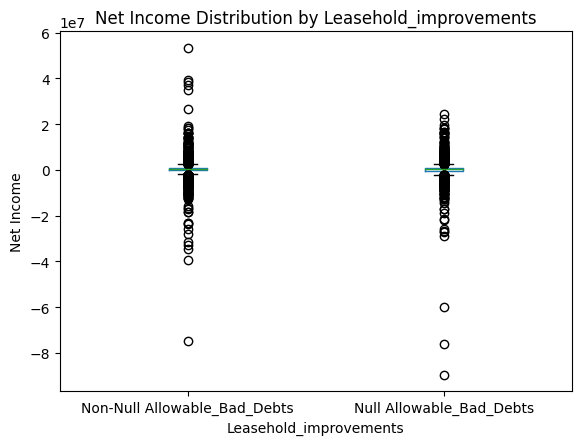

       Non-Null: Allowable_Bad_Debts  Null: Allowable_Bad_Debts
count                   1.091900e+04               3.786000e+03
mean                    3.240370e+05               1.613934e+05
std                     2.193008e+06               3.328683e+06
min                    -7.481245e+07              -8.971656e+07
25%                    -2.508335e+05              -3.498230e+05
50%                     3.175250e+05               1.737245e+05
75%                     9.224845e+05               8.258105e+05
max                     5.337325e+07               2.456536e+07
T-Test p-value: 0.0006695221649719312
Mann-Whitney U Test p-value: nan


In [184]:

df_selected = df20_cleaned[selected_columns]
# Create a new column for grouping
df_selected["Allowable_Bad_Debts"] = df_selected["Allowable_Bad_Debts"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Allowable_Bad_Debts", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Allowable_Bad_Debts", "Null Allowable_Bad_Debts"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Allowable_Bad_Debts"].notnull()]
df_null = df20_cleaned[df20_cleaned["Allowable_Bad_Debts"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null: Allowable_Bad_Debts": df_non_null["Net_Income"].describe(),
    "Null: Allowable_Bad_Debts": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

In [185]:
df15['Allowable_Bad_Debts'] = np.nan
df16['Allowable_Bad_Debts'] = np.nan
df17['Allowable_Bad_Debts'] = np.nan
df18['Allowable_Bad_Debts'] = np.nan
df19['Allowable_Bad_Debts'] = np.nan

# SNF_bed_Days_Available

In [186]:
df15['SNF_bed_Days_Available'] = df15["SNF_bed_Days_Available"]
df16['SNF_bed_Days_Available'] = df16["SNF_bed_Days_Available"]
df17['SNF_bed_Days_Available'] = df17["SNF_bed_Days_Available"]
df18['SNF_bed_Days_Available'] = df18["SNF_bed_Days_Available"]
df19['SNF_bed_Days_Available'] = df19["SNF_bed_Days_Available"]

df15 = df15.drop(columns=["SNF_bed_Days_Available"])
df16 = df16.drop(columns=["SNF_bed_Days_Available"])
df17 = df17.drop(columns=["SNF_bed_Days_Available"])
df18 = df18.drop(columns=["SNF_bed_Days_Available"])
df19 = df19.drop(columns=["SNF_bed_Days_Available"])

# SNF_Average_Length_of_Stay_Title_XVIII

In [187]:
df15['SNF_Average_Length_of_Stay_Title_XVIII'] = df15["SNF_Average_Length_stay_XVIII"]
df16['SNF_Average_Length_of_Stay_Title_XVIII'] = df16["SNF_Average_Length_stay_XVIII"]
df17['SNF_Average_Length_of_Stay_Title_XVIII'] = df17["SNF_Average_Length_stay_XVIII"]
df18['SNF_Average_Length_of_Stay_Title_XVIII'] = df18["SNF_Average_Length_stay_XVIII"]
df19['SNF_Average_Length_of_Stay_Title_XVIII'] = df19["SNF_Average_Length_stay_XVIII"]

df15 = df15.drop(columns=["SNF_Average_Length_stay_XVIII"])
df16 = df16.drop(columns=["SNF_Average_Length_stay_XVIII"])
df17 = df17.drop(columns=["SNF_Average_Length_stay_XVIII"])
df18 = df18.drop(columns=["SNF_Average_Length_stay_XVIII"])
df19 = df19.drop(columns=["SNF_Average_Length_stay_XVIII"])

# Total_General_Inpatient_Care_Services_Revenue

In [188]:
df15['Total_General_Inpatient_Care_Services_Revenue'] = df15["Total_General_Inpatient_Revenue"]
df16['Total_General_Inpatient_Care_Services_Revenue'] = df16["Total_General_Inpatient_Revenue"]
df17['Total_General_Inpatient_Care_Services_Revenue'] = df17["Total_General_Inpatient_Revenue"]
df18['Total_General_Inpatient_Care_Services_Revenue'] = df18["Total_General_Inpatient_Revenue"]
df19['Total_General_Inpatient_Care_Services_Revenue'] = df19["Total_General_Inpatient_Revenue"]

df15 = df15.drop(columns=["Total_General_Inpatient_Revenue"])
df16 = df16.drop(columns=["Total_General_Inpatient_Revenue"])
df17 = df17.drop(columns=["Total_General_Inpatient_Revenue"])
df18 = df18.drop(columns=["Total_General_Inpatient_Revenue"])
df19 = df19.drop(columns=["Total_General_Inpatient_Revenue"])

# Total_Liabilities_and_fund_balances

In [189]:
df15['Total_Liabilities_and_fund_balances'] = df15["Total_Liab_and_fund_balances"]
df16['Total_Liabilities_and_fund_balances'] = df16["Total_Liab_and_fund_balances"]
df17['Total_Liabilities_and_fund_balances'] = df17["Total_Liab_and_fund_balances"]
df18['Total_Liabilities_and_fund_balances'] = df18["Total_Liab_and_fund_balances"]
df19['Total_Liabilities_and_fund_balances'] = df19["Total_Liab_and_fund_balances"]

df15 = df15.drop(columns=["Total_Liab_and_fund_balances"])
df16 = df16.drop(columns=["Total_Liab_and_fund_balances"])
df17 = df17.drop(columns=["Total_Liab_and_fund_balances"])
df18 = df18.drop(columns=["Total_Liab_and_fund_balances"])
df19 = df19.drop(columns=["Total_Liab_and_fund_balances"])

# SNF_Average_Length_of_Stay_Title_XIX

In [190]:
df15['SNF_Average_Length_of_Stay_Title_XIX'] = df15["SNF_Average_Length_stay_XIX"]
df16['SNF_Average_Length_of_Stay_Title_XIX'] = df16["SNF_Average_Length_stay_XIX"]
df17['SNF_Average_Length_of_Stay_Title_XIX'] = df17["SNF_Average_Length_stay_XIX"]
df18['SNF_Average_Length_of_Stay_Title_XIX'] = df18["SNF_Average_Length_stay_XIX"]
df19['SNF_Average_Length_of_Stay_Title_XIX'] = df19["SNF_Average_Length_stay_XIX"]

df15 = df15.drop(columns=["SNF_Average_Length_stay_XIX"])
df16 = df16.drop(columns=["SNF_Average_Length_stay_XIX"])
df17 = df17.drop(columns=["SNF_Average_Length_stay_XIX"])
df18 = df18.drop(columns=["SNF_Average_Length_stay_XIX"])
df19 = df19.drop(columns=["SNF_Average_Length_stay_XIX"])

# Other_current_assets

In [197]:
selected_columns = [
    "Other_current_assets", 
    "Net_Income", 
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)
df_selected = df_selected.dropna()
# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['Other_current_assets']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.035533273635992256
T-statistic: 163.38421061096497
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\2615514057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Other_current_assets"] = df_selected["Other_current_assets"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

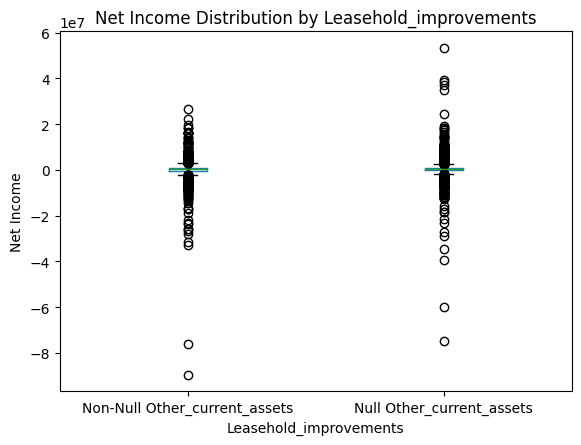

       Non-Null: Other_current_assets  Null: Other_current_assets
count                    4.479000e+03                1.022600e+04
mean                     2.788673e+05                2.836054e+05
std                      3.072371e+06                2.260545e+06
min                     -8.971656e+07               -7.481245e+07
25%                     -2.929480e+05               -2.672508e+05
50%                      2.874540e+05                2.752360e+05
75%                      9.540395e+05                8.816072e+05
max                      2.672461e+07                5.337325e+07
T-Test p-value: 0.9169385507951004
Mann-Whitney U Test p-value: nan


In [198]:

df_selected = df20_cleaned[selected_columns]
# Create a new column for grouping
df_selected["Other_current_assets"] = df_selected["Other_current_assets"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Other_current_assets", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Other_current_assets", "Null Other_current_assets"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Other_current_assets"].notnull()]
df_null = df20_cleaned[df20_cleaned["Other_current_assets"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null: Other_current_assets": df_non_null["Net_Income"].describe(),
    "Null: Other_current_assets": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

I will keep it in the master merge set for now but will probably take it out later bc it is similar to Current_Assets

In [199]:
df15['Other_current_assets'] = np.nan
df16['Other_current_assets'] = np.nan
df17['Other_current_assets'] = np.nan
df18['Other_current_assets'] = np.nan
df19['Other_current_assets'] = np.nan

# Total_Current_Assets

In [201]:
df15['Total_Current_Assets'] = df15["Total_current_assets"]
df16['Total_Current_Assets'] = df16["Total_current_assets"]
df17['Total_Current_Assets'] = df17["Total_current_assets"]
df18['Total_Current_Assets'] = df18["Total_current_assets"]
df19['Total_Current_Assets'] = df19["Total_current_assets"]

df15 = df15.drop(columns=["Total_current_assets"])
df16 = df16.drop(columns=["Total_current_assets"])
df17 = df17.drop(columns=["Total_current_assets"])
df18 = df18.drop(columns=["Total_current_assets"])
df19 = df19.drop(columns=["Total_current_assets"])

# Less_discounts_on_patients

In [203]:
df20_cleaned['Less_discounts_on_patients'] = df20_cleaned["Less_Contractual_Allowance_and_discounts_on_patients'_accounts"]
df21_cleaned['Less_discounts_on_patients'] = df21_cleaned["Less_Contractual_Allowance_and_discounts_on_patients'_accounts"]

df20_cleaned = df20_cleaned.drop(columns=["Less_Contractual_Allowance_and_discounts_on_patients'_accounts"])
df21_cleaned = df21_cleaned.drop(columns=["Less_Contractual_Allowance_and_discounts_on_patients'_accounts"])


# Total_Other_Income

In [205]:
df20_cleaned.sample(4)

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Beds_Match,Salaries_wages_and_fees_payable,Overhead_Non_Salary_Costs,Less_discounts_on_patients
12023,235109,HEARTLAND-GEORGIAN EAST OF GROSSE PO,21401 MACK AVENUE,GROSS POINT,MI,48236,WAYNE,19804.0,U,01/01/2020,12/31/2020,2.0,4826.0,3856.0,8884.0,17566.0,80.0,29280.0,264.0,55.0,604.0,923.0,18.28,70.11,19.03,291.0,19.0,577.0,887.0,4826.0,3856.0,8884.0,17566.0,80.0,29280.0,264.0,55.0,604.0,923.0,NaN,4630237.0,4493196.0,2375019.0,893068.0,4630237.0,138344.0,400.0,1143419.0,274034.0,NaN,NaN,NaN,918463.0,NaN,NaN,NaN,174982.0,NaN,226455.0,278733.0,NaN,-831841.0,-831841.0,365355.0,81591.0,1967.0,NaN,218883.0,623198.0,NaN,NaN,NaN,NaN,623198.0,-257843.0,-257843.0,365355.0,7519669.0,12012865.0,12012865.0,7463923.0,9296051.0,-1832128.0,777771.0,-1054357.0,-1058425.0,2537877.0,43828.0,True,320757.0,4665814.0,4548942.0
12469,215113,RAVENWOOD NURSING CARE CENTER,1183 LUTHER DRIVE,HAGERSTOWN,MD,21740,WASHINGTON,25180.0,U,01/01/2020,12/31/2020,1.0,2406.0,15862.0,6428.0,24696.0,80.0,29280.0,109.0,19.0,77.0,205.0,22.07,834.84,120.47,100.0,NaN,58.0,158.0,2406.0,15862.0,6428.0,24696.0,80.0,29280.0,109.0,19.0,77.0,205.0,NaN,3256765.0,3306314.0,1350544.0,668706.0,3256765.0,900085.0,27059.0,1045642.0,NaN,2805.0,10822.0,NaN,1086328.0,NaN,NaN,2602847.0,NaN,NaN,NaN,2602847.0,NaN,4044738.0,4044738.0,7733913.0,24557.0,NaN,NaN,595878.0,620435.0,NaN,NaN,3044720.0,3044720.0,3665155.0,4068758.0,4068758.0,7733913.0,7882229.0,11586212.0,11586212.0,7806278.0,8299125.0,-492847.0,84727.0,-408120.0,-408120.0,1353662.0,55631.0,True,NaN,5042360.0,3779934.0
13243,676437,ACCEL AT COLLEGE STATION,1500 MEDICAL AVENUE,COLLEGE STATION,TX,77845,BRAZOS,17780.0,U,01/01/2020,12/31/2020,5.0,5131.0,18873.0,7631.0,31635.0,116.0,42456.0,126.0,35.0,151.0,312.0,40.72,539.23,101.39,151.0,17.0,166.0,334.0,5131.0,18873.0,7631.0,31635.0,116.0,42456.0,126.0,35.0,151.0,312.0,NaN,3998304.0,4285139.0,2005552.0,387255.0,3998304.0,1079803.0,93310.0,819596.0,NaN,NaN,138978.0,NaN,1051884.0,NaN,NaN,NaN,12100.0,NaN,59507.0,55511.0,NaN,NaN,413267.0,1520662.0,1906706.0,32942.0,NaN,NaN,2738157.0,NaN,NaN,183619.0,183619.0,2921776.0,-1401114.0,-1401114.0,1520662.0,836653

There are a lot of negative Total_Income while Total_Other_Income is positive

In [213]:
selected_columns = [
    "Net_Income_from_service_to_patients",
    "Total_Other_Income", 
    "Net_Patient_Revenue", 
    "Total_Income",
    "Gross_Revenue",
    "Inpatient_Revenue",
    "Accounts_Receivable",
    "Net_Income"
]

df_selected = df20_cleaned[selected_columns]
df_selected.sample(10)

,Net_Income_from_service_to_patients,Total_Other_Income,Net_Patient_Revenue,Total_Income,Gross_Revenue,Inpatient_Revenue,Accounts_Receivable,Net_Income
13120,-617405.0,1274268.0,5497368.0,656863.0,6215435.0,6215435.0,559475.0,655457.0
7029,1008595.0,9032.0,9286337.0,1017627.0,8018393.0,8018393.0,1477402.0,1017627.0
11609,1151122.0,54350.0,11408976.0,1205472.0,11089806.0,11089806.0,2534383.0,1205472.0
8766,-283606.0,369620.0,4802771.0,86014.0,5482315.0,5482315.0,48267.0,86014.0
12529,1475220.0,162407.0,8099195.0,1637627.0,7808254.0,7493884.0,1863221.0,1637627.0
7208,2225081.0,288163.0,15737451.0,2513244.0,14702887.0,14702887.0,2097248.0,2513244.0
2567,-1480097.0,14287.0,8205704.0,-1465810.0,8998591.0,8998591.0,979760.0,-1465810.0
4237,-1216782.0,549398.0,9020638.0,-667384.0,10710360.0,10710360.0,1348552.0,-669017.0
11551,-415827.0,229.0,8584841.0,-415598.0,9503089.0,9503089.0,329686.0,-415598.0
10133,-1513304.0,973491.0,7897821.0,-539813.0,9602367.0,9602367.0,884460.0,-552004.0


In [215]:
df_selected.corr()

,Net_Income_from_service_to_patients,Total_Other_Income,Net_Patient_Revenue,Total_Income,Gross_Revenue,Inpatient_Revenue,Accounts_Receivable,Net_Income
Net_Income_from_service_to_patients,1.000000,-0.298776,-0.167442,0.091161,-0.121645,-0.115527,-0.035997,0.313121
Total_Other_Income,-0.298776,1.000000,0.137343,0.924140,0.095599,0.092814,0.249478,-0.106226
Net_Patient_Revenue,-0.167442,0.137343,1.000000,0.075926,0.804152,0.798210,0.166768,0.109122
Total_Income,0.091161,0.924140,0.075926,1.000000,0.051274,0.050844,0.196793,0.016990
Gross_Revenue,-0.121645,0.095599,0.804152,0.051274,1.000000,0.998074,0.224702,0.104926
Inpatient_Revenue,-0.115527,0.092814,0.798210,0.050844,0.998074,1.000000,0.224510,0.103901
Accounts_Receivable,-0.035997,0.249478,0.166768,0.196793,0.224702,0.224510,1.000000,-0.011847
Net_Income,0.313121,-0.106226,0.109122,0.016990,0.104926,0.103901,-0.011847,1.000000


Total_Other_Income = Total_Income - Net_Income_from_service_to_patients

In [217]:
# Assuming df19 is already loaded as a DataFrame
# Ensure required columns exist
df19["Total_Other_Income"] = df19["Total_Income"] - df19["Net_Income_from_service_to_patients"]

# Display the updated DataFrame
df19[["Total_Income", "Net_Income_from_service_to_patients", "Total_Other_Income"]].head(10)

,Total_Income,Net_Income_from_service_to_patients,Total_Other_Income
0,NaN,NaN,NaN
1,17284.0,17284.0,0.0
2,-1141609.0,-1146519.0,4910.0
3,NaN,NaN,NaN
4,71251.0,71101.0,150.0
5,-654846.0,-655194.0,348.0
6,-181890.0,-184908.0,3018.0
7,-43295.0,-45159.0,1864.0
8,169936.0,166305.0,3631.0
9,-648964.0,-648964.0,0.0


In [206]:
selected_columns = [
    "Total_Other_Income", 
    "Net_Income", 
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)
df_selected = df_selected.dropna()
# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['Total_Other_Income']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.0491208494701573
T-statistic: 2835.212663913773
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\1167367152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Total_Other_Income"] = df_selected["Total_Other_Income"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

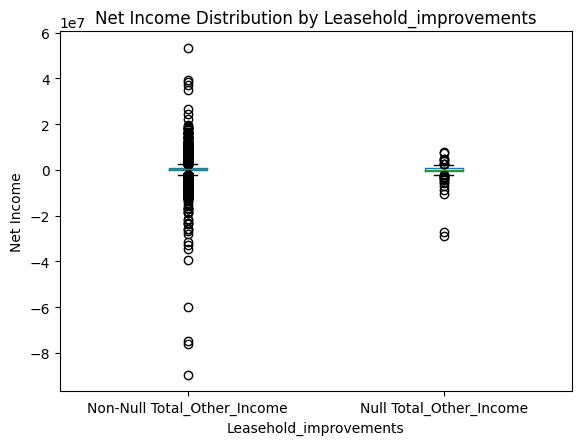

       Non-Null: Total_Other_Income  Null: Total_Other_Income
count                  1.445200e+04              2.530000e+02
mean                   2.914528e+05             -2.485410e+05
std                    2.524914e+06              3.034219e+06
min                   -8.971656e+07             -2.906434e+07
25%                   -2.705815e+05             -5.095060e+05
50%                    2.833965e+05              2.735100e+04
75%                    9.103215e+05              6.085490e+05
max                    5.337325e+07              7.816630e+06
T-Test p-value: 0.0007825448086819679
Mann-Whitney U Test p-value: nan


In [207]:

df_selected = df20_cleaned[selected_columns]
# Create a new column for grouping
df_selected["Total_Other_Income"] = df_selected["Total_Other_Income"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Total_Other_Income", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Total_Other_Income", "Null Total_Other_Income"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Total_Other_Income"].notnull()]
df_null = df20_cleaned[df20_cleaned["Total_Other_Income"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null: Total_Other_Income": df_non_null["Net_Income"].describe(),
    "Null: Total_Other_Income": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

I will use the formula on the rest of the datasets.

In [218]:
df18["Total_Other_Income"] = df18["Total_Income"] - df18["Net_Income_from_service_to_patients"]
df17["Total_Other_Income"] = df17["Total_Income"] - df17["Net_Income_from_service_to_patients"]
df16["Total_Other_Income"] = df16["Total_Income"] - df16["Net_Income_from_service_to_patients"]
df15["Total_Other_Income"] = df15["Total_Income"] - df15["Net_Income_from_service_to_patients"]

# SNF_Bed_Days_Available

In [223]:
df19

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_Income,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Fixed_equipment,Total_Charges,Contract_Labor,SNF_Number_of_Beds,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Total_long_term_liabilities,Investments,Net_Income_from_service_to_patients,Wage-related_Costs_(core),Total_Salaries_(adjusted),SNF_Average_Length_of_Stay_Total,Notes_Payable,Other_long_term_liabilities,Payroll_taxes_payable,Land_improvements,Allowable_Bad_Debts,SNF_Average_Length_of_Stay_Title_XVIII,Total_General_Inpatient_Care_Services_Revenue,Total_Liabilities_and_fund_balances,SNF_Average_Length_of_Stay_Title_XIX,Other_current_assets,Total_Current_Assets,Total_Other_Income
0,1226920,525009,CROSSROADS CARE CENTER OF EAST GREEN,600 S WEBSTER AVENUE,GREEN BAY,WI,54301,BROWN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1228236,45228,MAPLE HEALTHCARE,200 S MAPLE STREET,HAZEN,AR,72064,PRAIRIE,99904.0,R,11/1/2018,12/31/2018,4,138970.0,7613.0,NaN,-52994.0,17284.0,417808.0,28381.0,417808.0,377298.0,23226.0,6429.0,17284.0,394582.0,70.0,10000.0,26837.0,177313.0,2.0,7.0,3.0,12.0,131.0,1739.0,42.0,1912.0,1.0,7.0,3.0,11.0,59825.0,111559.0,4270.0,28381.0,131.0,1739.0,42.0,1912.0,1.0,7.0,3.0,11.0,17284.0,42.0,199985.0,94275.0,5906.0,17284.0,94275.0,10000.0,NaN,NaN,NaN,70.0,NaN,0.0,NaN,17284.0,24783.0,199985.0,173.82,NaN,NaN,NaN,NaN,NaN,14.00,340581.0,111559.0,248.43,NaN,95653.0,0.0
2,1230331,435123,GOOD SAMARITAN SOCIETY-SELBY,4861 LINCOLN AVE,SELBY,SD,57472-0299,WALWORHT,99943.0,R,10/1/2018,11/30/2018,4,320167.0,151920.0,2528.0,85459.0,183543.0,734260.0,92469.0,719978.0,1674336.0,206443.0,NaN,-1143442.0,527817.0,50.0,6247.0,-3353.0,1477583.0,16.0,8.0,22.0,46.0,1098.0,1314.0,204.0,2616.0,36.0,7.0,3.0,46.0,88965.0,421155.0,3050.0,110922.0,1098.0,1314.0,204.0,2616.0,36.0,7.0,3.0,46.0,-1141609.0,204.0,196753.0,237612.0,2528.0,183543.0,237612.0,6247.0,NaN,NaN,NaN,50.0,NaN,0.0,NaN,-1146519.0,56833.0,196753.0,56.87,NaN,NaN,NaN,NaN,NaN,68.00,565600.0,421155.0,187.71,NaN,412380.0,4910.0
3,1232670,525232,CCC OF WEST GREEN BAY LLC,1760 SHAWANO AVENUE,GREEN BAY,WI,54303,BROWN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1235138,35270,LA ESTANCIA NURSING & REHAB CENTER,15810 SOUTH 42ND STREET,PHOENIX,AZ,85048,MARICOPA,38060.0,U,11/1/2018,12/31/2018,4,1265667.0,222514.0,4242811.0,6634.0,71252.0,1884576.0,184409.0,

In [220]:
df20_cleaned

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Beds_Match,Salaries_wages_and_fees_payable,Overhead_Non_Salary_Costs,Less_discounts_on_patients
0,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,10/01/2019,10/31/2019,6.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,30.63,206.00,51.25,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,NaN,371857.0,299558.0,195203.0,79053.0,371857.0,136024.0,15647.0,1223466.0,135613.0,65289.0,24359.0,NaN,1284327.0,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0,NaN,13080009.0,13080009.0,14400312.0,493549.0,NaN,566616.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,4696379.0,4696379.0,14400312.0,1490851.0,1795483.0,1795483.0,1083396.0,1023062.0,60334.0,50.0,60384.0,60384.0,476754.0,4814.0,True,259658.0,651205.0,712087.0
1,495268,MARY WASHINGTON HEALTH CENTER,2400 MCKINNEY BLVD,COLONIAL BEACH,VA,22443,WESTMORELAND,99949.0,R,11/01/2019,12/29/2019,4.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,31.00,32.50,130.92,16.0,9.0,4.0,29.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,NaN,369008.0,254234.0,210445.0,60217.0,369008.0,156009.0,-15807.0,55469.0,NaN,NaN,-318469.0,NaN,-278807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.0,257.0,-278550.0,73933.0,-337340.0,NaN,5427.0,-257980.0,NaN,NaN,257.0,259.0,-257721.0,-20829.0,-20829.0,-278550.0,1032618.0,1286852.0,1286852.0,814204.0,1076191.0,-261987.0,806.0,-261181.0,-261181.0,101663.0,NaN,True,NaN,707183.0,472648.0
2,295107,ADVANCED HEALTH CARE OF PARADISE,3455 PECOS-MCLEOD INTERCONNECT,LAS VEGAS,NV,89121,CLARK,29820.0,U,10/04/2019,12/31/2019,4.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,29.38,NaN,43.67,133.0,NaN,5.0,138.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,NaN,713984.0,791188.0,492172.0,83667.0,713984.0,17352.0,-20979.0,1533839.0,4500.0,NaN,50238.0,NaN,1433191.0,NaN,NaN,NaN,NaN,NaN,79549.0,99168.0,NaN,1285094.0,1285094.0,2817453.0,90834.0,NaN,NaN,11931.0,245384.0,NaN,515503.0,NaN,3287601.0,3532985.0,-715532.0,-715532.0,2817453.0,1116500.0,1906805.0,1907688.0,1543399.0,1735321.0,-191922.0,120.0,-191802.0,-191802.0,1263318.0,NaN,True,142619.0,1021337.0,36428

In [227]:

# Selecting specific columns from df20_cleaned
selected_columns = [
    "SNF_Admissions_Title_XVIII", "SNF_Admissions_Title_XIX", "SNF_Admissions_Other", "SNF_Admissions_Total",
    "SNF_Days_Title_XVIII", "SNF_Days_Title_XIX", "SNF_Days_Other", "SNF_Days_Total",
    "SNF_Number_of_Beds", "SNF_Bed_Days_Available", "SNF_Discharges_Title_XVIII", "SNF_Discharges_Title_XIX",
    "SNF_Discharges_Title_Other", "SNF_Discharges_Total"
]
df_selected = df20_cleaned[selected_columns]

# Display the new dataset
df_selected.head()

,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total
0,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0
1,16.0,9.0,4.0,29.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0
2,133.0,NaN,5.0,138.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0
3,3.0,6.0,1.0,10.0,131.0,3853.0,1441.0,5425.0,123.0,7749.0,3.0,14.0,1.0,18.0
4,17.0,4.0,5.0,26.0,539.0,4957.0,378.0,5874.0,118.0,7198.0,11.0,10.0,9.0,30.0


In [228]:
# Function to calculate SNF_Bed_Days_Available
def calculate_snf_bed_days_available(df, reporting_period_days=365):
    df["SNF_Bed_Days_Available1"] = df["SNF_Number_of_Beds"] * reporting_period_days
    return df

# Apply the function to df_selected
df_selected = calculate_snf_bed_days_available(df_selected)

# Display the updated dataset
df_selected.head()

C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\2584304885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SNF_Bed_Days_Available1"] = df["SNF_Number_of_Beds"] * reporting_period_days


,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,SNF_Bed_Days_Available1
0,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,36500.0
1,16.0,9.0,4.0,29.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,24090.0
2,133.0,NaN,5.0,138.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,13870.0
3,3.0,6.0,1.0,10.0,131.0,3853.0,1441.0,5425.0,123.0,7749.0,3.0,14.0,1.0,18.0,44895.0
4,17.0,4.0,5.0,26.0,539.0,4957.0,378.0,5874.0,118.0,7198.0,11.0,10.0,9.0,30.0,43070.0


There is no way to calculate it. 

In [231]:
selected_columns = [
    "SNF_Bed_Days_Available", 
    "Net_Income", 
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)
df_selected = df_selected.dropna()
# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['SNF_Bed_Days_Available']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for SNF_Bed_Days_Available: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: SNF_Bed_Days_Available is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: SNF_Bed_Days_Available is not significant in predicting Net_Income.")


Coefficient (Slope) for SNF_Bed_Days_Available1: 0.8885938795731375
T-statistic: 285.225642587645
P-value: 0.0
Reject the null hypothesis: SNF_Bed_Days_Available1 is significant in predicting Net_Income.


It is clear that this is important so I will bring it to the master dataset. Maybe it is universal to each year. 

In [239]:
fit = df20_cleaned[df20_cleaned['Provider_CCN'] == 75031]
fit
#scroll to SNF_Bed_Days_Available

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Salaries_wages_and_fees_payable,Overhead_Non_Salary_Costs,Less_discounts_on_patients
0,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,10/01/2019,10/31/2019,6.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,30.63,206.00,51.25,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,NaN,371857.0,299558.0,195203.0,79053.0,371857.0,136024.0,15647.0,1223466.0,135613.0,65289.0,24359.0,NaN,1284327.0,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0,NaN,13080009.0,13080009.0,14400312.0,493549.0,NaN,566616.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,4696379.0,4696379.0,14400312.0,1490851.0,1795483.0,1795483.0,1083396.0,1023062.0,60334.0,50.0,60384.0,60384.0,476754.0,4814.0,259658.0,651205.0,712087.0
158,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,11/01/2019,12/31/2019,6.0,1286.0,3501.0,1140.0,5927.0,100.0,6100.0,40.0,6.0,32.0,78.0,32.15,583.50,75.99,43.0,1.0,30.0,74.0,1286.0,3501.0,1140.0,5927.0,100.0,6100.0,40.0,6.0,32.0,78.0,NaN,749906.0,519007.0,315623.0,196047.0,749906.0,268606.0,29579.0,1126809.0,130476.0,65289.0,287.0,NaN,1338130.0,NaN,518.0,NaN,11327.0,3374.0,17826.0,34151.0,NaN,13410592.0,13410592.0,14782873.0,545564.0,NaN,579240.0,312363.0,1854634.0,8107197.0,NaN,NaN,8107197.0,9961831.0,4821042.0,4821042.0,14782873.0,3063782.0,3585434.0,3585434.0,2129873.0,2005326.0,124547.0,100.0,124647.0,124647.0,825410.0,NaN,305823.0,1255420.0,1455561.0
2208,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,01/01/2020,12/31/2020,6.0,6641.0,18301.0,4717.0,29659.0,100.0,36600.0,190.0,47.0,108.0,345.0,34.95,389.38,85.97,212.0,18.0,100.0,330.0,6641.0,18301.0,4717.0,29659.0,100.0,36600.0,190.0,47.0,108.0,345.0,NaN,4446598.0,2447543.0,1774116.0,787252.0,4446598.0,1599503.0,50199.0,1379322.0,206045.0,65163.0,103876.0,NaN,1636990.0,NaN,2856.0,NaN,5211.0,3374.0,134808.0,134784.0,NaN,13456674.0,14039803.0,15811577.0,631795.0,NaN,660155.0,1468748.0,3286497.0,7518791.0,NaN,NaN,7518791.0,10805288.0,5006289.0,5006289.0,15811577.0,15520421.0,18676757.0,18676757.0,11696907.0,11535552.0,161355.0,150

In [240]:
fit = df21_cleaned[df21_cleaned['Provider_CCN'] == 75031]
fit

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Salaries_wages_and_fees_payable,Overhead_Non_Salary_Costs,Less_discounts_on_patients
5016,75031,GLEN HILL CENTER,ONE GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,01/01/2021,12/31/2021,4.0,7188.0,18188.0,6282.0,31658.0,100.0,36500.0,200.0,49.0,191.0,440.0,35.94,371.18,71.95,237.0,19.0,189.0,445.0,7188.0,18188.0,6282.0,31658.0,100.0,36500.0,200.0,49.0,191.0,440.0,NaN,4568673.0,3061928.0,2088794.0,722649.0,4568673.0,2283497.0,9426.0,1504996.0,260143.0,39531.0,186754.0,NaN,1485186.0,NaN,2856.0,NaN,12581.0,7274.0,153424.0,963030.0,NaN,7278619.0,12427519.0,14875735.0,608085.0,NaN,NaN,1165987.0,1779514.0,7585332.0,NaN,NaN,12570277.0,14349791.0,525944.0,525944.0,14875735.0,17082510.0,20149100.0,20149100.0,12825739.0,12370510.0,455229.0,70715.0,525944.0,525944.0,5052577.0,4559.0,NaN,7801837.0,7323361.0


It seems to mostly be universal with a slight change. There are some issues with the months and years which will be addressed in cleaning. For now I will add empty cells for the append. Later I will find a way to add the bed days available to df15-df19.

In [241]:
df15['SNF_Bed_Days_Available'] = np.nan
df16['SNF_Bed_Days_Available'] = np.nan
df17['SNF_Bed_Days_Available'] = np.nan
df18['SNF_Bed_Days_Available'] = np.nan
df19['SNF_Bed_Days_Available'] = np.nan

# Leasehold_improvements

In [253]:
leasehold_columns = [
    "Provider_CCN", "Facility_Name", "Street_Address", "City", "State_Code", "Zip_Code", "County",
    "Land", "Land_improvements", "Buildings", "Leasehold_improvements", "Fixed_equipment", "Major_movable_equipment",
    "Total_fixed_Assets", "Investments", "Other_Assets", "Total_other_Assets", "Total_Assets", "Fiscal_Year_Begin_Date",	"Fiscal_Year_End_Date"
]
df_leasehold = df20_cleaned[leasehold_columns]

# Display the leasehold dataset
df_l = df_leasehold[df_leasehold['Provider_CCN'] == 146097]
df_l

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date
3,146097,EL PASO HEALTH CARE CENTER,850 EAST SECOND STREET,EL PASO,IL,61738,WOODFORD,64278.0,NaN,934850.0,123823.0,NaN,341266.0,484549.0,NaN,150875.0,350041.0,3176256.0,10/31/2019,12/31/2019
5249,146097,EL PASO HEALTH CARE CENTER,850 EAST SECOND STREET,EL PASO,IL,61738,WOODFORD,NaN,NaN,NaN,NaN,NaN,5062.0,40005.0,NaN,NaN,2803505.0,4137464.0,01/01/2020,12/31/2020


In [252]:
df_leasehold = df21_cleaned[leasehold_columns]

# Display the leasehold dataset
df_l = df_leasehold[df_leasehold['Provider_CCN'] == 146097]
df_l

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date
11796,146097,EL PASO HEALTH CARE CENTER,850 EAST SECOND STREET,EL PASO,IL,61738,WOODFORD,NaN,NaN,NaN,25201.0,NaN,15737.0,66645.0,NaN,NaN,4138886.0,4943423.0,01/01/2021,12/31/2021


# Leasehold_improvements

Make a column that is binary and its either they own land or lease. 

There are no similar columns in df15-19. If I can get it there it will be important for knowing what lease improvements do longterm. 

In [262]:
leasehold_columns = [
    "Provider_CCN", "Cash_on_hand_and_in_banks",	"Other_current_assets", "Accounts_Receivable",	"Less:_Allowances_for_uncollectible_notes_and_accounts_receivable",
    "Land", "Land_improvements", "Buildings", "Leasehold_improvements", "Fixed_equipment", "Major_movable_equipment",
    "Total_fixed_Assets", "Investments", "Other_Assets", "Total_other_Assets","Inventory", "Total_Current_Assets", "Total_Assets", "Fiscal_Year_Begin_Date",	"Fiscal_Year_End_Date"
]
df_leasehold = df20_cleaned[leasehold_columns]

# Display the leasehold dataset
df_l = df_leasehold[df_leasehold['Provider_CCN'] == 75031]
df_l

,Provider_CCN,Cash_on_hand_and_in_banks,Other_current_assets,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Inventory,Total_Current_Assets,Total_Assets,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date
0,75031,15647.0,NaN,1223466.0,135613.0,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0,NaN,13080009.0,13080009.0,65289.0,1284327.0,14400312.0,10/01/2019,10/31/2019
158,75031,29579.0,NaN,1126809.0,130476.0,NaN,518.0,NaN,11327.0,3374.0,17826.0,34151.0,NaN,13410592.0,13410592.0,65289.0,1338130.0,14782873.0,11/01/2019,12/31/2019
2208,75031,50199.0,NaN,1379322.0,206045.0,NaN,2856.0,NaN,5211.0,3374.0,134808.0,134784.0,NaN,13456674.0,14039803.0,65163.0,1636990.0,15811577.0,01/01/2020,12/31/2020


In [263]:
df_leasehold = df21_cleaned[leasehold_columns]

# Display the leasehold dataset
df_l = df_leasehold[df_leasehold['Provider_CCN'] == 75031]
df_l

,Provider_CCN,Cash_on_hand_and_in_banks,Other_current_assets,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Inventory,Total_Current_Assets,Total_Assets,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date
5016,75031,9426.0,NaN,1504996.0,260143.0,NaN,2856.0,NaN,12581.0,7274.0,153424.0,963030.0,NaN,7278619.0,12427519.0,39531.0,1485186.0,14875735.0,01/01/2021,12/31/2021


Leasehold Improvements & No Land/Buildings

Land = NaN, Buildings = NaN, Leasehold Improvements = 12,581.0 → Suggests the facility is leased, which aligns with Leasehold Improvements.
If they lease the facility, they wouldn't own land or buildings, so those would be missing.
Accounts Receivable & Allowances for Uncollectibles

Accounts Receivable = 1,504,996.0
Less: Allowances for Uncollectibles = 260,143.0 → Looks reasonable, as a percentage (~17% of receivables).
Total Fixed Assets Calculation

Fixed Equipment: 7,274.0
Major Movable Equipment: 153,424.0
Leasehold Improvements: 12,581.0
Total Fixed Assets: 963,030.0 → Mismatch! Something else is included in Fixed Assets, or a value is missing.
Total Current Assets Seems Reasonable

Cash on Hand = 9,426.0
Inventory = 39,531.0
Total Current Assets = 1,485,186.0 → Matches sum of smaller components, assuming Other Current Assets = NaN.
⚠️ What Looks Off or Needs Confirmation
Total Fixed Assets Mismatch

The sum of Leasehold Improvements + Fixed Equipment + Major Movable Equipment is 173,279.0, but Total Fixed Assets is 963,030.0.
Missing items? Are there additional capitalized lease obligations included?
Other Assets & Total Other Assets are Very High

Other Assets = 7,278,619.0
Total Other Assets = 12,427,519.0
This means there are $5.1M in unexplained "Other Assets" → could be long-term investments, deferred assets, goodwill, or intangibles.
Investments = NaN, which is strange because Total Other Assets is high.
Total Assets Check

Total Assets = 14,875,735.0
Confirmed:
Total Fixed Assets
+
Total Other Assets
+
Total Current Assets = 963,030.0+12,427,519.0+1,485,186.0=14,875,735.0

Total Fixed Assets+Total Other Assets+Total Current Assets=963,030.0+12,427,519.0+1,485,186.0=14,875,735.0
✅ This checks out, so mathematically it works.


There's no way to calculate it. but i can atleast make a variable now in every year knowing if they are leasing or not.

In [264]:
df15['Leasehold_improvements'] = np.nan
df16['Leasehold_improvements'] = np.nan
df17['Leasehold_improvements'] = np.nan
df18['Leasehold_improvements'] = np.nan
df19['Leasehold_improvements'] = np.nan

# Mortgage_payable

In [266]:
df_liabilities = df20_cleaned[[
    "Provider_CCN", "Facility_Name", "Fiscal_Year_Begin_Date", "Fiscal_Year_End_Date",
    "Accounts_payable", "Payroll_taxes_payable", "Notes_and_Loans_Payable_(short_term)",
    "Other_current_liabilities", "Total_current_liabilities", "Mortgage_payable", 
    "Notes_Payable", "Other_long_term_liabilities", "Total_long_term_liabilities", 
    "Total_liabilities", "Net_Income"
]]

# Display the DataFrame
df_liabilities


,Provider_CCN,Facility_Name,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,Net_Income
0,75031,GLEN HILL CENTER,10/01/2019,10/31/2019,493549.0,NaN,566616.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,60384.0
1,495268,MARY WASHINGTON HEALTH CENTER,11/01/2019,12/29/2019,73933.0,-337340.0,NaN,5427.0,-257980.0,NaN,NaN,257.0,259.0,-257721.0,-261181.0
2,295107,ADVANCED HEALTH CARE OF PARADISE,10/04/2019,12/31/2019,90834.0,NaN,NaN,11931.0,245384.0,NaN,515503.0,NaN,3287601.0,3532985.0,-191802.0
3,146097,EL PASO HEALTH CARE CENTER,10/31/2019,12/31/2019,463420.0,26575.0,NaN,354342.0,937284.0,5923181.0,500000.0,NaN,6423181.0,7360465.0,-36899.0
4,215136,BIRCH MANOR CTR FOR REHAB & HEALTHCA,11/01/2019,12/31/2019,958326.0,-177.0,NaN,15092370.0,16471912.0,NaN,NaN,NaN,NaN,16471912.0,157671.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14944,105382,SANDGATE GARDENS REHAB AND NURSING C,01/01/2020,12/31/2020,500847.0,NaN,1118578.0,69940.0,1695956.0,NaN,NaN,18820.0,18820.0,1714776.0,545241.0
14945,145970,THE VILLA AT WINDSOR PARK,01/01/2020,12/31/2020,371095.0,NaN,NaN,3910631.0,4765995.0,NaN,NaN,4946666.0,4946666.0,9712661.0,-433682.0
14946,375567,MEMORIAL NURSING CENTER,07/01/2020,06/30/2021,117096.0,NaN,NaN,-150.0,116946.0,NaN,NaN,NaN,NaN,116946.0,-511877.0
14947,415071,SOUTH COUNTY NURSING & REHAB CENTER,07/01/2020,12/31/2020,95290.0,74483.0,500000.0,348187.0,1224546.0,NaN,793600.0,NaN,793600.0,2018146.0,-541814.0


Total long term liabilites is made up of mortgage payable, notes_payable, and other_long_term_liabilites which are all missing so i cant calculate it but it can be probably universal other than some payoffs of it each year.

In [267]:
df15['Mortgage_payable'] = np.nan
df16['Mortgage_payable'] = np.nan
df17['Mortgage_payable'] = np.nan
df18['Mortgage_payable'] = np.nan
df19['Mortgage_payable'] = np.nan

# Notes_and_Loans_Payable_(short_term)

In [271]:
df_liabilities = df20_cleaned[[
    "Provider_CCN", 
    "Accounts_payable", "Payroll_taxes_payable", "Notes_and_Loans_Payable_(short_term)", "Salaries_wages_and_fees_payable", 
    "Other_current_liabilities", "Total_current_liabilities", "Mortgage_payable", 
    "Notes_Payable", "Other_long_term_liabilities", "Total_long_term_liabilities", 
    "Total_liabilities", "Net_Income"
]]

# Display the DataFrame
df_liabilities

,Provider_CCN,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Salaries_wages_and_fees_payable,Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,Net_Income
0,75031,493549.0,NaN,566616.0,259658.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,60384.0
1,495268,73933.0,-337340.0,NaN,NaN,5427.0,-257980.0,NaN,NaN,257.0,259.0,-257721.0,-261181.0
2,295107,90834.0,NaN,NaN,142619.0,11931.0,245384.0,NaN,515503.0,NaN,3287601.0,3532985.0,-191802.0
3,146097,463420.0,26575.0,NaN,92947.0,354342.0,937284.0,5923181.0,500000.0,NaN,6423181.0,7360465.0,-36899.0
4,215136,958326.0,-177.0,NaN,421393.0,15092370.0,16471912.0,NaN,NaN,NaN,NaN,16471912.0,157671.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14944,105382,500847.0,NaN,1118578.0,137054.0,69940.0,1695956.0,NaN,NaN,18820.0,18820.0,1714776.0,545241.0
14945,145970,371095.0,NaN,NaN,484269.0,3910631.0,4765995.0,NaN,NaN,4946666.0,4946666.0,9712661.0,-433682.0
14946,375567,117096.0,NaN,NaN,NaN,-150.0,116946.0,NaN,NaN,NaN,NaN,116946.0,-511877.0
14947,415071,95290.0,74483.0,500000.0,206586.0,348187.0,1224546.0,NaN,793600.0,NaN,793600.0,2018146.0,-541814.0


The missing value in the first one is Payroll_taxes_Payable which is about 40 thousand

In [277]:
df_liabilities = df21_cleaned[[
    "Provider_CCN", 
    "Accounts_payable", "Payroll_taxes_payable", "Notes_and_Loans_Payable_(short_term)", "Salaries_wages_and_fees_payable", 
    "Other_current_liabilities", "Total_current_liabilities", "Mortgage_payable", 
    "Notes_Payable", "Other_long_term_liabilities", "Total_long_term_liabilities", 
    "Total_liabilities", "Net_Income"
]]

In [276]:
df_l = df_liabilities[df_liabilities['Provider_CCN'] == 75031]
df_l

,Provider_CCN,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Salaries_wages_and_fees_payable,Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,Net_Income
5016,75031,608085.0,NaN,NaN,NaN,1165987.0,1779514.0,7585332.0,NaN,NaN,12570277.0,14349791.0,525944.0


It seems they just move the money from accounts in 2020 to different ones in 2021. so it all adds up but its just not specific in the accounts. 

I will probably take out all the ones that make up Total_current_liabilities bc i would have to estimate them unless i did it by averages and of the 2020 numbers. 

In [278]:
df15['Notes_and_Loans_Payable_(short_term)'] = np.nan
df16['Notes_and_Loans_Payable_(short_term)'] = np.nan
df17['Notes_and_Loans_Payable_(short_term)'] = np.nan
df18['Notes_and_Loans_Payable_(short_term)'] = np.nan
df19['Notes_and_Loans_Payable_(short_term)'] = np.nan

# Land

In [280]:
df_land = df20_cleaned[[
    "Provider_CCN", "Facility_Name", "Fiscal_Year_Begin_Date", "Fiscal_Year_End_Date",
    "Land", "Land_improvements", "Buildings", "Leasehold_improvements",
    "Fixed_equipment", "Major_movable_equipment", "Total_fixed_Assets"
]]

# Display the DataFrame
df_land

,Provider_CCN,Facility_Name,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets
0,75031,GLEN HILL CENTER,10/01/2019,10/31/2019,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0
1,495268,MARY WASHINGTON HEALTH CENTER,11/01/2019,12/29/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,295107,ADVANCED HEALTH CARE OF PARADISE,10/04/2019,12/31/2019,NaN,NaN,NaN,NaN,NaN,79549.0,99168.0
3,146097,EL PASO HEALTH CARE CENTER,10/31/2019,12/31/2019,64278.0,NaN,934850.0,123823.0,NaN,341266.0,484549.0
4,215136,BIRCH MANOR CTR FOR REHAB & HEALTHCA,11/01/2019,12/31/2019,NaN,NaN,NaN,3845.0,NaN,340000.0,334401.0
...,...,...,...,...,...,...,...,...,...,...,...
14944,105382,SANDGATE GARDENS REHAB AND NURSING C,01/01/2020,12/31/2020,NaN,NaN,NaN,270009.0,NaN,149813.0,461305.0
14945,145970,THE VILLA AT WINDSOR PARK,01/01/2020,12/31/2020,NaN,NaN,NaN,1522059.0,NaN,2109442.0,417885.0
14946,375567,MEMORIAL NURSING CENTER,07/01/2020,06/30/2021,NaN,NaN,NaN,NaN,2000.0,NaN,2000.0
14947,415071,SOUTH COUNTY NURSING & REHAB CENTER,07/01/2020,12/31/2020,NaN,NaN,NaN,107517.0,42745.0,NaN,145033.0


In [283]:
df_land = df21_cleaned[[
    "Provider_CCN", "Facility_Name", "Fiscal_Year_Begin_Date", "Fiscal_Year_End_Date",
    "Land", "Land_improvements", "Buildings", "Leasehold_improvements",
    "Fixed_equipment", "Major_movable_equipment", "Total_fixed_Assets"
]]

# Display the DataFrame
df_l = df_land[df_land['Provider_CCN'] == 75031]
df_l

,Provider_CCN,Facility_Name,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets
5016,75031,GLEN HILL CENTER,01/01/2021,12/31/2021,NaN,2856.0,NaN,12581.0,7274.0,153424.0,963030.0


how can there be land improvements but no land?

there a lot that have land improvements but not a number for the land.

In [285]:
selected_columns = [
    "Land", 
    "Net_Income", 
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)
df_selected = df_selected.dropna()
# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['Land']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.18638993614586802
T-statistic: 370.8333917511776
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


C:\Users\lukep\AppData\Local\Temp\ipykernel_27152\4073458745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Land"] = df_selected["Land"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

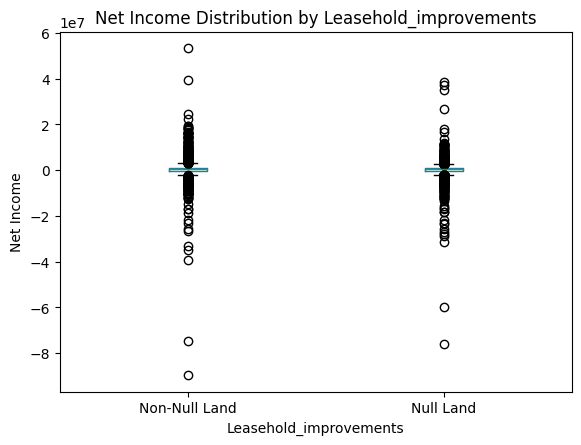

       Non-Null: Land    Null: Land
count    3.672000e+03  1.103300e+04
mean     2.822254e+05  2.821411e+05
std      3.683090e+06  2.013433e+06
min     -8.971656e+07 -7.619267e+07
25%     -3.890118e+05 -2.458870e+05
50%      2.483610e+05  2.863730e+05
75%      9.449652e+05  8.977870e+05
max      5.337325e+07  3.846258e+07
T-Test p-value: 0.9986076427019728
Mann-Whitney U Test p-value: nan


In [286]:

df_selected = df20_cleaned[selected_columns]
# Create a new column for grouping
df_selected["Land"] = df_selected["Land"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Land", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Land", "Null Land"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Land"].notnull()]
df_null = df20_cleaned[df20_cleaned["Land"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null: Land": df_non_null["Net_Income"].describe(),
    "Null: Land": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

land is important to net income but the nulls dont matter. 

## Make a Key (Year) for each dataset

In [279]:
# Find columns in df1 but not in df2
cols_in_d20 = list(set(df20_cleaned.columns) - set(df19.columns))

# Find columns in df2 but not in df1
cols_in_df19 = list(set(df19.columns) - set(df20_cleaned.columns))

# Print results
print("Columns in d20 not in df19:", cols_in_d20)
print("Columns in df19 nit in df20:", cols_in_df19)

Columns in d20 not in df19: ['Land', 'Inventory', 'Prepaid_expenses']
Columns in df19 nit in df20: ['rpt_rec_num']


Text(0.5, 1.0, 'Missing Values Heatmap')

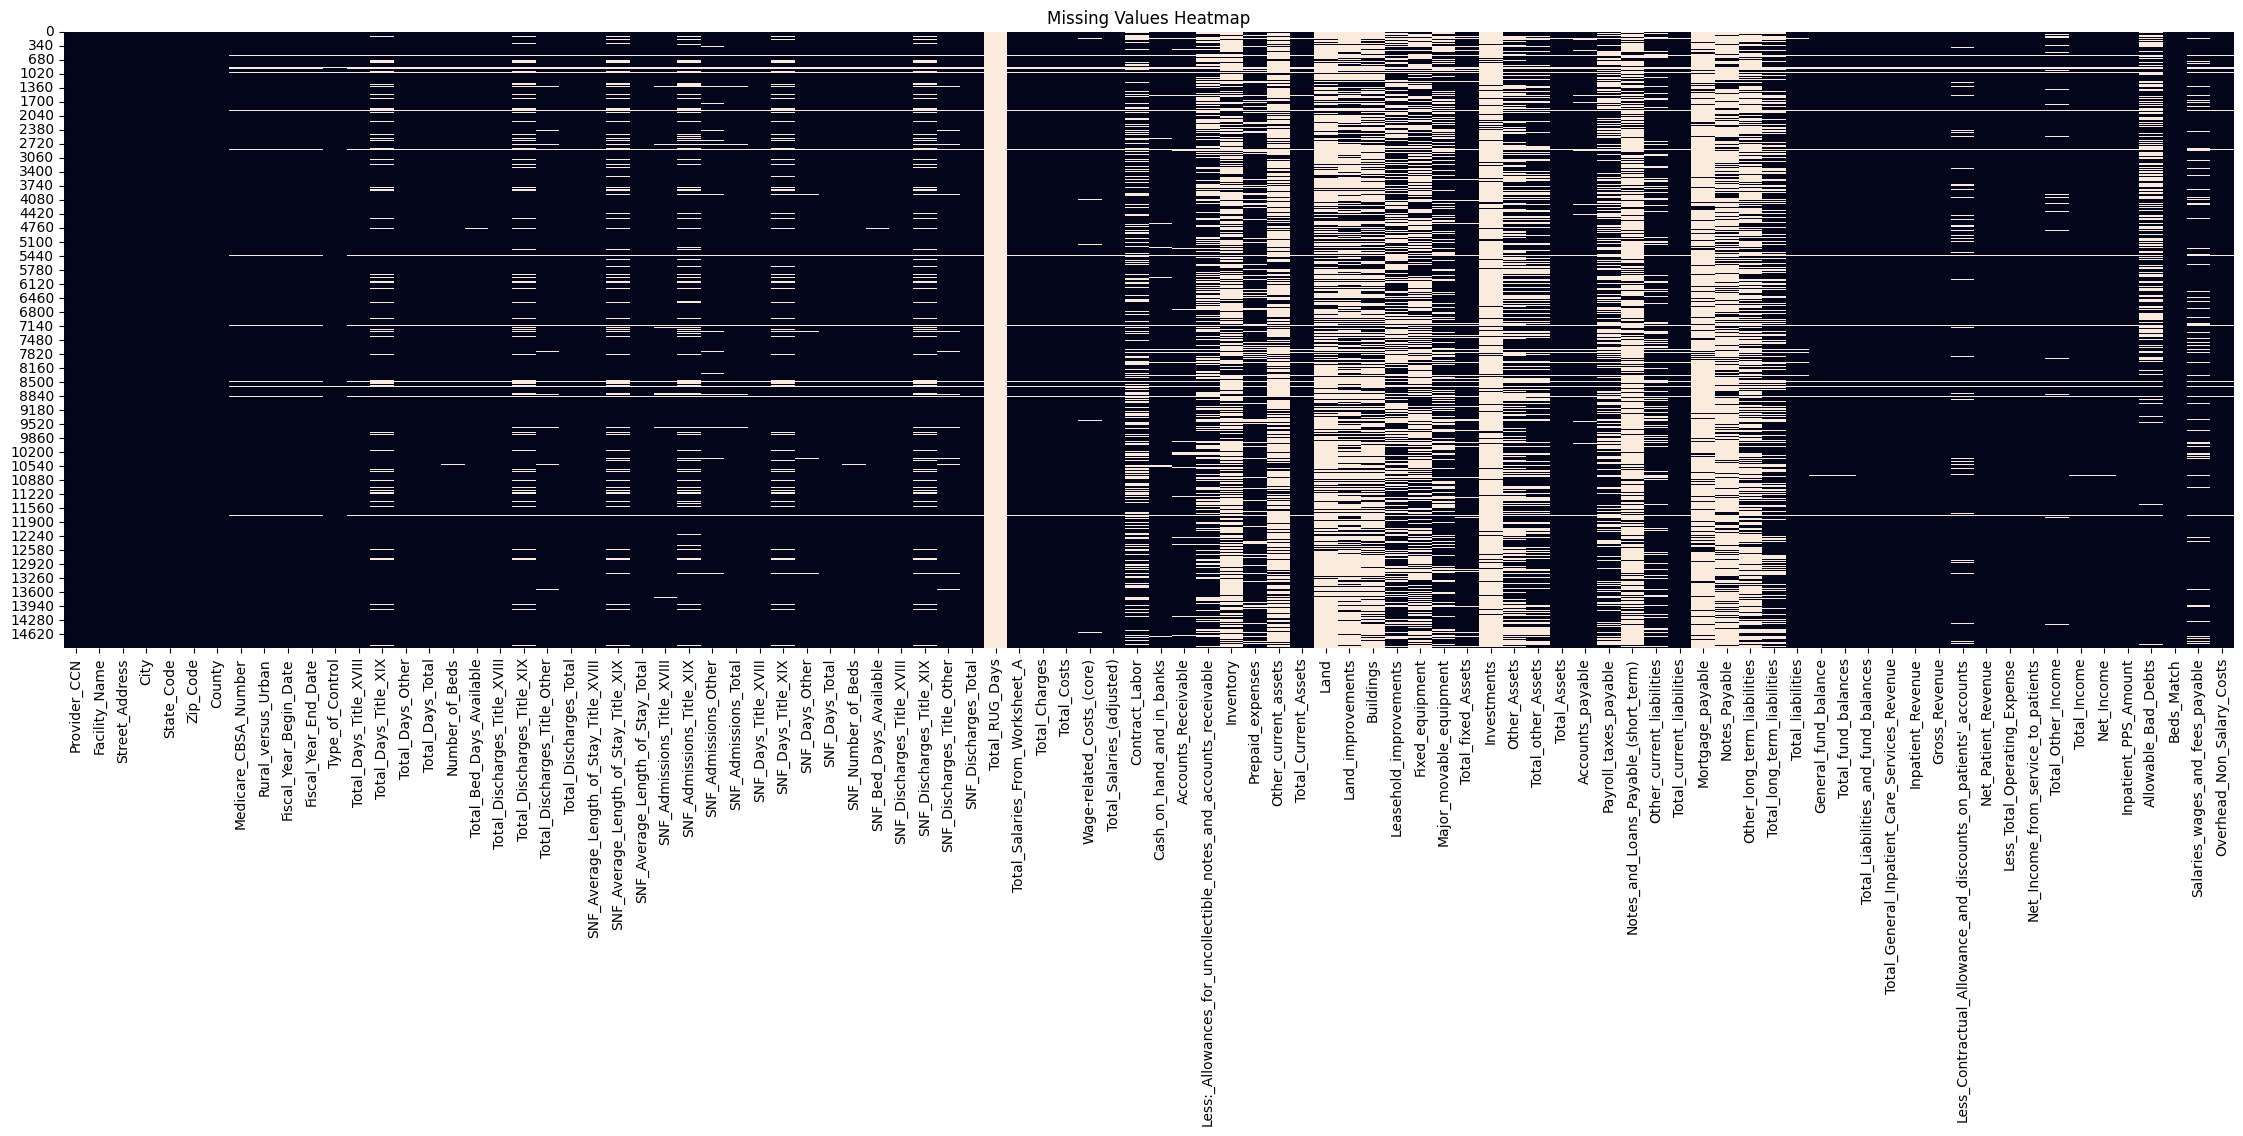

In [192]:
plt.figure(figsize=(28, 8))
sns.heatmap(df20_cleaned.isnull(), cbar=False)   # and do df21
plt.title("Missing Values Heatmap")

Text(0.5, 1.0, 'Missing Values Heatmap')

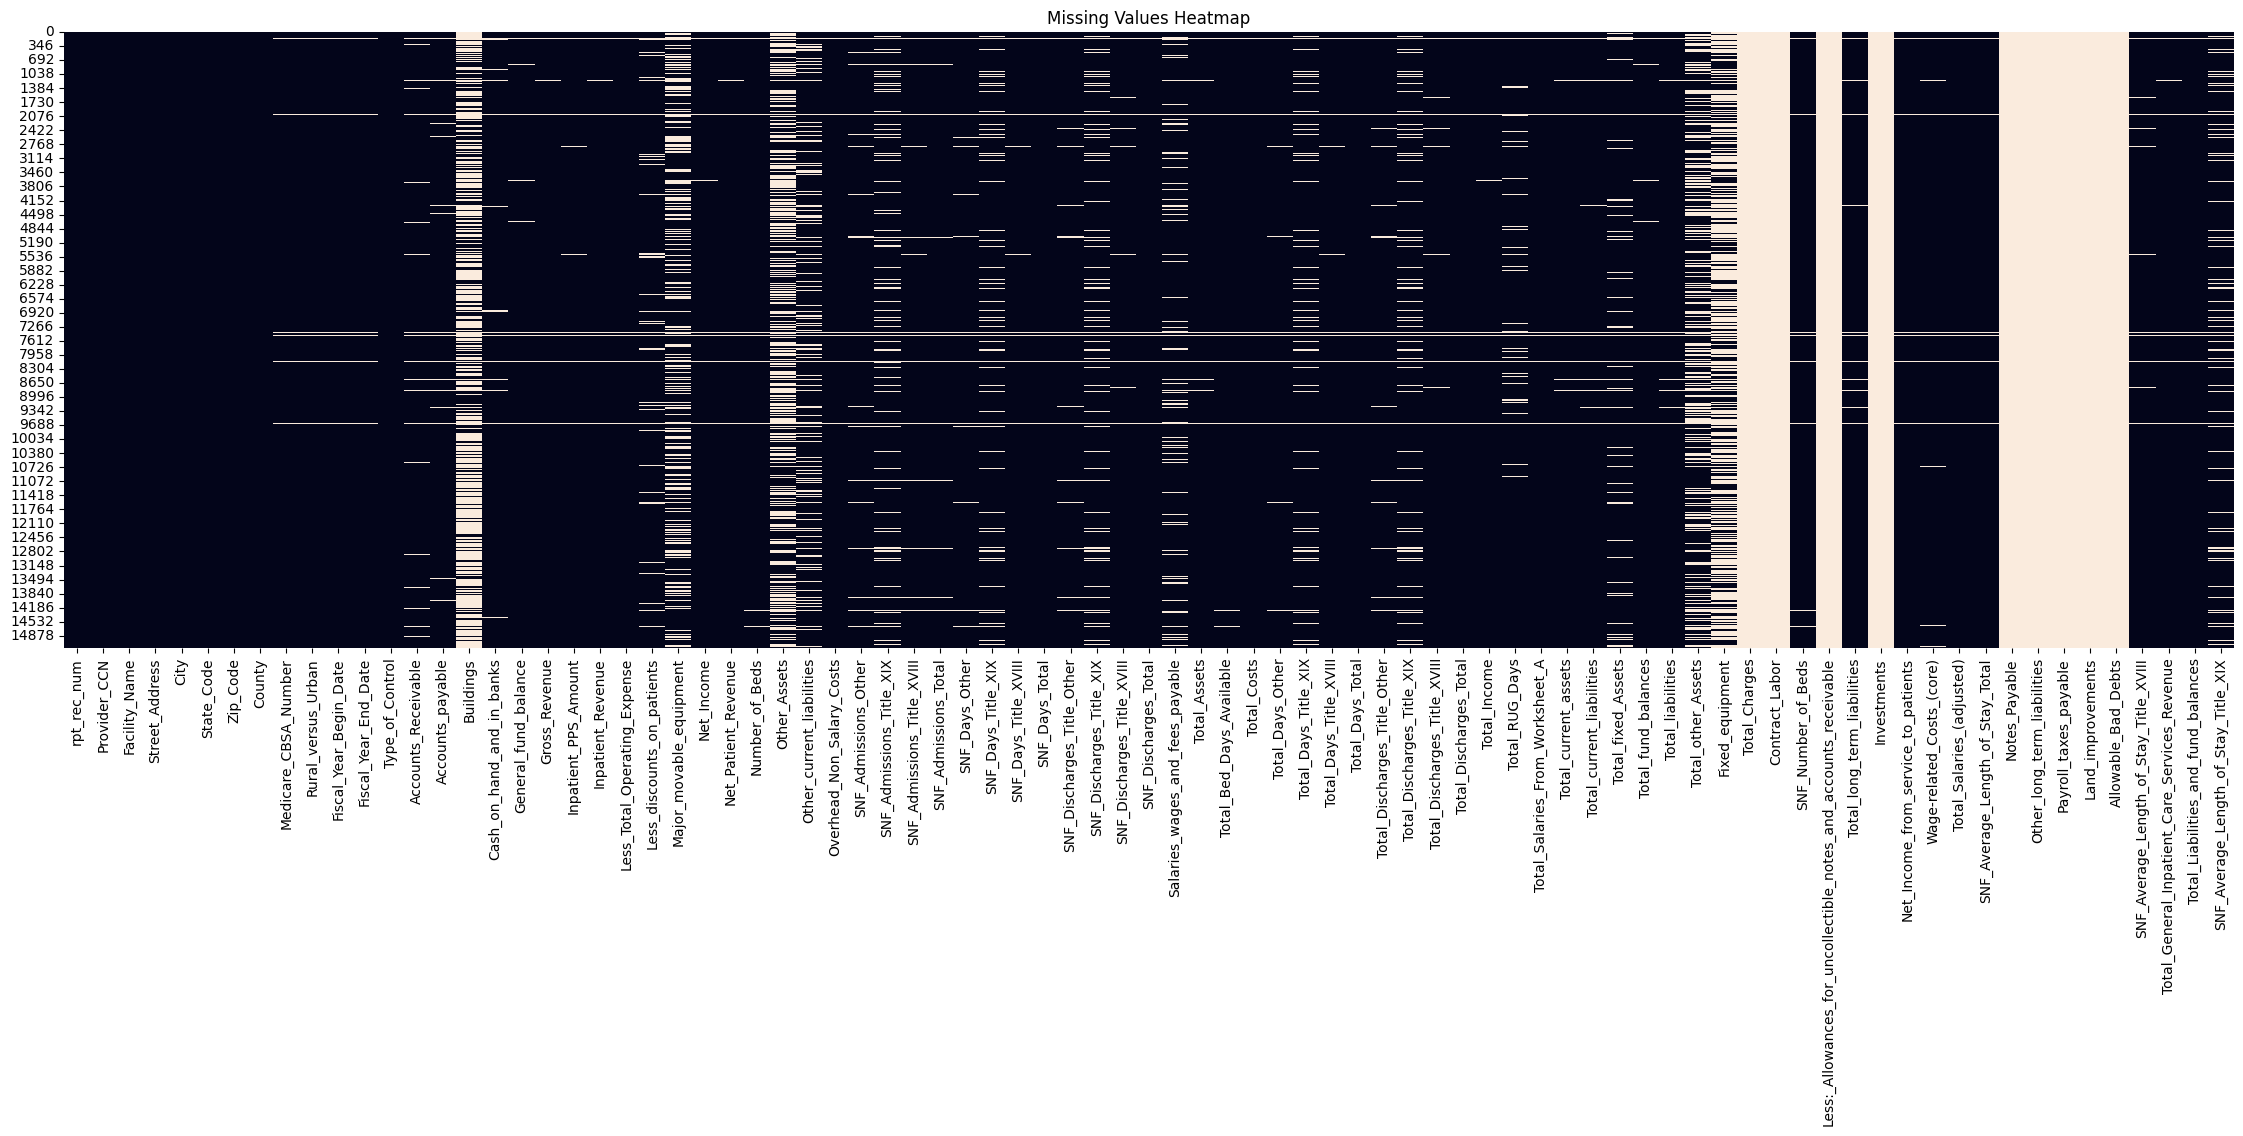

In [193]:
plt.figure(figsize=(28, 8))
sns.heatmap(df19.isnull(), cbar=False)   # and do df21
plt.title("Missing Values Heatmap")

## Third Append the years together

In [261]:
df20_cleaned

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Salaries_wages_and_fees_payable,Overhead_Non_Salary_Costs,Less_discounts_on_patients
0,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,10/01/2019,10/31/2019,6.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,30.63,206.00,51.25,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,NaN,371857.0,299558.0,195203.0,79053.0,371857.0,136024.0,15647.0,1223466.0,135613.0,65289.0,24359.0,NaN,1284327.0,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0,NaN,13080009.0,13080009.0,14400312.0,493549.0,NaN,566616.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,4696379.0,4696379.0,14400312.0,1490851.0,1795483.0,1795483.0,1083396.0,1023062.0,60334.0,50.0,60384.0,60384.0,476754.0,4814.0,259658.0,651205.0,712087.0
1,495268,MARY WASHINGTON HEALTH CENTER,2400 MCKINNEY BLVD,COLONIAL BEACH,VA,22443,WESTMORELAND,99949.0,R,11/01/2019,12/29/2019,4.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,31.00,32.50,130.92,16.0,9.0,4.0,29.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,NaN,369008.0,254234.0,210445.0,60217.0,369008.0,156009.0,-15807.0,55469.0,NaN,NaN,-318469.0,NaN,-278807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.0,257.0,-278550.0,73933.0,-337340.0,NaN,5427.0,-257980.0,NaN,NaN,257.0,259.0,-257721.0,-20829.0,-20829.0,-278550.0,1032618.0,1286852.0,1286852.0,814204.0,1076191.0,-261987.0,806.0,-261181.0,-261181.0,101663.0,NaN,NaN,707183.0,472648.0
2,295107,ADVANCED HEALTH CARE OF PARADISE,3455 PECOS-MCLEOD INTERCONNECT,LAS VEGAS,NV,89121,CLARK,29820.0,U,10/04/2019,12/31/2019,4.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,29.38,NaN,43.67,133.0,NaN,5.0,138.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,NaN,713984.0,791188.0,492172.0,83667.0,713984.0,17352.0,-20979.0,1533839.0,4500.0,NaN,50238.0,NaN,1433191.0,NaN,NaN,NaN,NaN,NaN,79549.0,99168.0,NaN,1285094.0,1285094.0,2817453.0,90834.0,NaN,NaN,11931.0,245384.0,NaN,515503.0,NaN,3287601.0,3532985.0,-715532.0,-715532.0,2817453.0,1116500.0,1906805.0,1907688.0,1543399.0,1735321.0,-191922.0,120.0,-191802.0,-191802.0,1263318.0,NaN,142619.0,1021337.0,364289.0
3,146097,EL PASO HEALT

# HOW TO HANDLE NAs
## Keep Missingness as a Feature:

Create a binary feature indicating whether the value is missing (1 for missing, 0 otherwise). This allows the model to capture any relationship between missingness and the target.
Impute Strategically:

## Impute missing values with a meaningful approach:
Numerical Data: Use mean, median, or target-specific group means.
Categorical Data: Use the most frequent category or a new category like "Missing".
### Advanced approaches: Predict missing values using a model based on other features.
## Test Different Approaches:

Try visualizing and modeling with and without the missingness feature to assess its predictive power.

Before deciding, it’s important to check if there is any pattern in the missing data. If the missing values tend to happen for certain types of entities (e.g., smaller companies or companies in a specific industry), that might influence your decision.

## Now we split up by datatype and visualize. 

### How to deal with NA's for Object
Years can be changed with confidence. 

We can't randomly put a CBSA Number. Missing ones have a large differnce though (maybe those are medicaid then which makes sense bc medicaid does better; if so then I make it binary 0,1 for medicare vs medicaid.). 

For Rural vs Urban we can take ZIP code and if any match ZIP and has RvsU then we can put that value in the missing one. And if not then we make another category as "not defined".

Missing street address can just put "not defined" 

### FLOAT 64 NA's Analysis by %

### How to deal with NA's for Float64
Fixed Equipment (a large number) can either put a value of 0 or see if we can predict using other features. 
Building - If "total assets" correlates well with the "Buildings" variable, you could use it to estimate the missing values. For example, you could create a model (e.g., regression) to predict the "Buildings" value based on "total assets" or use the average "Buildings" value for entities with similar asset sizes.


In [194]:
print("\nModerate Missing (8% to 30%):")
moderate_missing


Moderate Missing (8% to 30%):


NameError: name 'moderate_missing' is not defined

In [ ]:
print("\nLow Missing (Less than 8%):")
low_missing


Low Missing (Less than 8%):


,Data Type,Non-Null Count,Null Count,Unique Values,Sample Value,Percent Missing (%),Target Mean (Null Rows),Target Mean (Non-Null Rows),Difference,Percent Difference (%),Correlation to Target
Net_Income,float64,14911,491,14818,311430.0,3.187898,1.135777e+05,92915.811213,-2.066186e+04,-22.237179,0.980335
SNF_Discharges_Total,float64,14917,485,1206,49.0,3.148942,-1.310709e+05,93424.813529,2.244957e+05,240.295574,0.115571
Total_Days_Other,float64,14917,485,10797,534.0,3.148942,-9.505792e+05,95241.416874,1.045821e+06,1098.073331,0.066856
SNF_Average_Length_of_stay_Tot,float64,14917,485,11636,137.14,3.148942,-1.310709e+05,93424.813529,2.244957e+05,240.295574,0.028037
General_fund_balance,float64,14918,484,14716,311430.0,3.142449,-3.473836e+05,93460.123809,4.408437e+05,471.691794,0.417262
Total_fund_balances,float64,14918,484,14717,311430.0,3.142449,-3.473836e+05,93460.123809,4.408437e+05,471.691794,0.416646
Total_Discharges_Total,float64,14919,483,1217,49.0,3.135956,2.588084e+04,93067.872523,6.718703e+04,72.191436,0.114529
Target,float64,14920,482,14830,311431.0,3.129464,NaN,92928.274799,0.000000e+00,0.000000,1.000000
Total_Costs,float64,14927,475,14887,211585.0,3.084015,-9.765885e+05,94507.639012,1.071096e+06,1133.343405,0.140984
Inpatient_PPS_Amount,float64,14931,471,14849,154022.0,3.058044,-5.968279e+05,93807.770687,6.906357e+05,736.224423,0.199580


# Data Type
Ensure the datatype is right for each.

# Make a dataset with Dummies

Financial Related Questions: 

What financial and operational factors most significantly impact the profitability of nursing homes, and how do these factors correlate with the quality of care provided?" 

 

“How do those factors influence the profitability of the nursing homes over the change in years? 

 

“At what accuracy can we predict the profitability of a nursing home 1 to 5 years out? 

 

“What type of financial state should one specifically look out for that turns a profit 1 to 5 years out?” 

 

“Are there any nursing homes that aren’t currently doing well, but could efficiently turn a profit with the right adjustment/investment?” 